### MapMyRun Data

Import Packages

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [2]:
import pandas as pd
import seaborn as sns
sns.set()
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
temp.head(2)

Date Submitted Workout Date Activity Type  Calories Burned (kCal)  \
0     2022-12-04   2022-12-04           Run                     440   
1     2022-12-03   2022-12-03           Run                     762   

   Distance (mi)  Workout Time (seconds)  Avg Pace (min/mi)  \
0        3.10000                    2093            11.2527   
1        6.21098                    3854            10.3386   

   Max Pace (min/mi)  Avg Speed (mi/h)  Max Speed (mi/h)  Avg Heart Rate  \
0           1.566280           5.33206           38.3073           134.0   
1           0.519991           5.80350          115.3870           153.0   

     Steps Notes                          Source  \
0   3227.0   b''  Map My Fitness MapMyRun iPhone   
1  10072.0   b''  Map My Fitness MapMyRun iPhone   

                                             Link  
0  http://www.mapmyfitness.com/workout/6991488916  
1  http://www.mapmyfitness.com/workout/6990151537

In [3]:
headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
temp.rename(columns = headers_dict, inplace=True)

In [4]:
temp['Workout_Date'] = pd.to_datetime(temp['Workout_Date'])
temp['Date_Submitted'] = pd.to_datetime(temp['Date_Submitted'])
mean_speed = temp['Avg_Heart_Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
temp['day_of_week']=temp['Workout_Date'].dt.day_name()
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   758 non-null    datetime64[ns]
 1   Workout_Date     758 non-null    datetime64[ns]
 2   Activity_Type    758 non-null    object        
 3   Calories_Burned  758 non-null    int64         
 4   Distance         758 non-null    float64       
 5   Workout_Time     758 non-null    int64         
 6   Avg_Pace         758 non-null    float64       
 7   Max_Pace         758 non-null    float64       
 8   Avg_Speed        758 non-null    float64       
 9   Max_Speed        758 non-null    float64       
 10  Avg_Heart_Rate   512 non-null    float64       
 11  Steps            735 non-null    float64       
 12  Notes            758 non-null    object        
 13  Source           758 non-null    object        
 14  Link             758 non-null    object   

In [5]:
temp[temp.Avg_Heart_Rate == 0] = np.nan
#temp[temp.Max_Pace == 0] = np.nan


In [6]:
temp[temp.Avg_Heart_Rate == 0] = np.nan
temp.fillna(temp.Avg_Heart_Rate.median(), inplace = True)
#temp.fillna(temp.Max_Pace.median(), inplace = True)
temp.head()

Date_Submitted         Workout_Date Activity_Type  Calories_Burned  \
0  2022-12-04 00:00:00  2022-12-04 00:00:00           Run            440.0   
1  2022-12-03 00:00:00  2022-12-03 00:00:00           Run            762.0   
2  2022-11-27 00:00:00  2022-11-27 00:00:00           Run            769.0   
3  2022-11-26 00:00:00  2022-11-26 00:00:00           Run            415.0   
4  2022-11-24 00:00:00  2022-11-24 00:00:00           Run            403.0   

   Distance  Workout_Time  Avg_Pace  Max_Pace  Avg_Speed  Max_Speed  \
0   3.10000        2093.0  11.25270  1.566280    5.33206    38.3073   
1   6.21098        3854.0  10.33860  0.519991    5.80350   115.3870   
2   6.26321        3884.0  10.33400  0.905183    5.80608    66.2849   
3   3.10000        1804.0   9.69893  1.454730    6.18625    41.2447   
4   3.10000        1658.0   8.91398  3.980630    6.73100    15.0730   

   Avg_Heart_Rate    Steps Notes                          Source  \
0           134.0   3227.0   b''  Map My Fitness MapMyRun iPhone   
1           153.0  10072.0   b''  Map My Fitness MapMyRun iPhone   
2           147.0  10292.0   b''  Map My Fitness MapMyRun iPhone   
3           150.0   4660.0   b''  Map My Fitness MapMyRun iPhone   
4           145.0   4439.0   b''  Map My Fitness MapMyRun iPhone   

                                             Link day_of_week  
0  http://www.mapmyfitness.com/workout/6991488916      Sunday  
1  http://www.mapmyfitness.com/workout/6990151537    Saturday  
2  http://www.mapmyfitness.com/workout/6981320998      Sunday  
3  http://www.mapmyfitness.com/workout/6979521358    Saturday  
4  http://www.mapmyfitness.com/workout/6976261249    Thursday

In [7]:
temp_df = pd.DataFrame(temp)
temp_df.drop(['Notes', 'Source', 'Link', 'Max_Speed', 'Max_Pace'], axis = 1, inplace = True)
temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd
upd3 = upd2[upd2['Avg_Pace'].between(6, 14)]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Workout_Date'], ascending=True)
#upd5 = upd4[upd4['Avg_Pace'] < 13]
#df = upd4[upd4['Activity_Type'] == 'Run']
df = upd4
df['Calculated'] = df['Workout_Time'] / 60
df.count()

Date_Submitted     546
Workout_Date       546
Activity_Type      546
Calories_Burned    546
Distance           546
Workout_Time       546
Avg_Pace           546
Avg_Speed          546
Avg_Heart_Rate     546
Steps              546
day_of_week        546
Calculated         546
dtype: int64

In [8]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])
#df.drop(['Max_Pace', 'Max Speed'])
df.sort_values(by=['Workout_Date'], ascending=False)

Date_Submitted Workout_Date     Activity_Type  Calories_Burned  \
0    2022-12-04 00:00:00   2022-12-04               Run            440.0   
1    2022-12-03 00:00:00   2022-12-03               Run            762.0   
2    2022-11-27 00:00:00   2022-11-27               Run            769.0   
3    2022-11-26 00:00:00   2022-11-26               Run            415.0   
4    2022-11-24 00:00:00   2022-11-24               Run            403.0   
..                   ...          ...               ...              ...   
737  2019-06-08 00:00:00   2019-06-08               Run            190.0   
749  2019-05-27 00:00:00   2019-05-23              Walk            266.0   
750  2019-05-19 00:00:00   2019-05-19               Run            419.0   
751  2019-05-15 00:00:00   2019-05-15  Indoor Run / Jog            403.0   
753  2019-05-13 00:00:00   2019-05-13  Indoor Run / Jog            191.0   

     Distance  Workout_Time  Avg_Pace  Avg_Speed  Avg_Heart_Rate    Steps  \
0        3.10        2093.0     11.25       5.33           134.0   3227.0   
1        6.21        3854.0     10.34       5.80           153.0  10072.0   
2        6.26        3884.0     10.33       5.81           147.0  10292.0   
3        3.10        1804.0      9.70       6.19           150.0   4660.0   
4        3.10        1658.0      8.91       6.73           145.0   4439.0   
..        ...           ...       ...        ...             ...      ...   
737      1.57        1307.0     13.84       4.33           116.0   2729.0   
749      2.62        1946.0     12.36       4.85           136.0   4074.0   
750      3.11        2197.0     11.69       5.13           139.0   5295.0   
751      3.13        2344.0     12.48       4.81           149.0   6926.0   
753      1.42         927.0     10.88       5.51           158.0     67.0   

    day_of_week  Calculated  
0        Sunday   34.883333  
1      Saturday   64.233333  
2        Sunday   64.733333  
3      Saturday   30.066667  
4      Thursday   27.633333  
..          ...         ...  
737    Saturday   21.783333  
749    Thursday   32.433333  
750      Sunday   36.616667  
751   Wednesday   39.066667  
753      Monday   15.450000  

[546 rows x 12 columns]

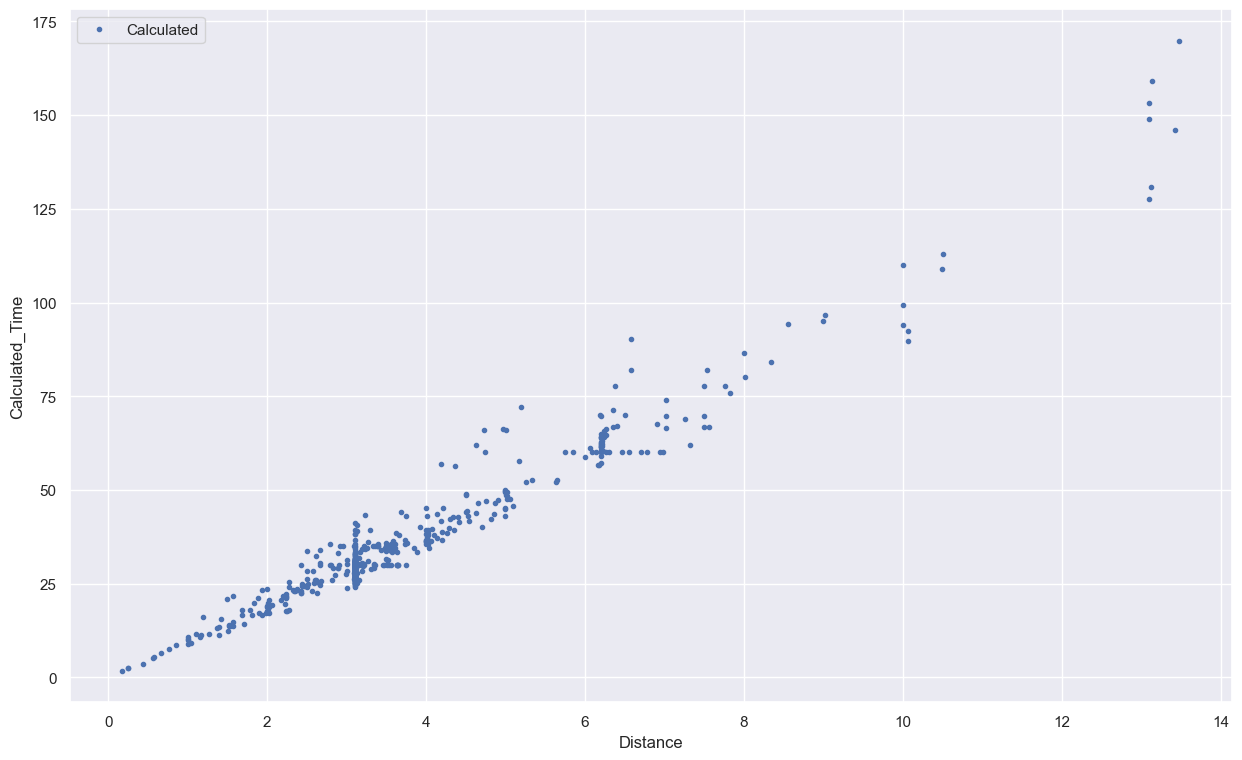

In [9]:

axes = df.plot(x='Distance', y='Calculated', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Calculated_Time')

In [10]:
from scipy import stats

In [11]:
linear_regression = stats.linregress(x=df.Calculated,y=df.Distance)

In [12]:
linear_regression.slope

0.08936581853636652

In [13]:
linear_regression.intercept

0.44908981151551064

* We can use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for any given year.
* In the following calculation, `linear_regression.slope` is **_m_**, our input year is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**.
* We can also predict the approximate difference between one year and another.

In [14]:
Half = linear_regression.slope * 13.1 + linear_regression.intercept 
print(Half) 


1.619782034341912


In [15]:
Full = linear_regression.slope * 26.2 + linear_regression.intercept
print(Full-Half)

1.1706922228264014


### Plotting the Regression Line
* Seaborn’s **`regplot` function** plots each data point with one attribute on the **_x_****-axis and the other on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [16]:
import seaborn as sns
sns.set_style('whitegrid')

(-11.27628301874691, 178.4750610961308)

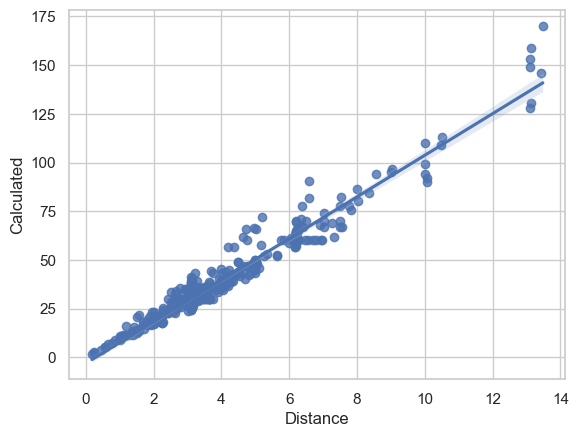

In [17]:
axes = sns.regplot(x=df.Distance, y=df.Calculated)
axes.set_ylim()

## EDA FOR PLOTTING


### summary statistics

In [18]:
df.head(1)


Date_Submitted Workout_Date Activity_Type  Calories_Burned  Distance  \
0  2022-12-04 00:00:00   2022-12-04           Run            440.0       3.1   

   Workout_Time  Avg_Pace  Avg_Speed  Avg_Heart_Rate   Steps day_of_week  \
0        2093.0     11.25       5.33           134.0  3227.0      Sunday   

   Calculated  
0   34.883333

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 753
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   546 non-null    object        
 1   Workout_Date     546 non-null    datetime64[ns]
 2   Activity_Type    546 non-null    object        
 3   Calories_Burned  546 non-null    float64       
 4   Distance         546 non-null    float64       
 5   Workout_Time     546 non-null    float64       
 6   Avg_Pace         546 non-null    float64       
 7   Avg_Speed        546 non-null    float64       
 8   Avg_Heart_Rate   546 non-null    float64       
 9   Steps            546 non-null    float64       
 10  day_of_week      546 non-null    object        
 11  Calculated       546 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 55.5+ KB


In [20]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

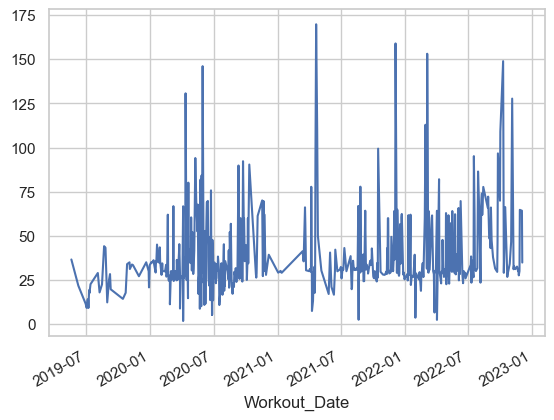

In [21]:
# show data of one subject
mask1 = df['Activity_Type'] == 'Run'
(
    df[mask1]
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

### plot the average of `Calculated` data


<AxesSubplot:xlabel='day_of_week'>

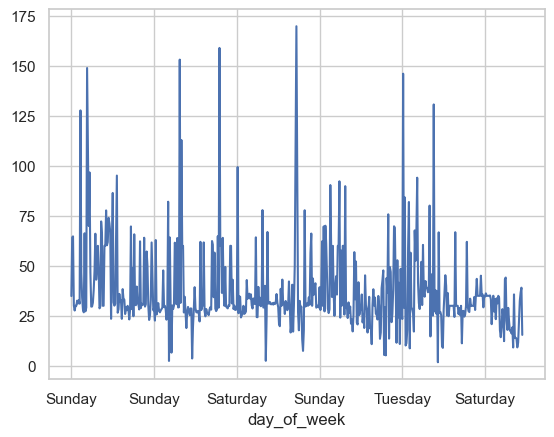

In [22]:
# basic approach to plot using matplotlib w/ chaining approach
(
    df
    .set_index('day_of_week')
    ['Calculated']
    .plot()
)

<AxesSubplot:xlabel='Workout_Date'>

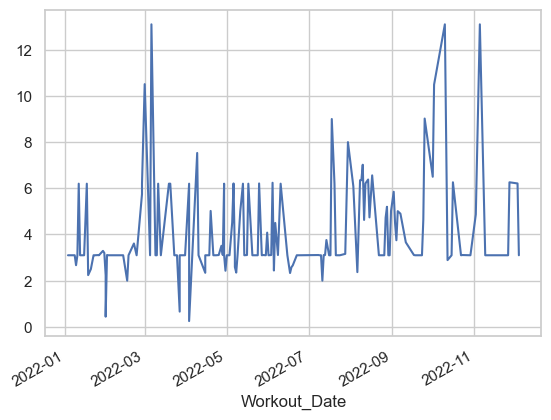

In [23]:
# check runs for 2022
(
    df
    .set_index('Workout_Date')
    .query('Workout_Date > 20220101')
    ['Distance']
    .plot()
)


In [24]:
# get the agg of a col
group = df.groupby(
    'Date_Submitted').count(

    ).sort_values(
        by=['Workout_Date'],
         ascending=False)

In [25]:
group.head()

Workout_Date  Activity_Type  Calories_Burned  Distance  \
Date_Submitted                                                           
2020-06-26                 3              3                3         3   
2020-06-29                 3              3                3         3   
2021-09-13                 3              3                3         3   
2022-02-12                 3              3                3         3   
2020-01-18                 3              3                3         3   

                Workout_Time  Avg_Pace  Avg_Speed  Avg_Heart_Rate  Steps  \
Date_Submitted                                                             
2020-06-26                 3         3          3               3      3   
2020-06-29                 3         3          3               3      3   
2021-09-13                 3         3          3               3      3   
2022-02-12                 3         3          3               3      3   
2020-01-18                 3         3          3               3      3   

                day_of_week  Calculated  
Date_Submitted                           
2020-06-26                3           3  
2020-06-29                3           3  
2021-09-13                3           3  
2022-02-12                3           3  
2020-01-18                3           3

### correlation matrix / Pairplot


In [26]:
df.head(2)

Date_Submitted Workout_Date Activity_Type  Calories_Burned  Distance  \
0  2022-12-04 00:00:00   2022-12-04           Run            440.0      3.10   
1  2022-12-03 00:00:00   2022-12-03           Run            762.0      6.21   

   Workout_Time  Avg_Pace  Avg_Speed  Avg_Heart_Rate    Steps day_of_week  \
0        2093.0     11.25       5.33           134.0   3227.0      Sunday   
1        3854.0     10.34       5.80           153.0  10072.0    Saturday   

   Calculated  
0   34.883333  
1   64.233333

In [27]:
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

### Heatmap - correlation


In [28]:
# show the correlation matrix
df.corr()


Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
Calories_Burned         1.000000  0.974623      0.963446  0.201324  -0.218046   
Distance                0.974623  1.000000      0.977085  0.173426  -0.188577   
Workout_Time            0.963446  0.977085      1.000000  0.352566  -0.361567   
Avg_Pace                0.201324  0.173426      0.352566  1.000000  -0.985445   
Avg_Speed              -0.218046 -0.188577     -0.361567 -0.985445   1.000000   
Avg_Heart_Rate          0.059917  0.024648     -0.037012 -0.297507   0.258576   
Steps                   0.955827  0.978226      0.980814  0.274906  -0.292087   
Calculated              0.963446  0.977085      1.000000  0.352566  -0.361567   

                 Avg_Heart_Rate     Steps  Calculated  
Calories_Burned        0.059917  0.955827    0.963446  
Distance               0.024648  0.978226    0.977085  
Workout_Time          -0.037012  0.980814    1.000000  
Avg_Pace              -0.297507  0.274906    0.352566  
Avg_Speed              0.258576 -0.292087   -0.361567  
Avg_Heart_Rate         1.000000 -0.009301   -0.037012  
Steps                 -0.009301  1.000000    0.980814  
Calculated            -0.037012  0.980814    1.000000

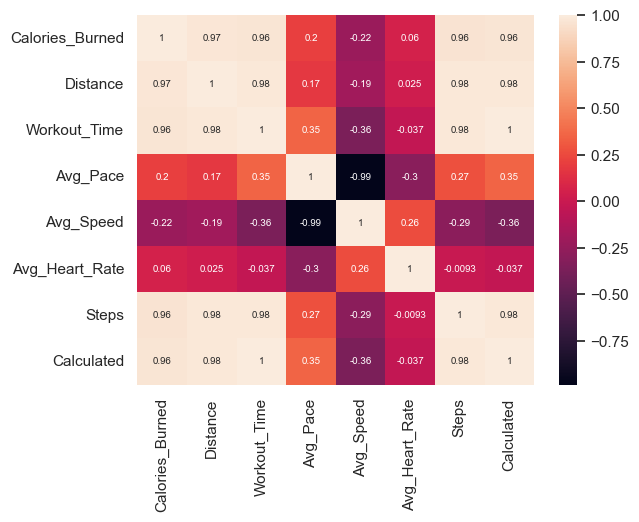

In [29]:
# Default heatmap
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


In [30]:
# show columns
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

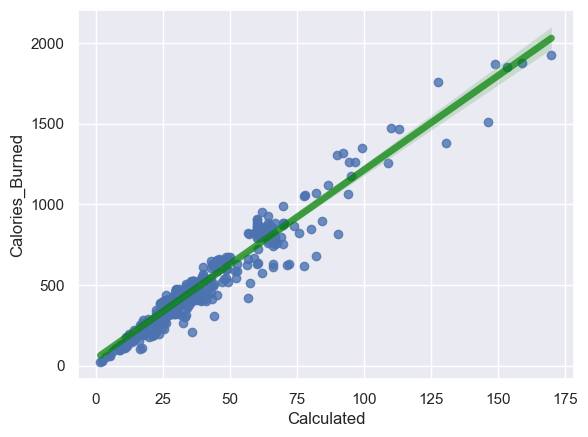

In [31]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# plot
sns.regplot(x=df["Calculated"], y=df["Calories_Burned"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()


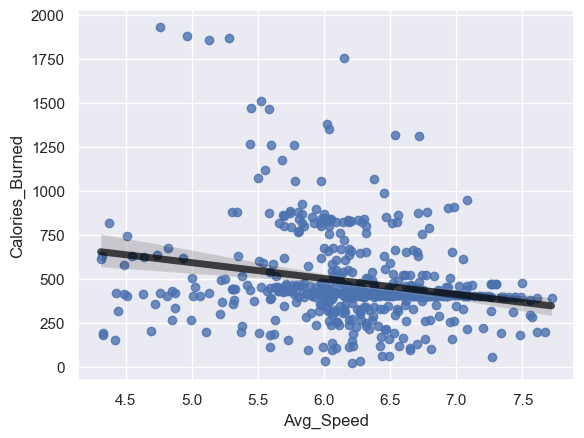

In [32]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Avg_Speed"], y=df["Calories_Burned"],
            line_kws={"color": "black", "alpha": 0.7, "lw": 5})
plt.show()


In [33]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

<AxesSubplot:>

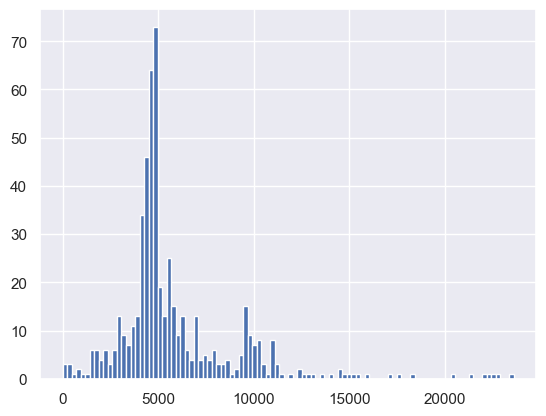

In [34]:
mask1 = df['Steps'] == 0  # get the rows where steps count is 0
df[~mask1]['Steps'].hist(bins=100)


In [35]:
df2 = df[['Workout_Date', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed',
       'Avg_Heart_Rate', 'Steps',
       'Calculated', 'day_of_week']]
df2.corr()

Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
Calories_Burned         1.000000  0.974623      0.963446  0.201324  -0.218046   
Distance                0.974623  1.000000      0.977085  0.173426  -0.188577   
Workout_Time            0.963446  0.977085      1.000000  0.352566  -0.361567   
Avg_Pace                0.201324  0.173426      0.352566  1.000000  -0.985445   
Avg_Speed              -0.218046 -0.188577     -0.361567 -0.985445   1.000000   
Avg_Heart_Rate          0.059917  0.024648     -0.037012 -0.297507   0.258576   
Steps                   0.955827  0.978226      0.980814  0.274906  -0.292087   
Calculated              0.963446  0.977085      1.000000  0.352566  -0.361567   

                 Avg_Heart_Rate     Steps  Calculated  
Calories_Burned        0.059917  0.955827    0.963446  
Distance               0.024648  0.978226    0.977085  
Workout_Time          -0.037012  0.980814    1.000000  
Avg_Pace              -0.297507  0.274906    0.352566  
Avg_Speed              0.258576 -0.292087   -0.361567  
Avg_Heart_Rate         1.000000 -0.009301   -0.037012  
Steps                 -0.009301  1.000000    0.980814  
Calculated            -0.037012  0.980814    1.000000

In [36]:
df2.describe().round(2)

Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
count           546.00    546.00        546.00    546.00     546.00   
mean            480.90      3.80       2247.69      9.77       6.21   
std             260.86      1.96       1288.71      1.09       0.63   
min              19.00      0.18        106.00      7.77       4.31   
25%             393.00      3.10       1635.50      9.08       5.94   
50%             414.00      3.10       1817.50      9.66       6.21   
75%             506.00      4.13       2424.75     10.10       6.61   
max            1928.00     13.48      10191.00     13.91       7.72   

       Avg_Heart_Rate     Steps  Calculated  
count          546.00    546.00      546.00  
mean           148.73   5869.25       37.46  
std              9.85   3326.02       21.48  
min             76.00      8.00        1.77  
25%            149.00   4300.00       27.26  
50%            149.00   4844.50       30.29  
75%            153.00   6445.50       40.41  
max            169.00  23604.00      169.85

In [37]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Distance'][:-1] # -1 means that the latest row is SalePrice
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Distance:\n{}".format(len(top_features), top_features))

There are 4 strongly correlated values with Distance:
Distance           1.000000
Steps              0.978226
Workout_Time       0.977085
Calories_Burned    0.974623
Name: Distance, dtype: float64


<AxesSubplot:>

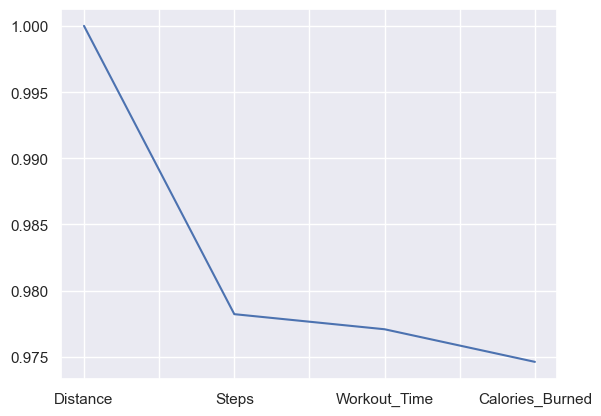

In [38]:
top_features.plot()

## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


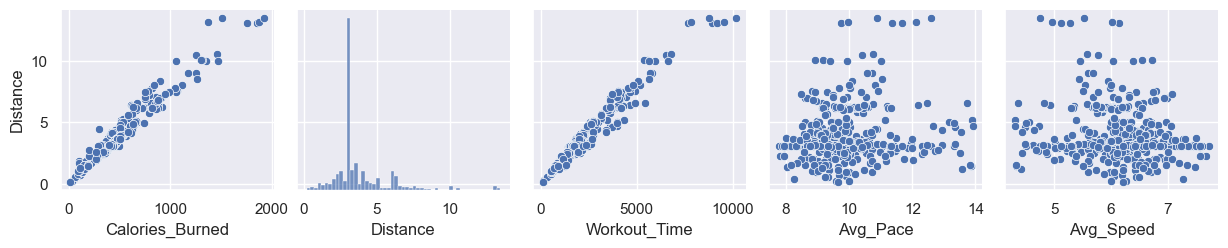

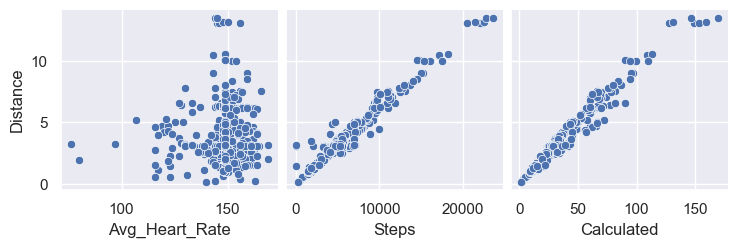

In [39]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Distance'])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'Distance' distribution using the `distplot()` function from the `seaborn` library.


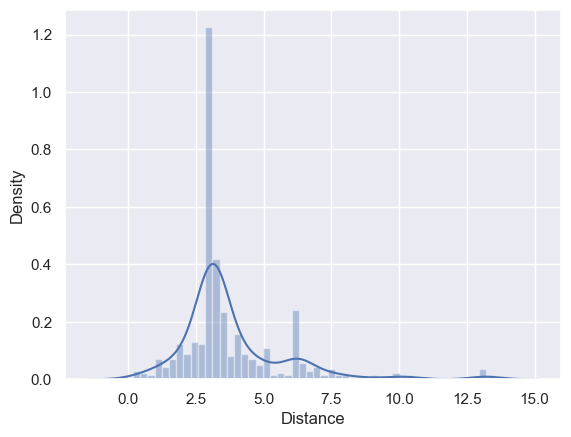

In [40]:
df_untransformed = sns.distplot(df2['Distance'])

As the plot shows, 'Distance' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


In [41]:
print("Skewness: %f" % df2['Distance'].skew())

Skewness: 2.119947


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have \~1.7, so it is considered  highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) contains more information about the numpy log transform.


In [42]:
log_transformed = np.log(df2['Distance'])

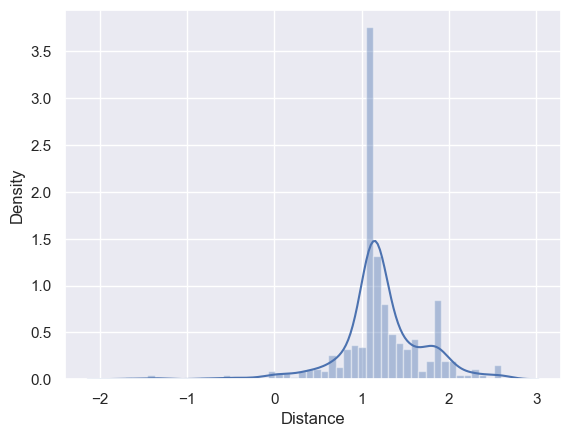

In [43]:
df_transformed = sns.distplot(log_transformed)

As we can see, the log method transformed the 'Distance' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range.

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [44]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.980609


In [45]:
df2.index.is_unique

True

## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.


In [46]:
norm_data = MinMaxScaler().fit_transform(df_num)
norm_data

array([[0.22053431, 0.21954887, 0.19702529, ..., 0.62365591, 0.13642143,
        0.19702529],
       [0.38920901, 0.45338346, 0.37164105, ..., 0.82795699, 0.42651297,
        0.37164105],
       [0.39287585, 0.45714286, 0.37461577, ..., 0.76344086, 0.43583658,
        0.37461577],
       ...,
       [0.20953379, 0.22030075, 0.20733763, ..., 0.67741935, 0.2240634 ,
        0.20733763],
       [0.20115244, 0.22180451, 0.22191373, ..., 0.78494624, 0.29318529,
        0.22191373],
       [0.09009953, 0.09323308, 0.08140803, ..., 0.88172043, 0.00250042,
        0.08140803]])

Note the data is now a `ndarray`


we can also standardize our data.


In [47]:
scaled_data = StandardScaler().fit_transform(df_num)
scaled_data

array([[-0.15692863, -0.35506252, -0.12014495, ..., -1.49777404,
        -0.79514626, -0.12014495],
       [ 1.07857076,  1.2295191 ,  1.24758794, ...,  0.43360046,
         1.26475934,  1.24758794],
       [ 1.10542945,  1.25499469,  1.27088833, ..., -0.17630727,
         1.33096521,  1.27088833],
       ...,
       [-0.23750468, -0.3499674 , -0.03937026, ..., -0.98951759,
        -0.17281101, -0.03937026],
       [-0.29889596, -0.33977716,  0.07480165, ...,  0.02699531,
         0.31801529,  0.07480165],
       [-1.11233034, -1.2110423 , -1.02575344, ...,  0.94185691,
        -1.7461034 , -1.02575344]])

## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [48]:
df2.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated',
       'day_of_week'],
      dtype='object')

<AxesSubplot:xlabel='Distance'>

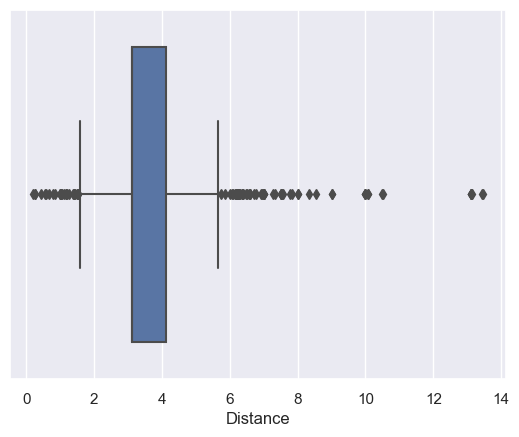

In [49]:
sns.boxplot(x=df2['Distance'])

<AxesSubplot:xlabel='Avg_Speed'>

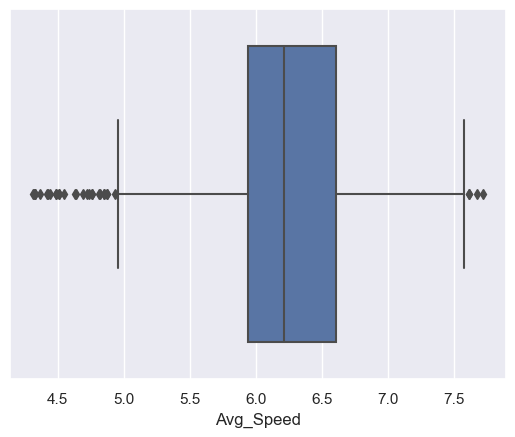

In [50]:
sns.boxplot(x=df2['Avg_Speed'])

<AxesSubplot:xlabel='Avg_Heart_Rate'>

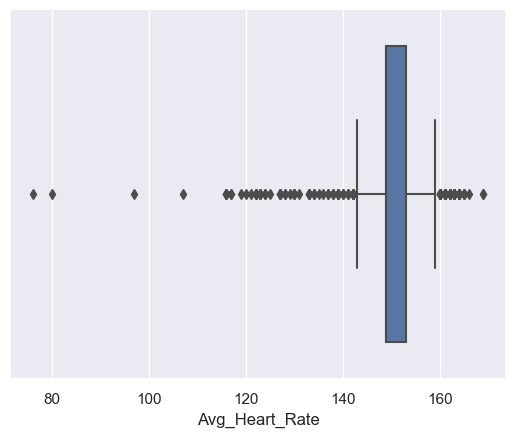

In [51]:
sns.boxplot(x=df2['Avg_Heart_Rate'])

### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters.


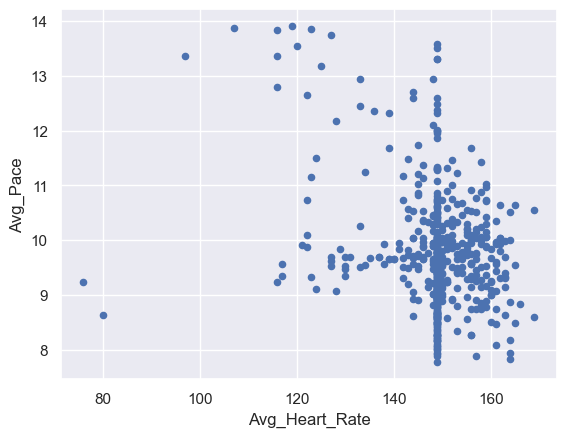

In [52]:
price_area = df2.plot.scatter(x='Avg_Heart_Rate',
                      y='Avg_Pace')

### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [53]:
# df2.sort_values(by = 'Max Speed', ascending = False)[:2]

In [54]:
# outliers_dropped = df.drop([df.index[[529,159]]])

## Z-score Analysis


Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) site.


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [55]:
# df2['Distance'] = stats.zscore(df2['Distance'])
# df2[['Distance','Distance']].describe().round(3)

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 5.084 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.


### ML

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
#Check for null values before testing/training
df2.isnull().sum()

Workout_Date       0
Calories_Burned    0
Distance           0
Workout_Time       0
Avg_Pace           0
Avg_Speed          0
Avg_Heart_Rate     0
Steps              0
Calculated         0
day_of_week        0
dtype: int64

# Exploratory Data Analysis

In [59]:
#Using the sample function pulls a random sample from the dataframe

sample = df.sample(n=10, replace=False)
print(sample.iloc[:,4:])

     Distance  Workout_Time  Avg_Pace  Avg_Speed  Avg_Heart_Rate   Steps  \
444      4.02        2317.0      9.61       6.24           151.0  6298.0   
402      3.09        1669.0      9.00       6.67           160.0  4501.0   
574      4.21        2704.0     10.70       5.61           149.0  7113.0   
583      3.39        2100.0     10.32       5.81           149.0  5531.0   
280      3.62        2310.0     10.64       5.64           162.0  6041.0   
71       3.10        1665.0      8.95       6.70           149.0  4458.0   
51       6.09        3600.0      9.85       6.09           149.0  9545.0   
195      3.10        2292.0     12.32       4.87           149.0  5958.0   
167      3.10        1775.0      9.53       6.29           150.0  4736.0   
65       2.00        1409.0     11.74       5.11           145.0  3302.0   

    day_of_week  Calculated  
444      Monday   38.616667  
402      Monday   27.816667  
574      Monday   45.066667  
583   Wednesday   35.000000  
280    Thursd

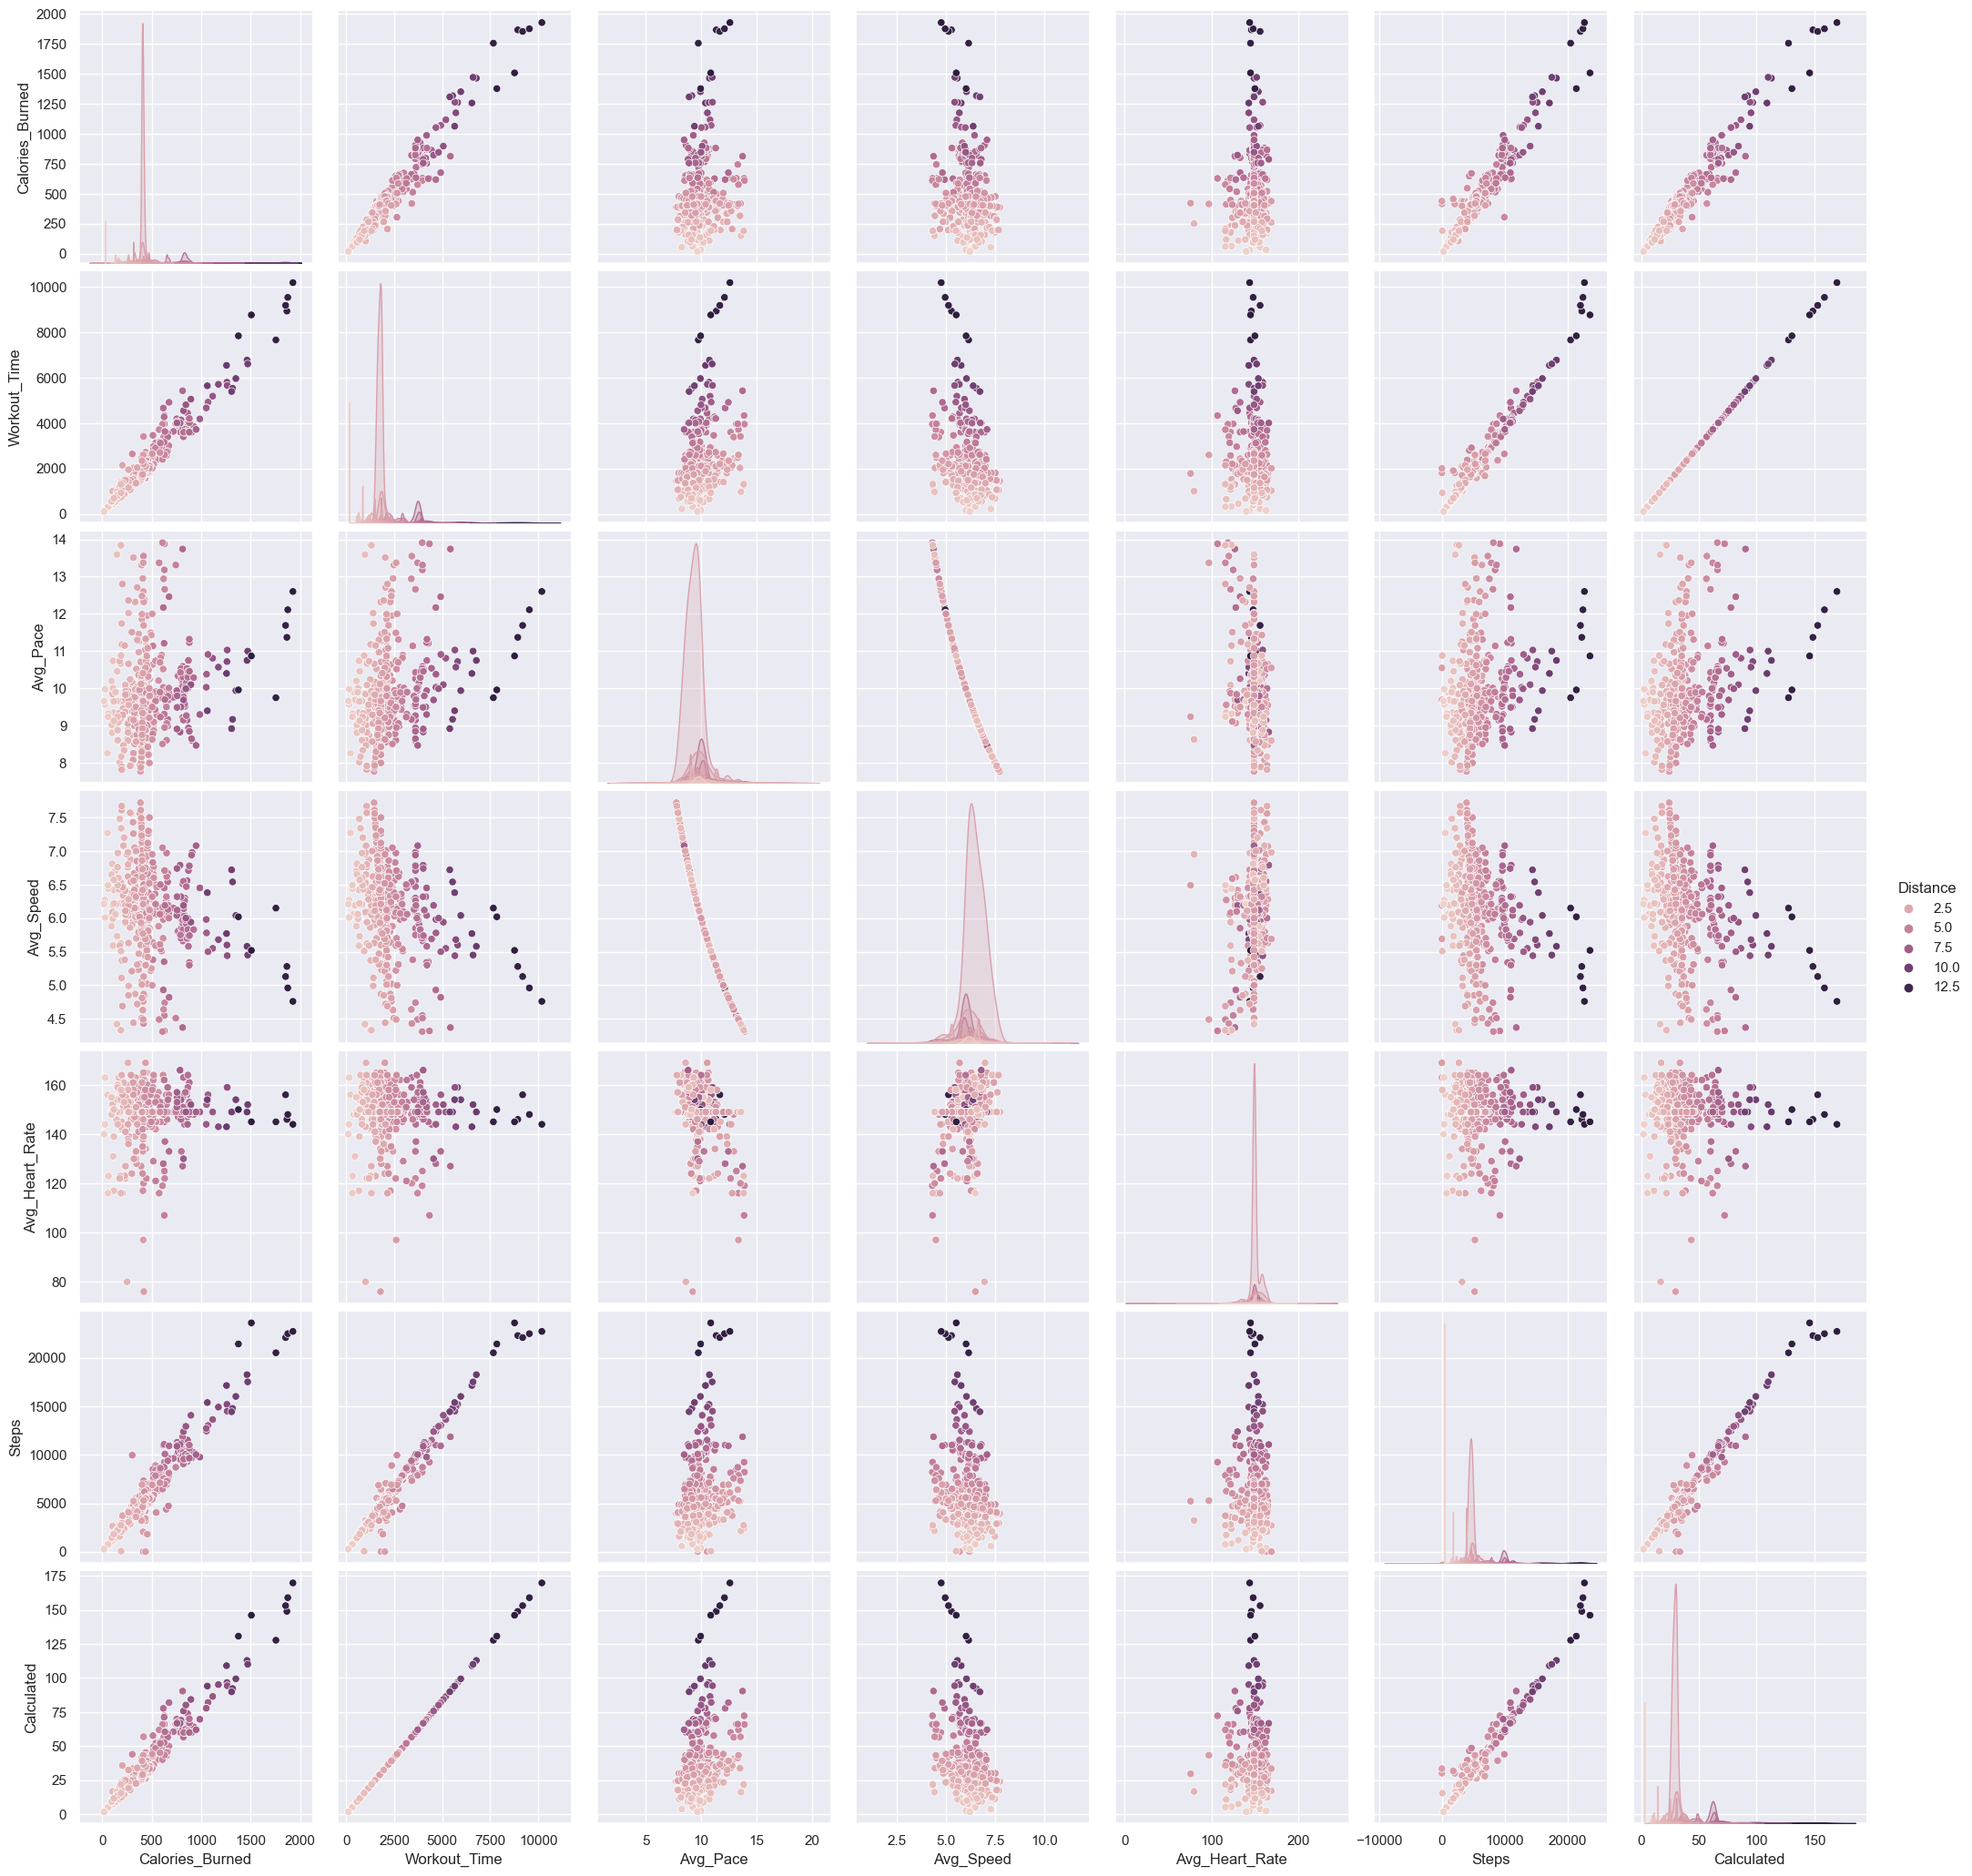

In [60]:
sns.pairplot(df2,
hue='Distance', size=3)

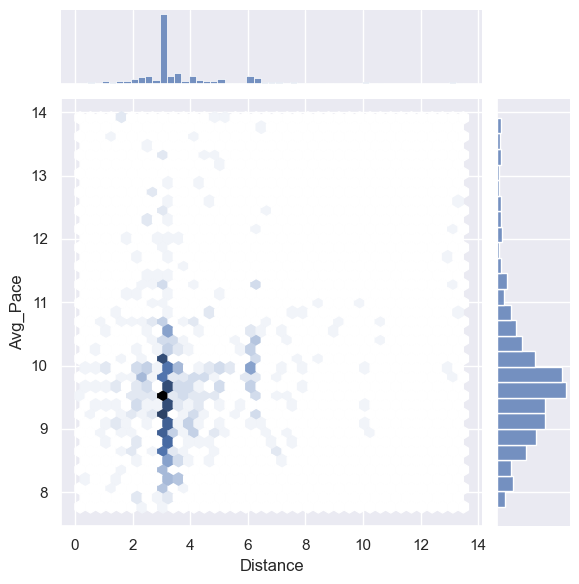

In [61]:
sns.jointplot(x=df2['Distance'],
y=df2['Avg_Pace'], kind='hex')

In [62]:
# plot = sns.FacetGrid(df2, col='Distance',
# margin_titles=True)
# plot.map(plt.hist, 'Avg_Heart_Rate', color = 'red')

## EDA Part Two

In [63]:
df2.head()

Workout_Date  Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
0   2022-12-04            440.0      3.10        2093.0     11.25       5.33   
1   2022-12-03            762.0      6.21        3854.0     10.34       5.80   
2   2022-11-27            769.0      6.26        3884.0     10.33       5.81   
3   2022-11-26            415.0      3.10        1804.0      9.70       6.19   
4   2022-11-24            403.0      3.10        1658.0      8.91       6.73   

   Avg_Heart_Rate    Steps  Calculated day_of_week  
0           134.0   3227.0   34.883333      Sunday  
1           153.0  10072.0   64.233333    Saturday  
2           147.0  10292.0   64.733333      Sunday  
3           150.0   4660.0   30.066667    Saturday  
4           145.0   4439.0   27.633333    Thursday

Let's find out how many entries there are in our dataset, using `shape` function.


In [64]:
df2.shape

(546, 10)

Using `info` function, we will take a look at our types of data.


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 753
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Workout_Date     546 non-null    datetime64[ns]
 1   Calories_Burned  546 non-null    float64       
 2   Distance         546 non-null    float64       
 3   Workout_Time     546 non-null    float64       
 4   Avg_Pace         546 non-null    float64       
 5   Avg_Speed        546 non-null    float64       
 6   Avg_Heart_Rate   546 non-null    float64       
 7   Steps            546 non-null    float64       
 8   Calculated       546 non-null    float64       
 9   day_of_week      546 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 63.1+ KB


Using `columns` method, we will print all the column names.


In [66]:
df2.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated',
       'day_of_week'],
      dtype='object')

Below, we will check for any missing values.


In [67]:
df2.isnull().sum()

Workout_Date       0
Calories_Burned    0
Distance           0
Workout_Time       0
Avg_Pace           0
Avg_Speed          0
Avg_Heart_Rate     0
Steps              0
Calculated         0
day_of_week        0
dtype: int64

## **Data Wrangling**

### Selecting and renaming the columns of interest


Below, we are filtering our data, by selecting only the relevant columns. Also, we are using the `rename()` method to change the name of the columns.


In [68]:
df3 = (df2[['Workout_Date','Calories_Burned','Distance','Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated', 'day_of_week']]).rename(columns={"Calculated" : "Minutes"})
df3[['Minutes']] = df3[['Minutes']].round(2)
df3.head()

Workout_Date  Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
0   2022-12-04            440.0      3.10        2093.0     11.25       5.33   
1   2022-12-03            762.0      6.21        3854.0     10.34       5.80   
2   2022-11-27            769.0      6.26        3884.0     10.33       5.81   
3   2022-11-26            415.0      3.10        1804.0      9.70       6.19   
4   2022-11-24            403.0      3.10        1658.0      8.91       6.73   

   Avg_Heart_Rate    Steps  Minutes day_of_week  
0           134.0   3227.0    34.88      Sunday  
1           153.0  10072.0    64.23    Saturday  
2           147.0  10292.0    64.73      Sunday  
3           150.0   4660.0    30.07    Saturday  
4           145.0   4439.0    27.63    Thursday

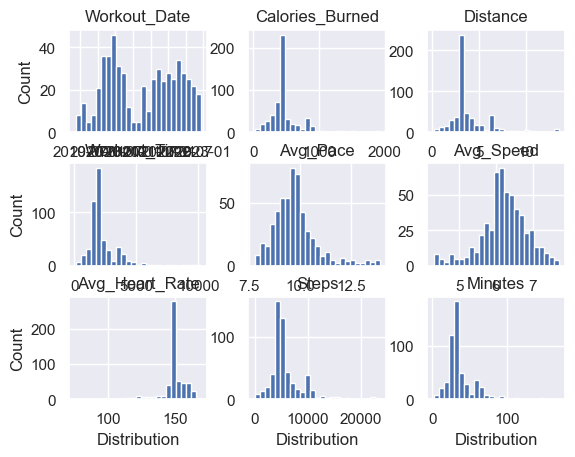

In [69]:
# To create four separate plots, use Pandas `.hist` method
axList = df3.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')
### END SOLUTION

Text(0.5, 1.0, 'Category Histogram')

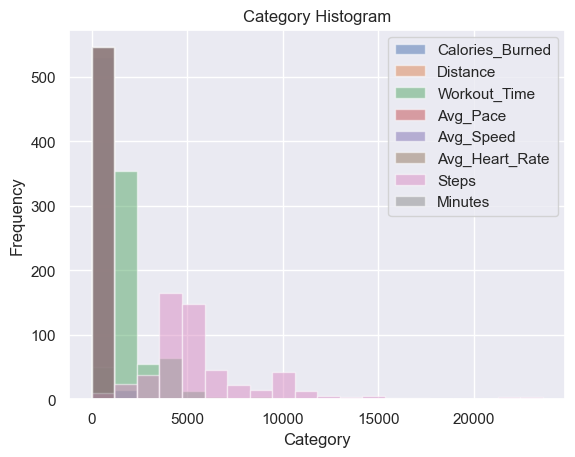

In [70]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = df3.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

## Pandas boxplot

Using Pandas, make a boxplot of each measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

array([[<AxesSubplot:title={'center':'Avg_Heart_Rate'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Avg_Pace'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Avg_Speed'}, xlabel='[day_of_week]'>],
       [<AxesSubplot:title={'center':'Calories_Burned'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Distance'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Minutes'}, xlabel='[day_of_week]'>],
       [<AxesSubplot:title={'center':'Steps'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Workout_Time'}, xlabel='[day_of_week]'>,
        <AxesSubplot:>]], dtype=object)

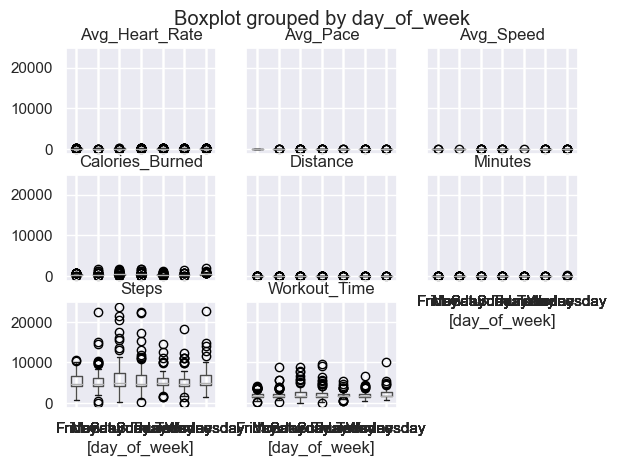

In [71]:
df3.boxplot(by='day_of_week')


## Barplot

In [72]:
df3.head()

Workout_Date  Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
0   2022-12-04            440.0      3.10        2093.0     11.25       5.33   
1   2022-12-03            762.0      6.21        3854.0     10.34       5.80   
2   2022-11-27            769.0      6.26        3884.0     10.33       5.81   
3   2022-11-26            415.0      3.10        1804.0      9.70       6.19   
4   2022-11-24            403.0      3.10        1658.0      8.91       6.73   

   Avg_Heart_Rate    Steps  Minutes day_of_week  
0           134.0   3227.0    34.88      Sunday  
1           153.0  10072.0    64.23    Saturday  
2           147.0  10292.0    64.73      Sunday  
3           150.0   4660.0    30.07    Saturday  
4           145.0   4439.0    27.63    Thursday

In [73]:
df3['day_of_week']=df3['Workout_Date'].dt.day_name()
df3.head()

Workout_Date  Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
0   2022-12-04            440.0      3.10        2093.0     11.25       5.33   
1   2022-12-03            762.0      6.21        3854.0     10.34       5.80   
2   2022-11-27            769.0      6.26        3884.0     10.33       5.81   
3   2022-11-26            415.0      3.10        1804.0      9.70       6.19   
4   2022-11-24            403.0      3.10        1658.0      8.91       6.73   

   Avg_Heart_Rate    Steps  Minutes day_of_week  
0           134.0   3227.0    34.88      Sunday  
1           153.0  10072.0    64.23    Saturday  
2           147.0  10292.0    64.73      Sunday  
3           150.0   4660.0    30.07    Saturday  
4           145.0   4439.0    27.63    Thursday

In [74]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

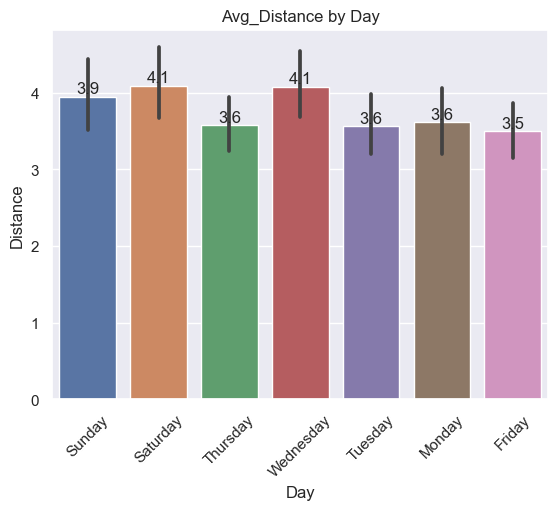

In [75]:
days = sns.barplot(x='day_of_week',y='Distance', data=df3)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')
show_values(days)

In [76]:
df3.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Minutes',
       'day_of_week'],
      dtype='object')

Text(0.5, 1.0, 'Minutes by Distance')

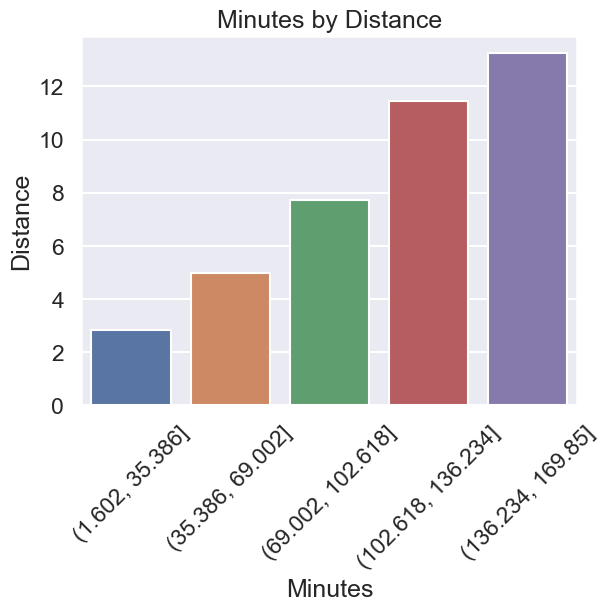

In [77]:
sns.set_context("talk")

sns.barplot(y='Distance', x=pd.cut(
    df3['Minutes'], bins = 5),
    data=df2, ci=None)

plt.ylabel('Distance')
plt.xlabel('Minutes')
plt.xticks(rotation = 45)
plt.title('Minutes by Distance')

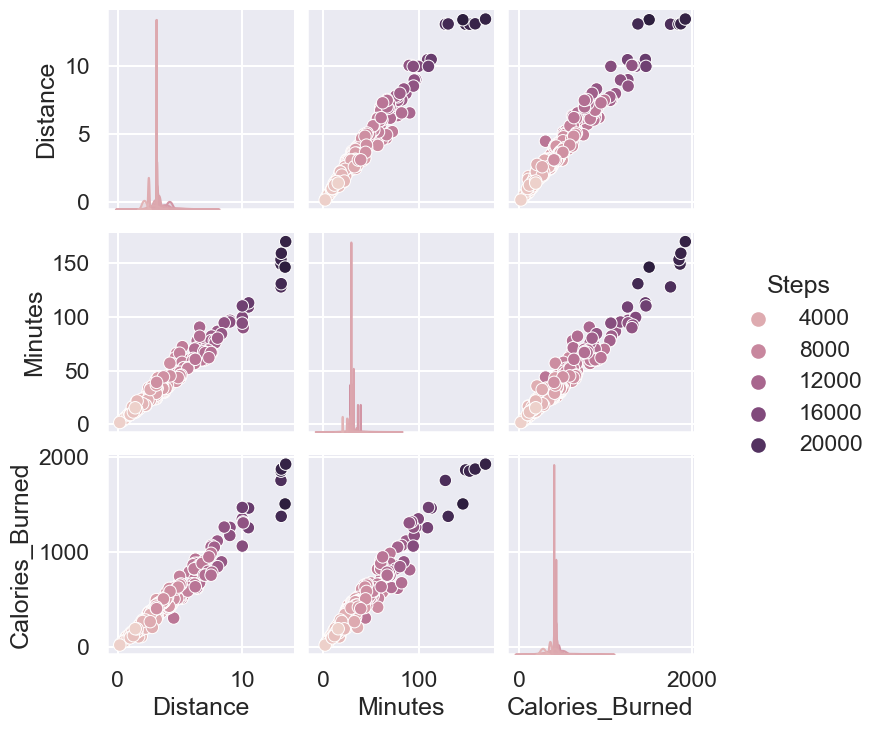

In [78]:
pairplot = df3[['Distance', 'Steps', 'Minutes', 'Calories_Burned']]
sns.pairplot(pairplot, hue='Steps')

Text(0.0, 1.2, 'Minutes by Distance')

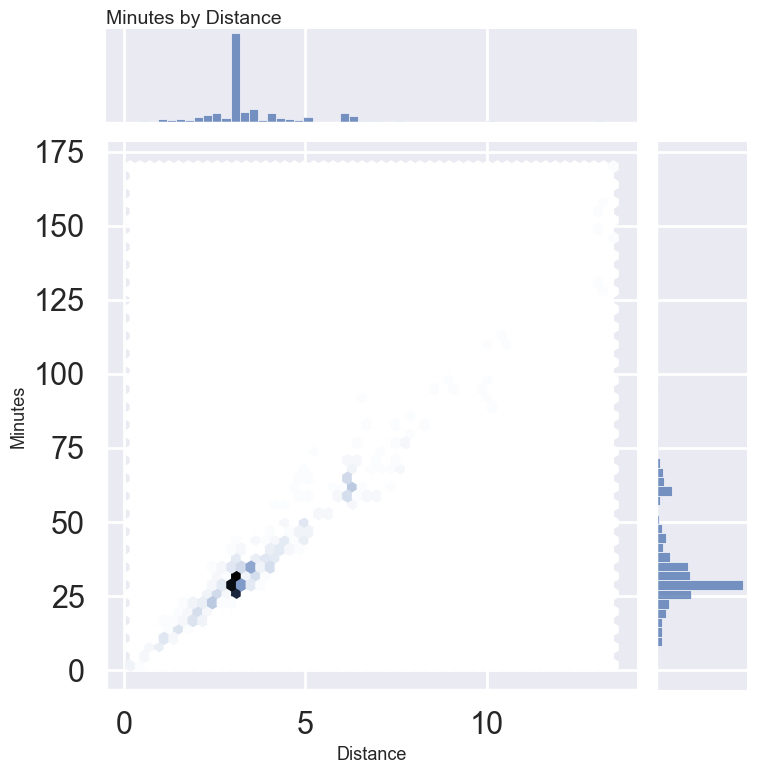

In [79]:
import matplotlib.pyplot as plt
sns.set_context("poster")
jplot = sns.jointplot(x=df3['Distance'], y=df3['Minutes'], kind='hex')
#jplot.fig.suptitle('Minutes by Steps', loc = 'right', fontsize = 14)
plt.ylabel('Minutes', fontsize = 13)
plt.xlabel('Distance', fontsize = 13)
#plt.xticks(rotation = 45)
jplot.fig.set_figwidth(9)
jplot.fig.set_figheight(9)
plt.title('Minutes by Distance', y = 1.2, loc = 'left', fontsize = 14)


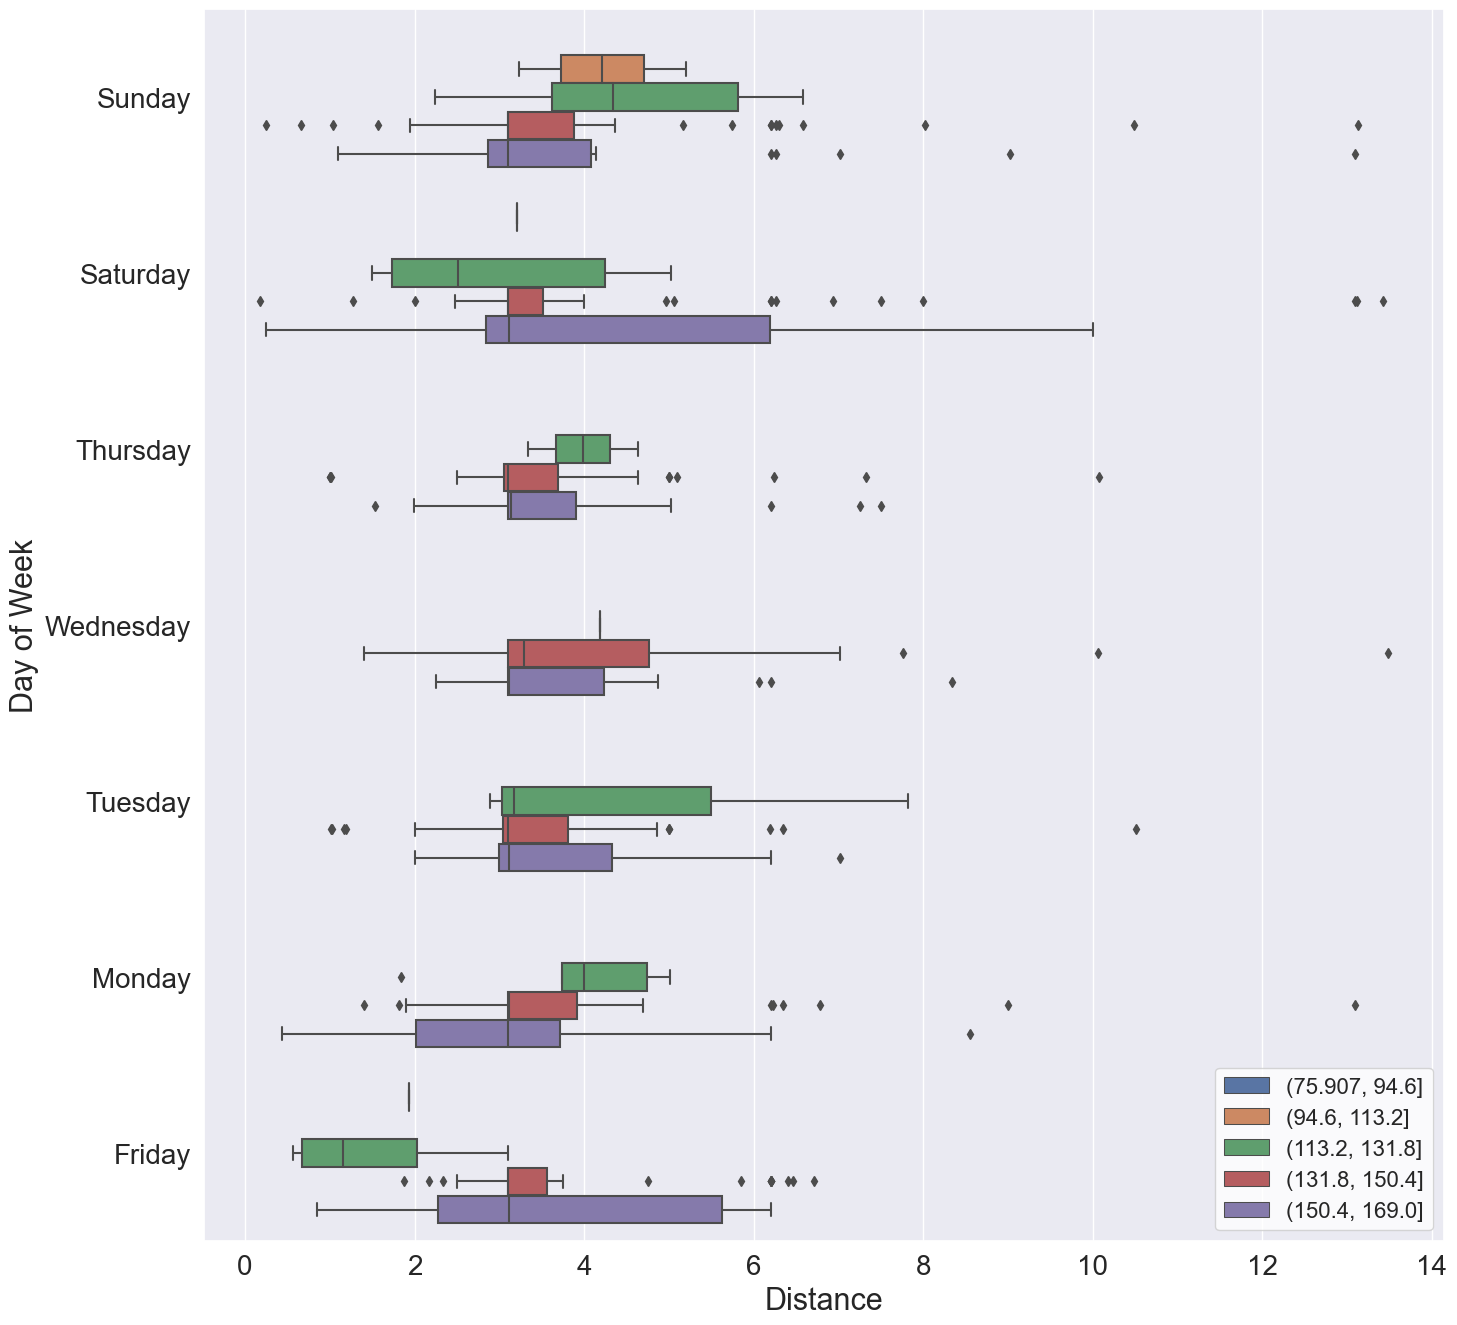

In [80]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Distance', y='day_of_week', data=df3, orient = 'h', hue = (pd.cut(df3['Avg_Heart_Rate'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

## Parametric vs. Non-parametric

Parametric (finite number of distributions)

Non-parametric we make fewer assumptions

Maximum Likelihood Estimation: Related to probability and is a function of the parameters model.

Uniform distribution (uniform because there is an equal chance you will get any of the values as an output of the distribution)

Gaussian/Normal - Most likely value is the value closest to the mean. Further out values are equally unlikely.

Central limit theorum - take the average value from random samples. The distribution of those averages will be a normal curve. 

Log Normal - If you take the log of a variable you will have the normal distribution.

Exponential Curve - Most values closer to the left side. Often used to same what will be the amount of time before the next event.

Poisson - The number of events that happen during a certain amount of time. 

### Frequentist - Repeated observations in the limit.

Queueing theory - study of working with queues or lines. How much supply do we need to handle the demand (web servers for frequencies, waiters for customers at a restaurant)

Processes may have true frequencies - we are interested in modeling as many repeats of an experiment as possible. If the sample is large enough, we will have seen enough queues or lines to infer an estimate of our probabilities.

Derive the probalistic property of a procedure.

The more data we have the more confident we can be.

Apply the probability directly to the observed data.

### Bayesian - Describes parameters by probability distributions

Before seeing any data, a prior distribution is formulated. X amount of people in line at a certain time period will allow us to have an estimated guess.

Prior distributed is updated after seeing the data. Our initial estimate updates once data is introduced.

The updated data is referred to as posterior distribution.

Same math and same data - the differences is the interpretation.

In [81]:
# sns.set_style('white')
# sns.set_context('notebook')
# sns.set_palette('dark')

# f = plt.figure(figsize=(6,4))
# sns.boxplot(x='Distance', y='Avg_Heart_Rate', 
#             hue='Avg_Pace', data=df2);

<AxesSubplot:>

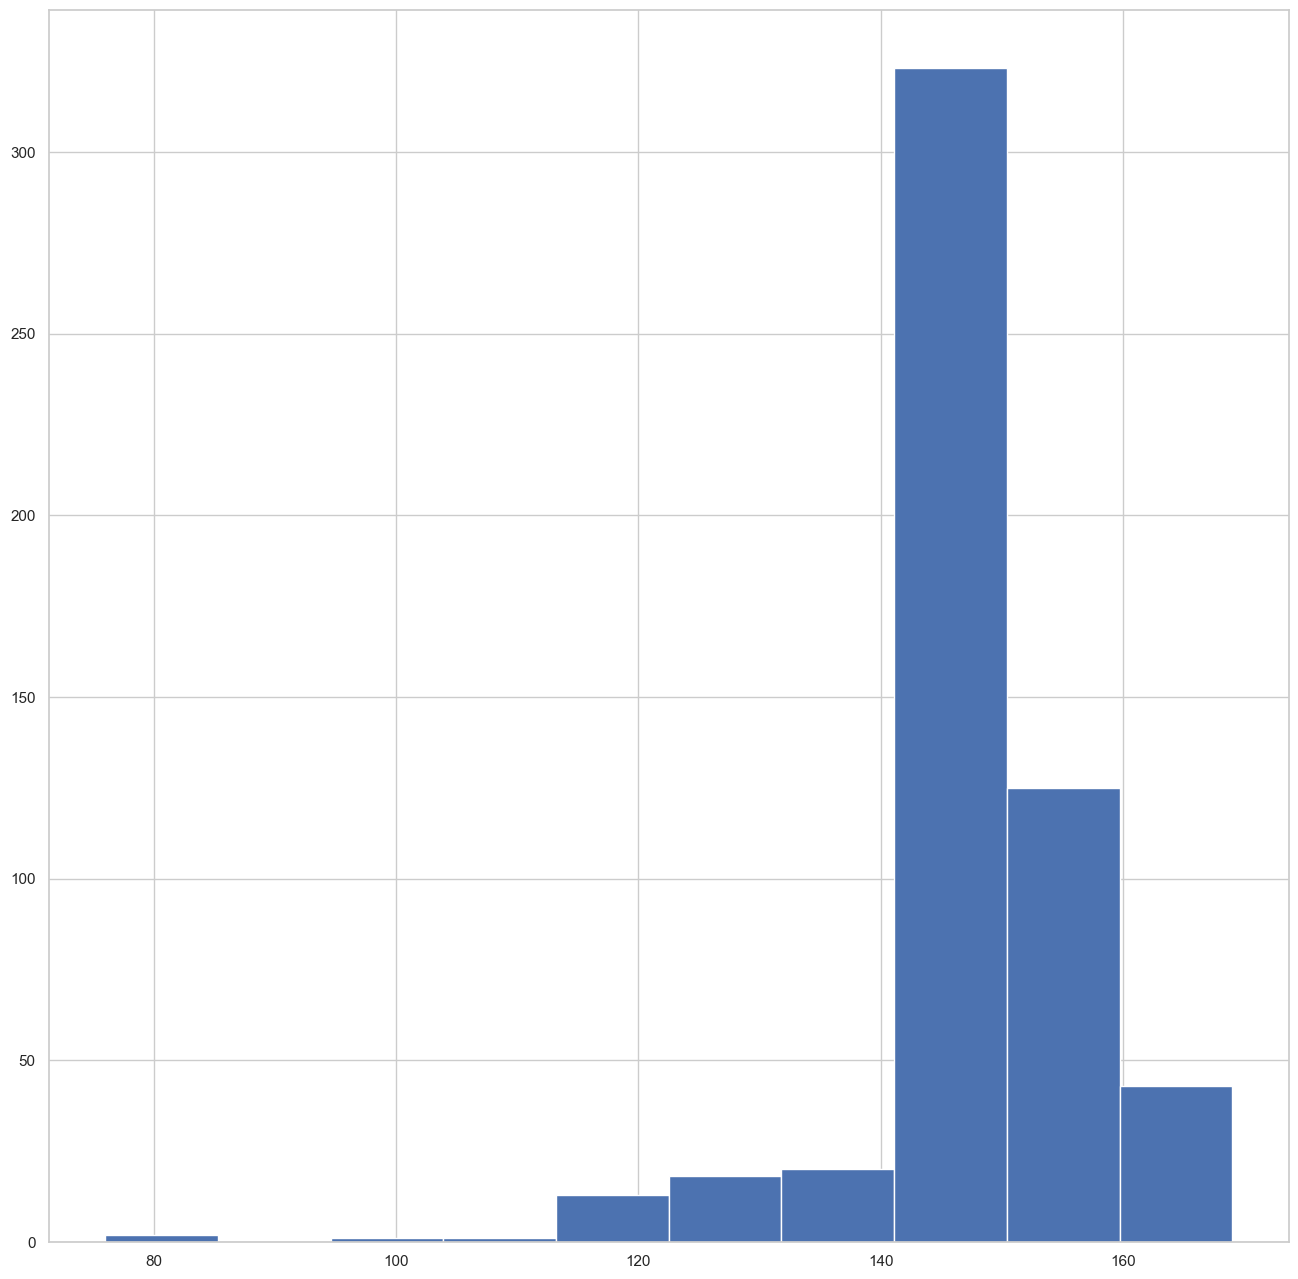

In [82]:
df3.Avg_Heart_Rate.hist()

array([[<AxesSubplot:title={'center':'Workout_Date'}>,
        <AxesSubplot:title={'center':'Calories_Burned'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Workout_Time'}>,
        <AxesSubplot:title={'center':'Avg_Pace'}>,
        <AxesSubplot:title={'center':'Avg_Speed'}>],
       [<AxesSubplot:title={'center':'Avg_Heart_Rate'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Minutes'}>]], dtype=object)

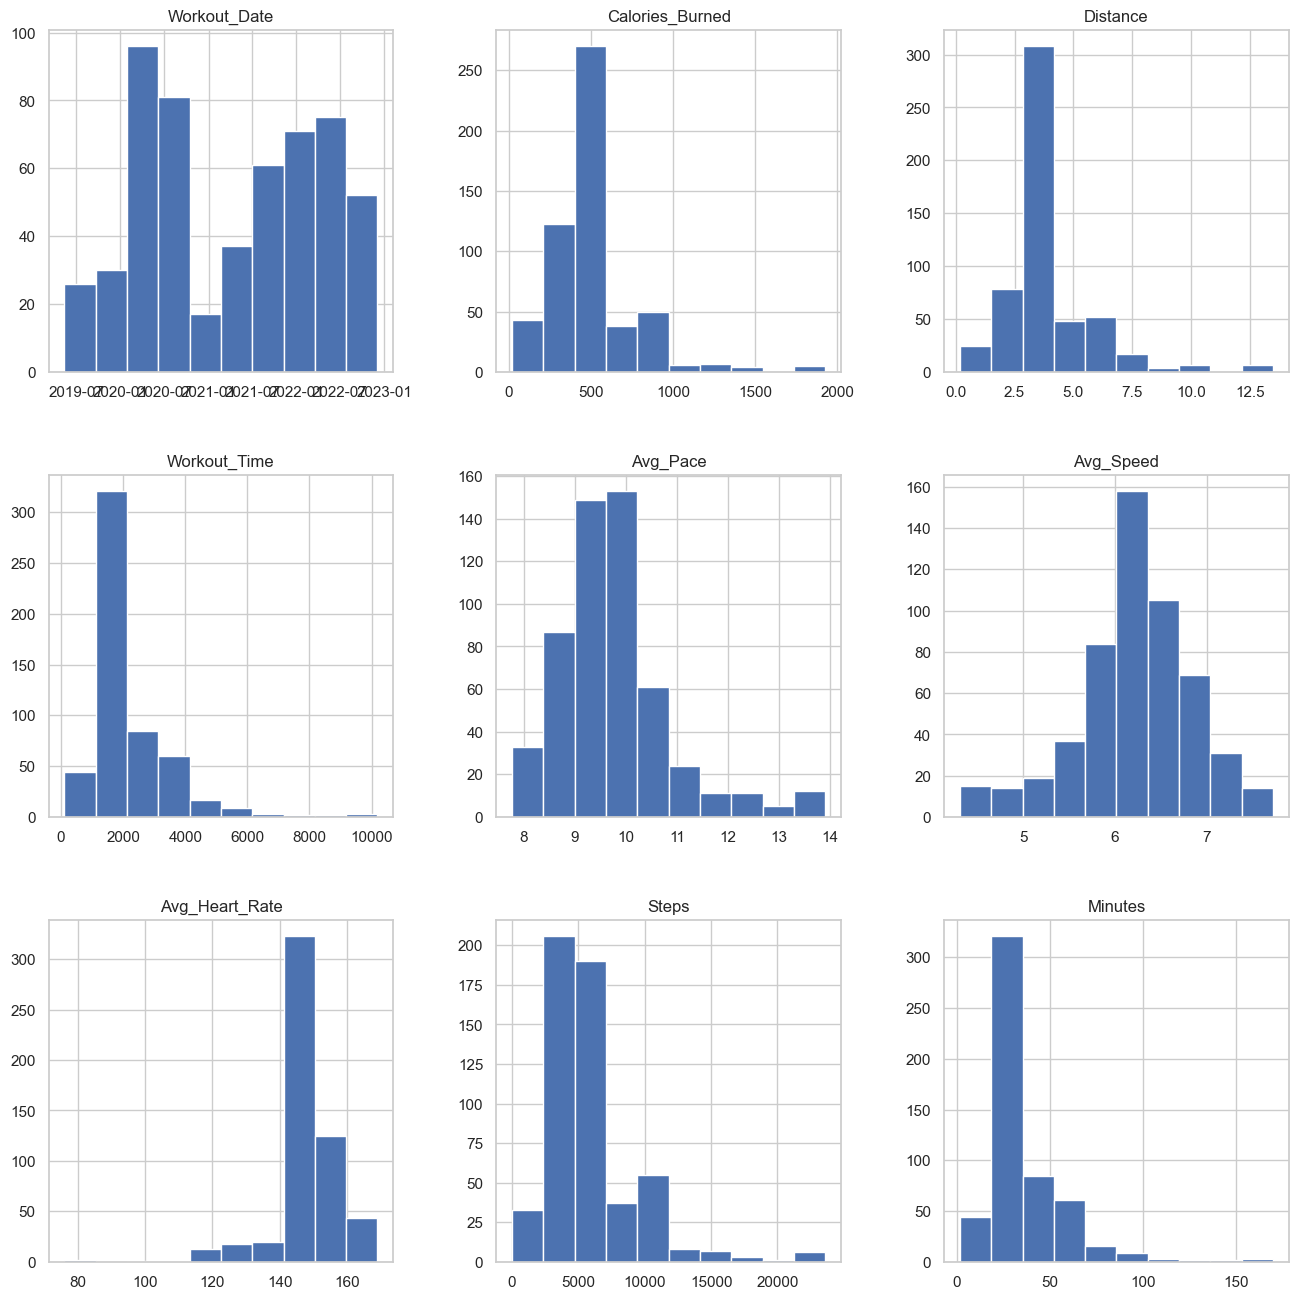

In [83]:
df3.hist()

In [84]:
from scipy.stats.mstats import normaltest
normaltest(df3.Distance.values)

NormaltestResult(statistic=260.5266775159545, pvalue=2.675166289415618e-57)

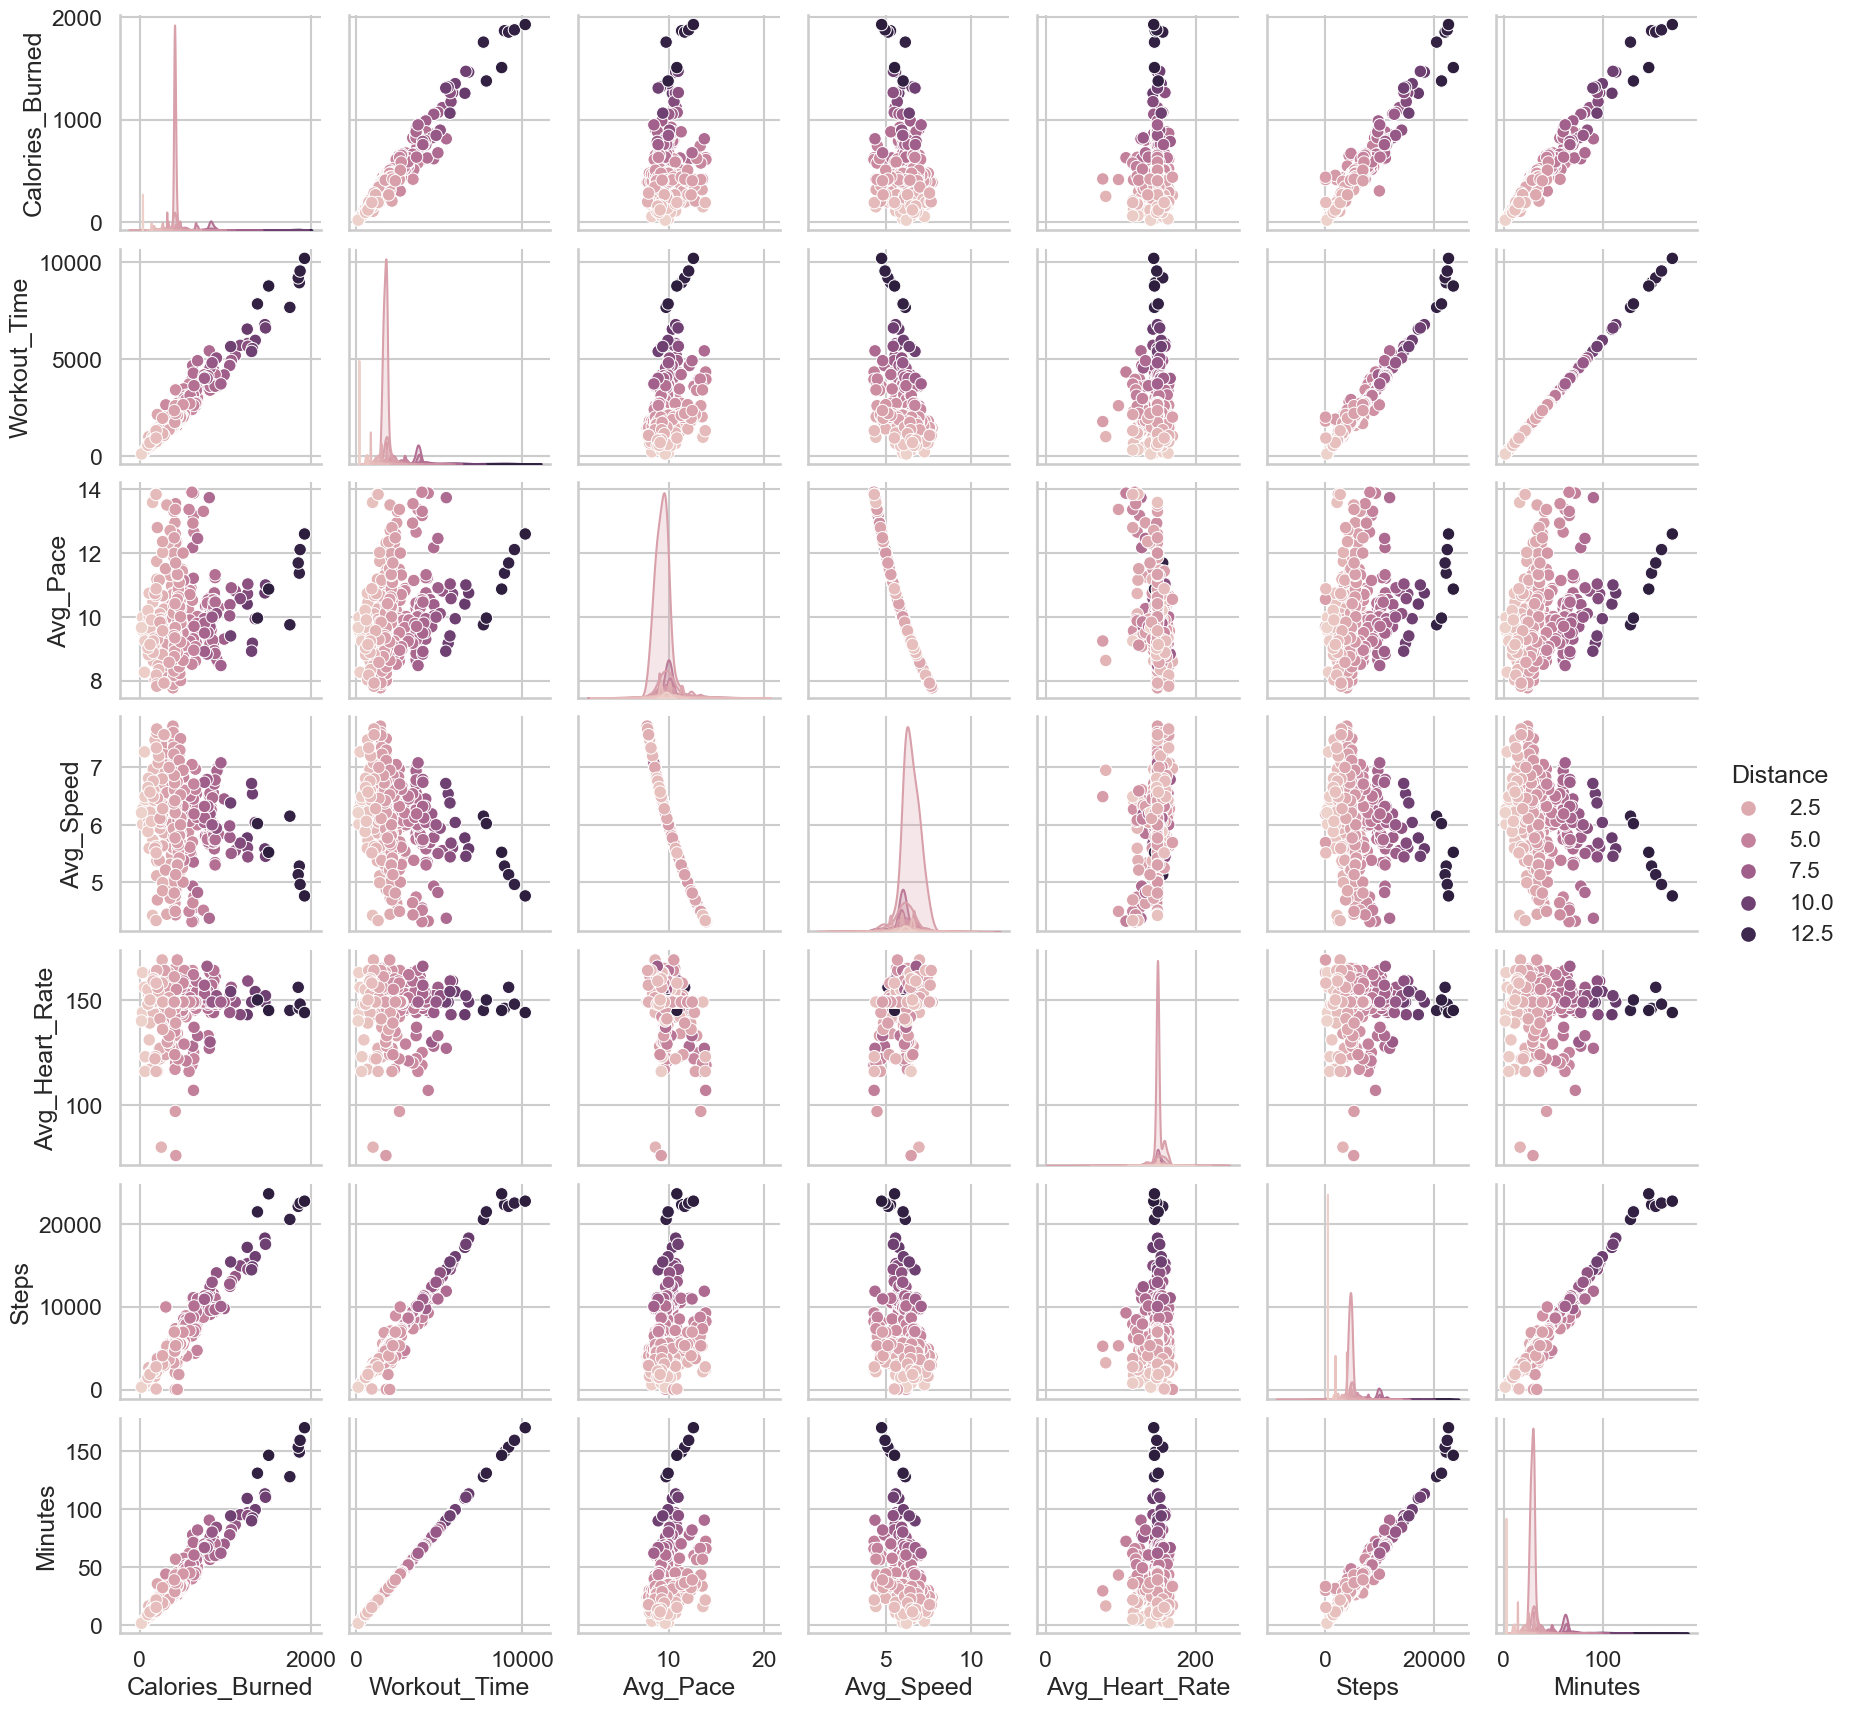

In [85]:
sns.set_context('talk')
sns.pairplot(df3, hue='Distance');

## Hypothesis Testing

## Interpretation and Prediction

Gather x, y; Train the model by finding the best prediction

Focus on 

## Transformation of Data Distribution

In [86]:
from numpy import log
from scipy.stats import boxcox

# Machine Learning

## Linear Regression

In [87]:
%pip install group

ERROR: Could not find a version that satisfies the requirement group (from versions: none)
ERROR: No matching distribution found for group
Note: you may need to restart the kernel to use updated packages.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#from helper import *

import warnings
warnings.simplefilter("ignore")

In [89]:
df3.head()


Workout_Date  Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
0   2022-12-04            440.0      3.10        2093.0     11.25       5.33   
1   2022-12-03            762.0      6.21        3854.0     10.34       5.80   
2   2022-11-27            769.0      6.26        3884.0     10.33       5.81   
3   2022-11-26            415.0      3.10        1804.0      9.70       6.19   
4   2022-11-24            403.0      3.10        1658.0      8.91       6.73   

   Avg_Heart_Rate    Steps  Minutes day_of_week  
0           134.0   3227.0    34.88      Sunday  
1           153.0  10072.0    64.23    Saturday  
2           147.0  10292.0    64.73      Sunday  
3           150.0   4660.0    30.07    Saturday  
4           145.0   4439.0    27.63    Thursday

In [90]:
df4 = df3.drop(['Workout_Date', 'day_of_week'], axis = 1)
df4.columns

Index(['Calories_Burned', 'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed',
       'Avg_Heart_Rate', 'Steps', 'Minutes'],
      dtype='object')

#### Visually

Plotting a histogram:

<AxesSubplot:>

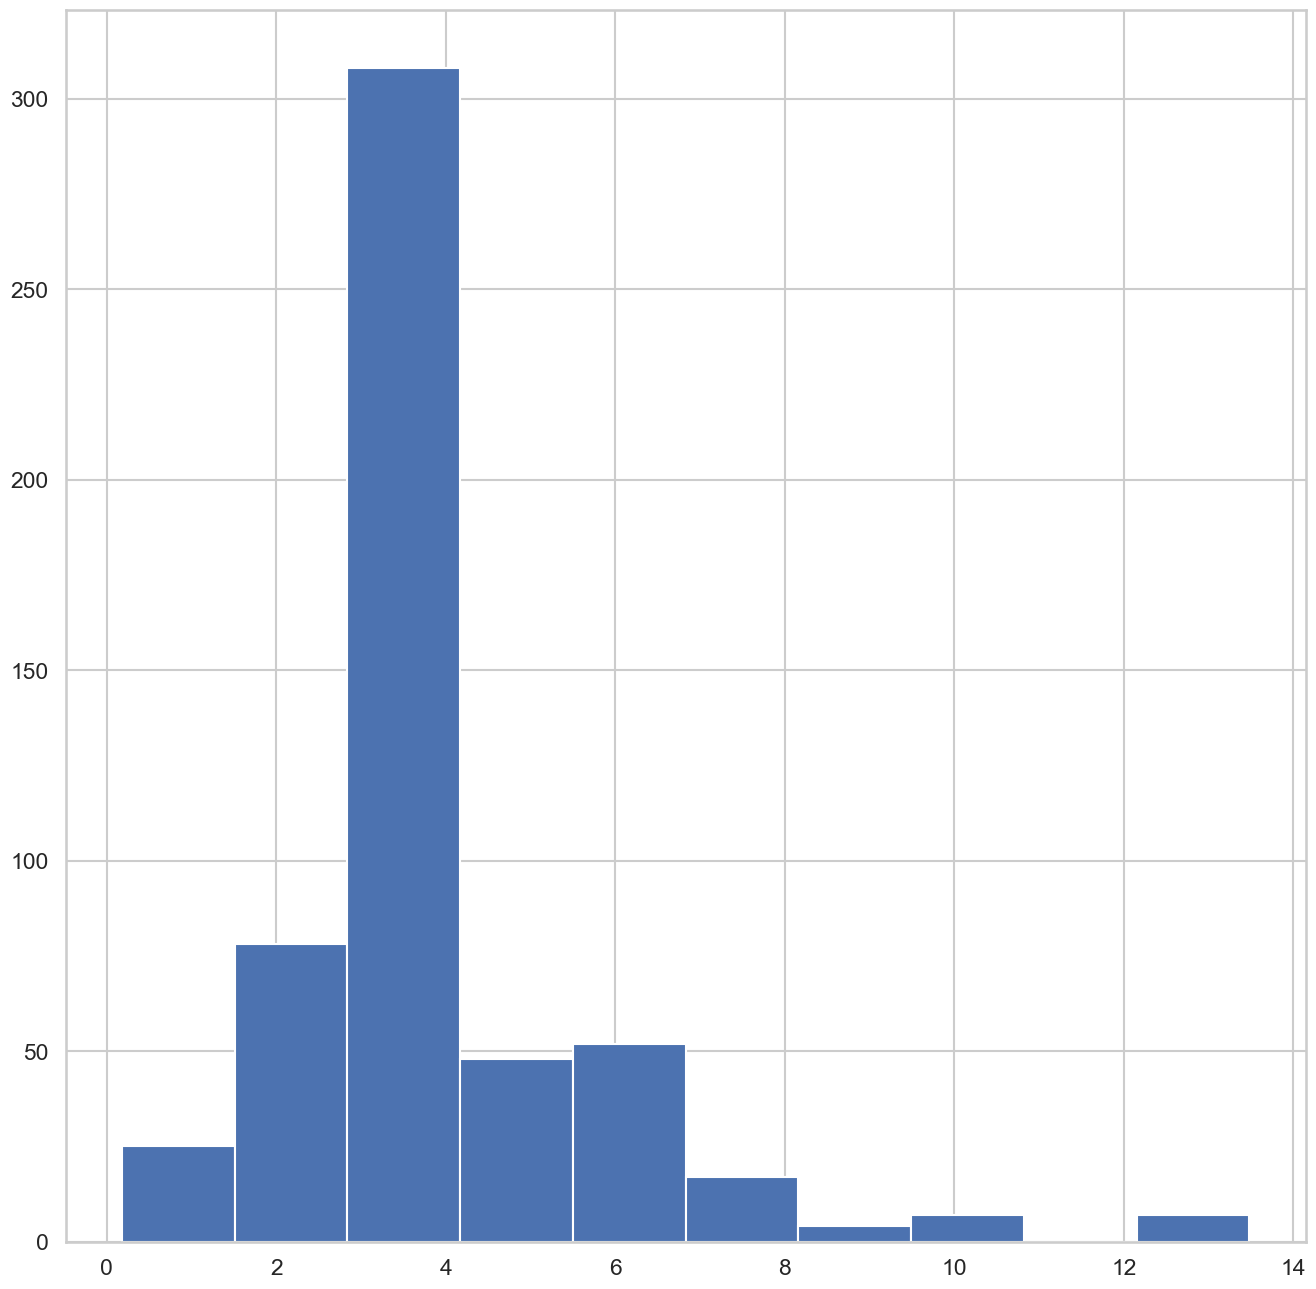

In [91]:
df4.Distance.hist()

Does not look normal due to that right tail. Let's try to verify statistically:

In [92]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [93]:
normaltest(df4.Distance.values)

NormaltestResult(statistic=260.5266775159545, pvalue=2.675166289415618e-57)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

In [94]:
log_dist = np.log(df4.Distance)

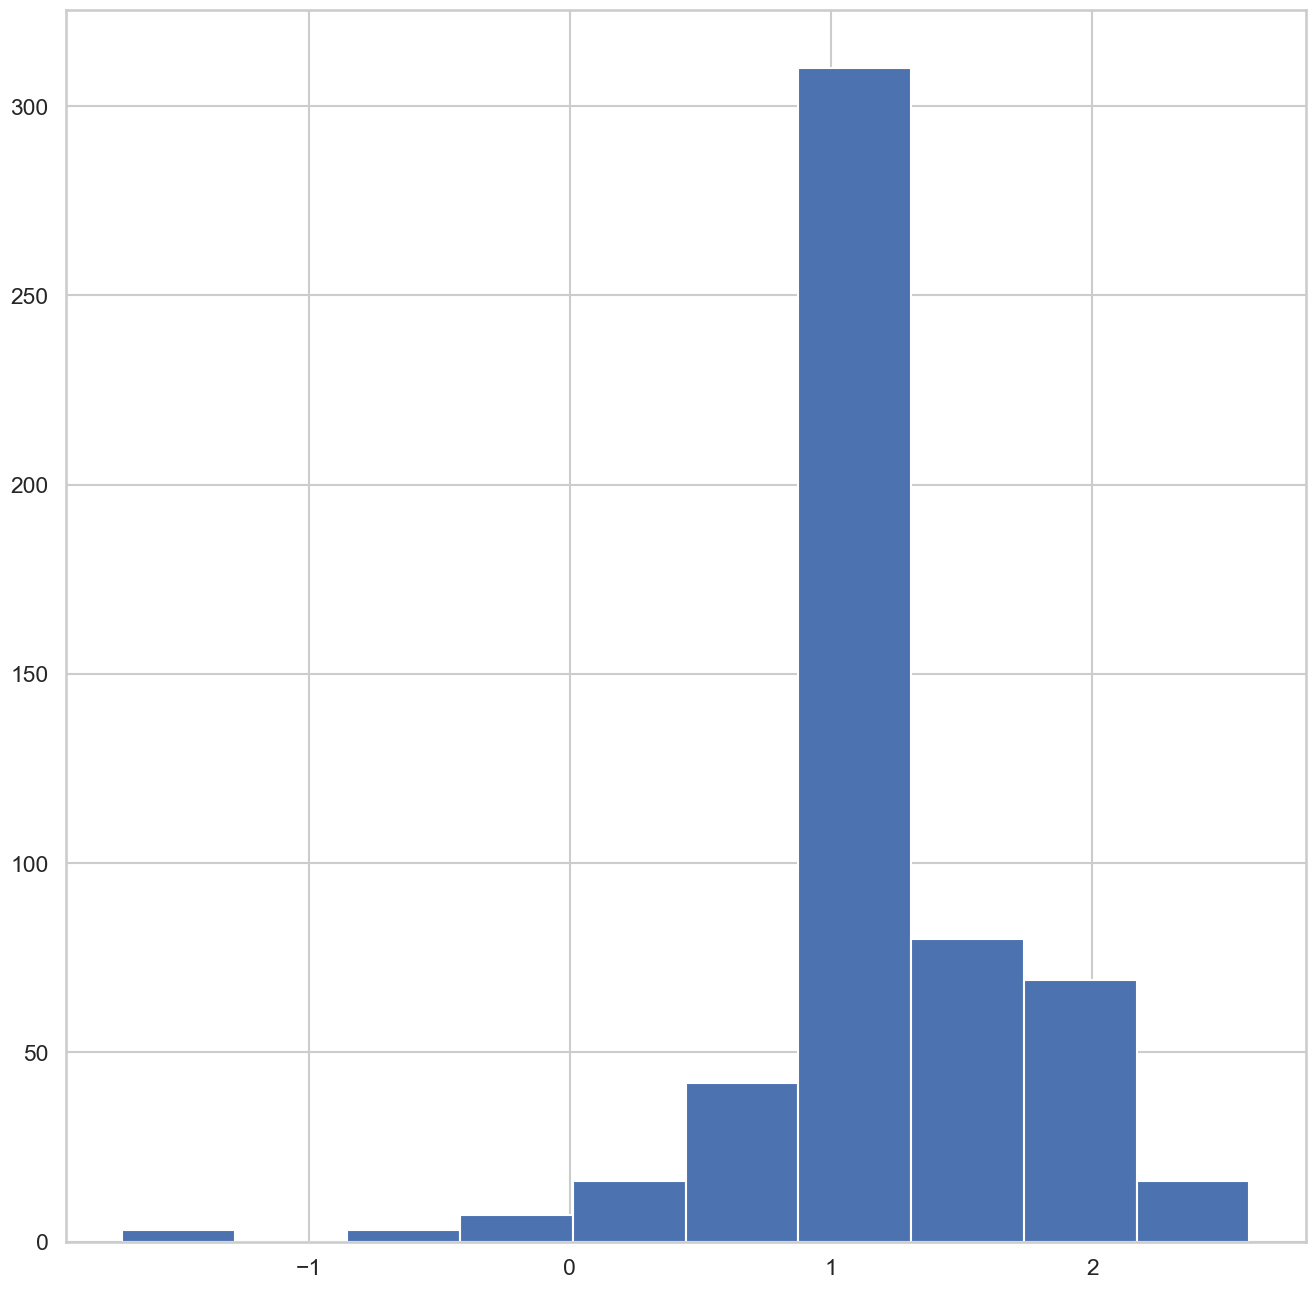

In [95]:
log_dist.hist();

In [96]:
normaltest(log_dist)

NormaltestResult(statistic=139.3597868637005, pvalue=5.475285667015108e-31)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

(array([  5.,  11.,  26.,  68., 303.,  46.,  59.,  14.,   7.,   7.]),
 array([0.42426407, 0.74898886, 1.07371364, 1.39843843, 1.72316322,
        2.04788801, 2.3726128 , 2.69733759, 3.02206237, 3.34678716,
        3.67151195]),
 <BarContainer object of 10 artists>)

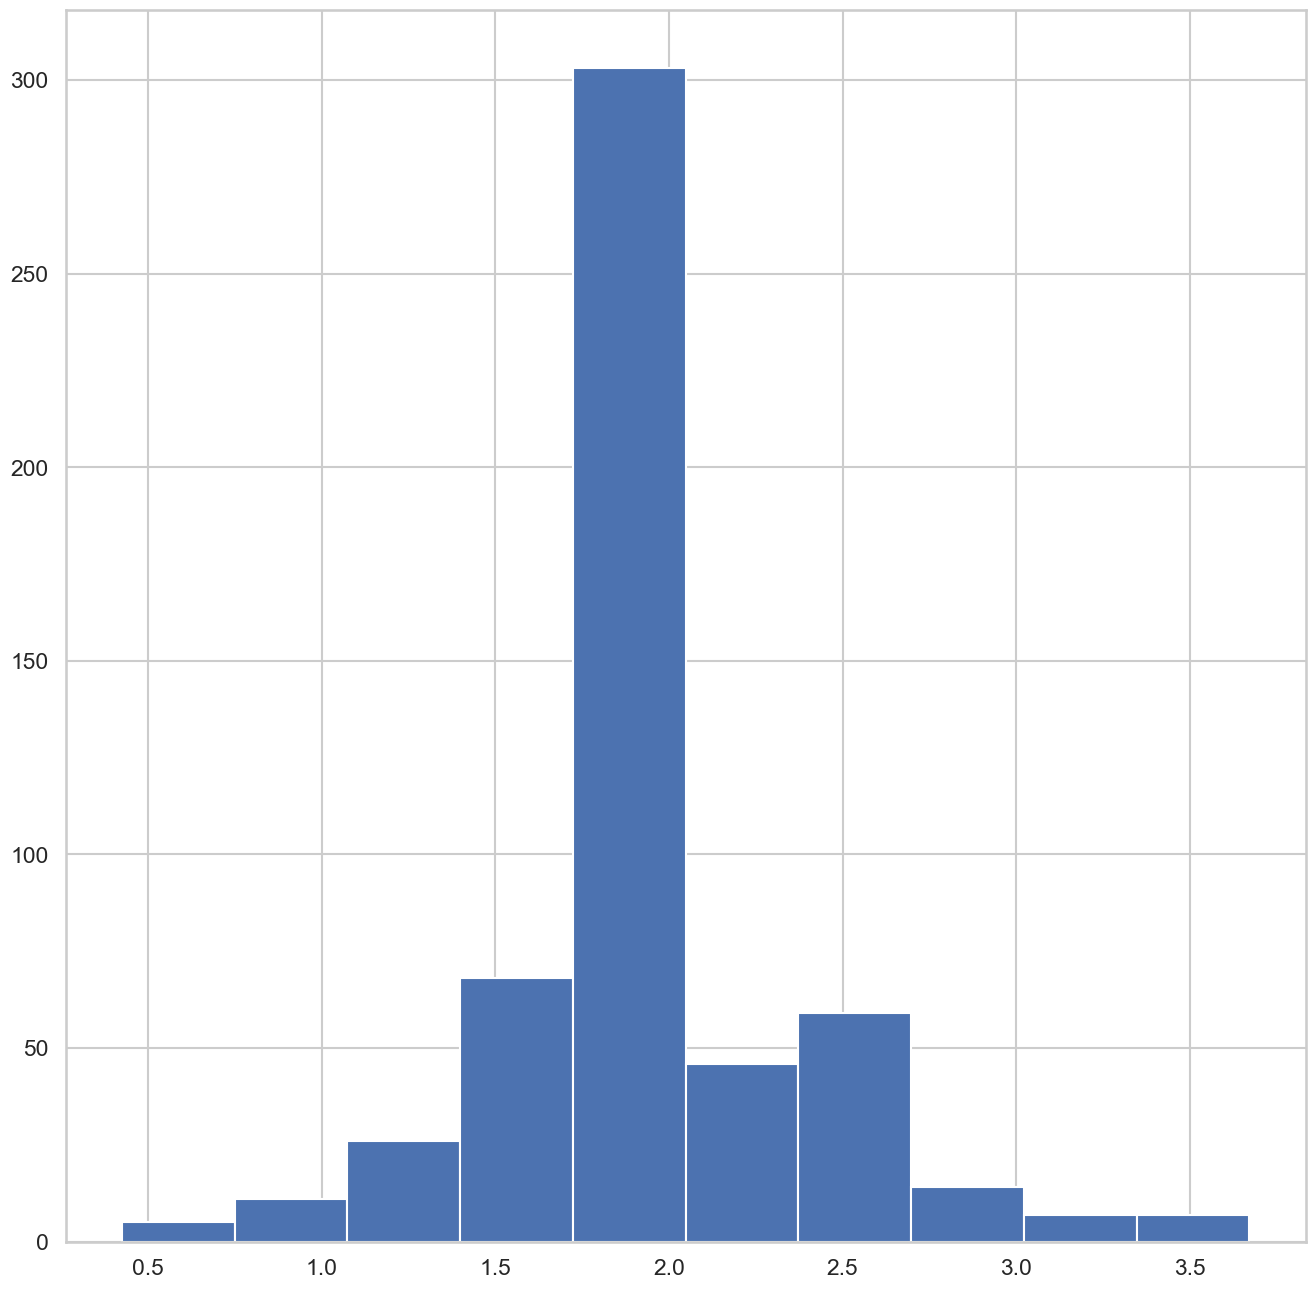

In [97]:
# Instructor Solution

sqrt_dist = np.sqrt(df4.Distance)
plt.hist(sqrt_dist)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [98]:
from scipy.stats import boxcox

In [99]:
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [100]:
lam

0.2581453419587261

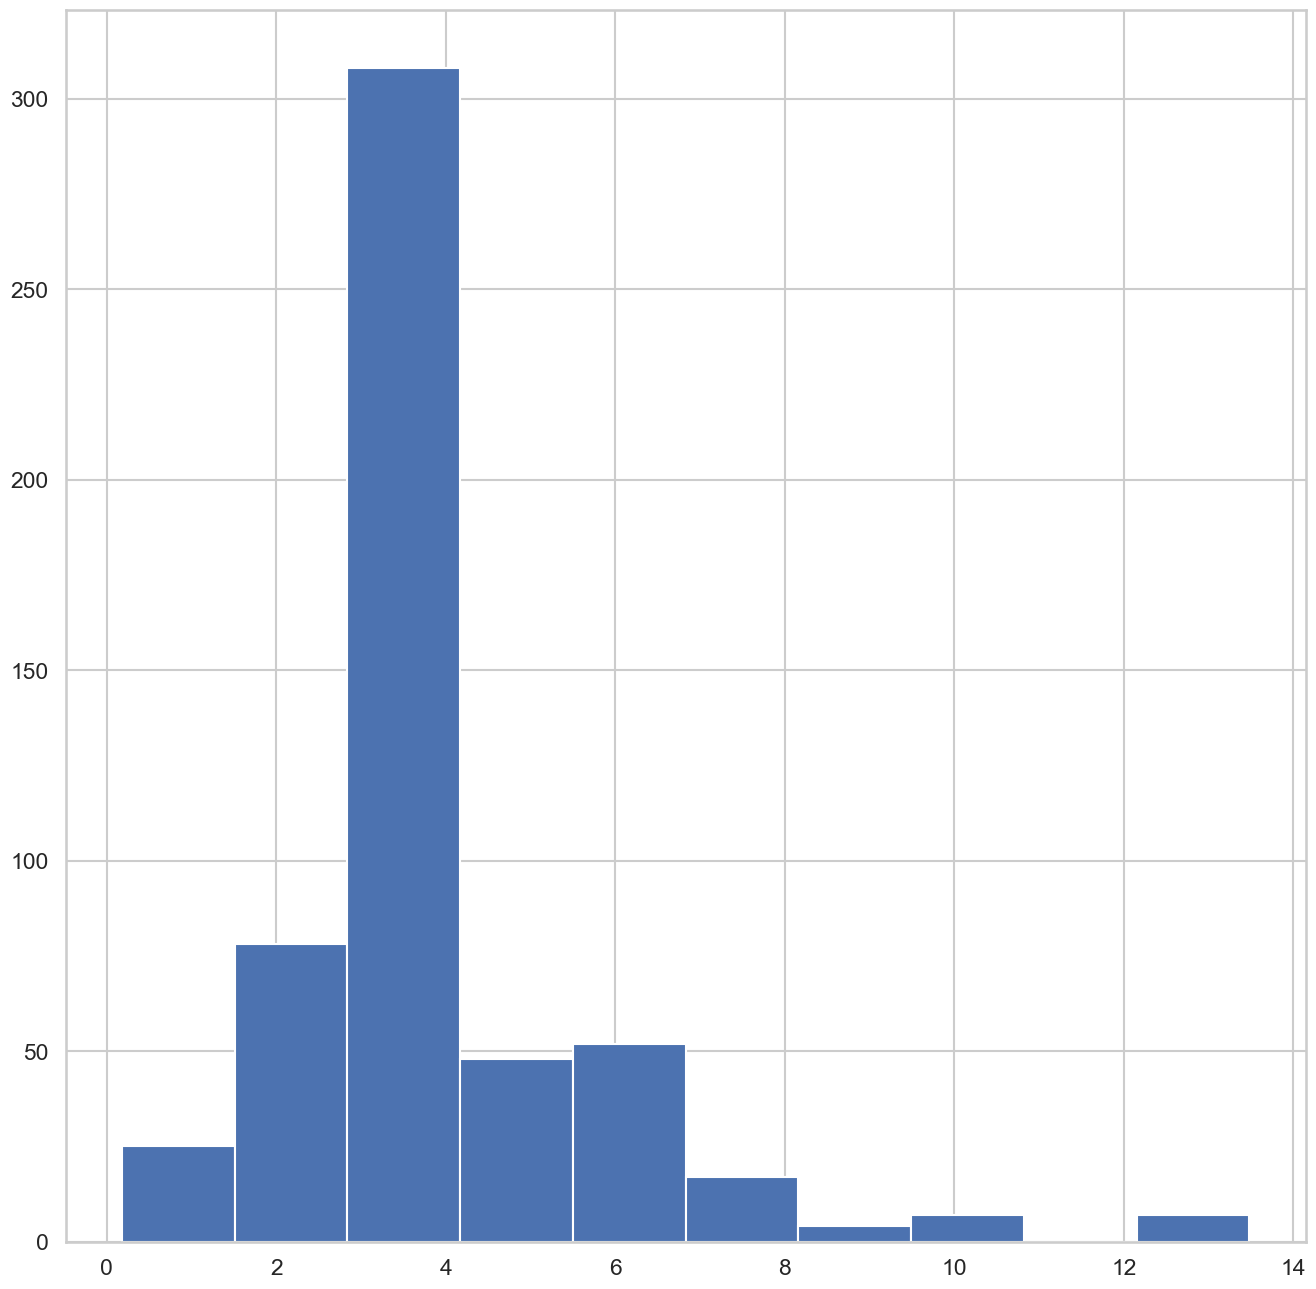

In [101]:
df4['Distance'].hist();

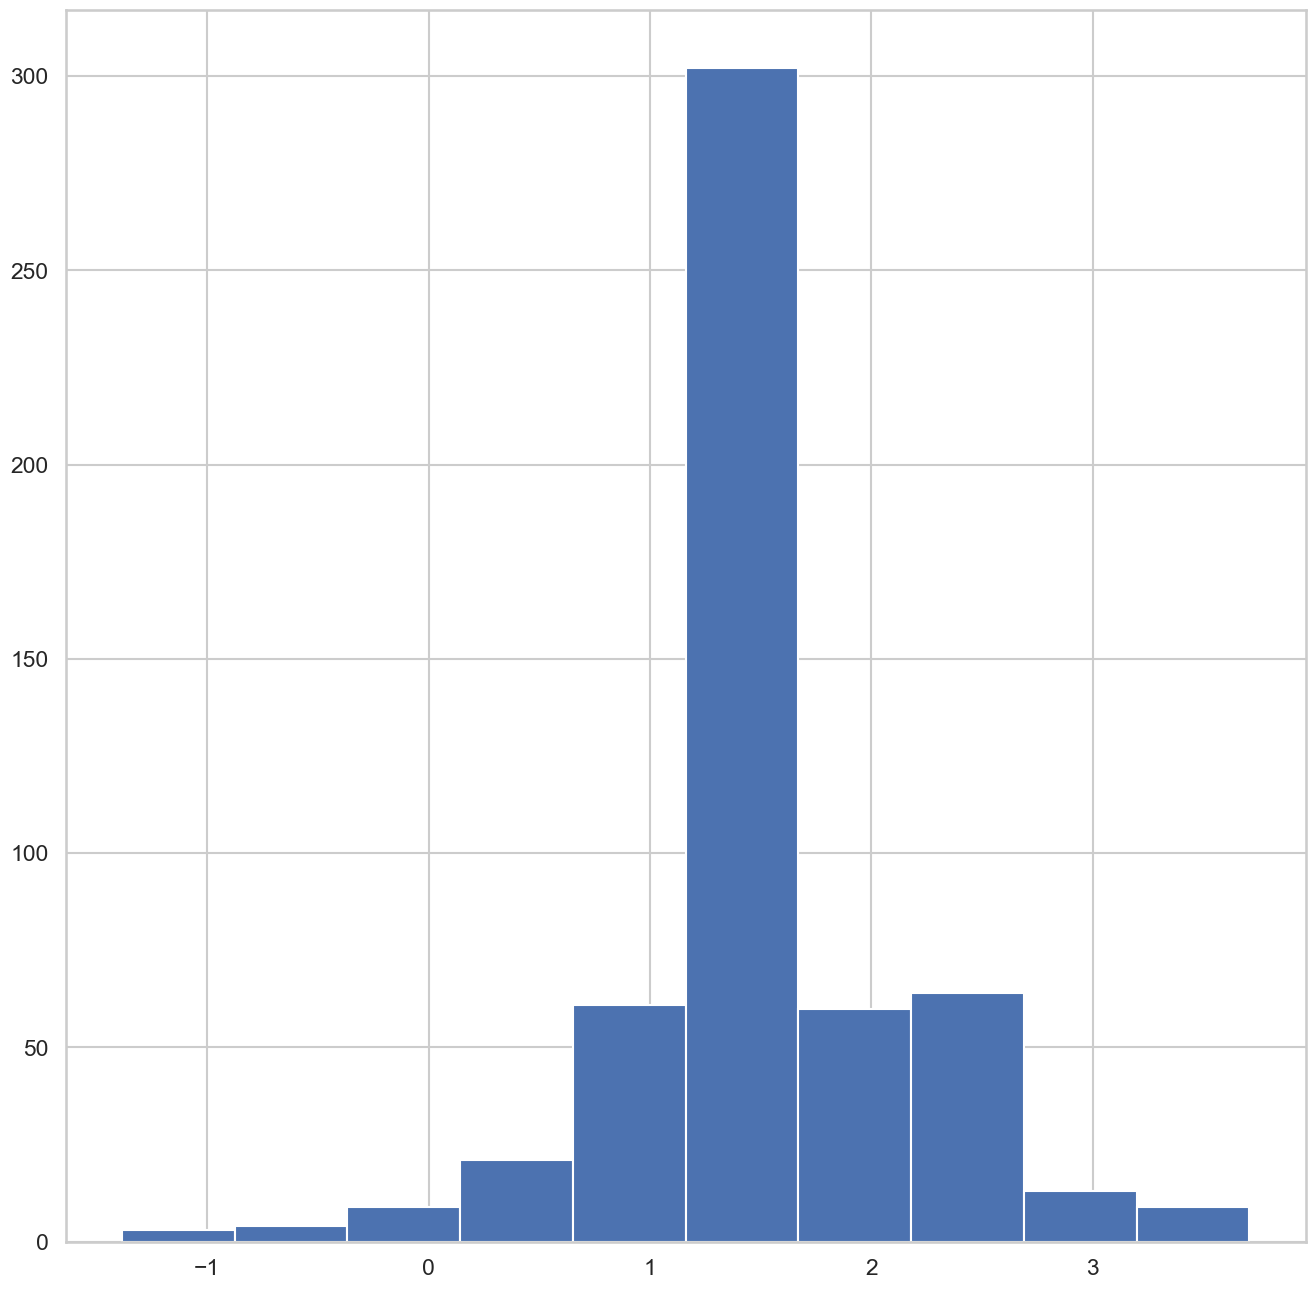

In [102]:
plt.hist(boxcox_dist);

In [103]:
normaltest(boxcox_dist)

NormaltestResult(statistic=41.33397839668633, pvalue=1.0578902965547721e-09)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [105]:
lr = LinearRegression()

In [106]:
y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

**Create Polynomial Features**

In [107]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [109]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [110]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [111]:
y_train_bc.shape

(382,)

In [112]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [113]:
from scipy.special import inv_boxcox

In [114]:
# code from above
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [115]:
inv_boxcox(boxcox_dist, lam)[:10]

array([3.1 , 6.21, 6.26, 3.1 , 3.1 , 3.1 , 3.1 , 3.1 , 3.1 , 3.1 ])

In [116]:
df4['Distance'].values[:10]

array([3.1 , 6.21, 6.26, 3.1 , 3.1 , 3.1 , 3.1 , 3.1 , 3.1 , 3.1 ])

In [117]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.9660622567216198

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [118]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

0.9999947398195219

In [119]:
normaltest(sqrt_dist)

NormaltestResult(statistic=96.52220932614105, pvalue=1.0976618095883766e-21)

## Train / Test Models

In [120]:
mask = df4.dtypes == np.object
categorical_cols = df4.columns[mask]

In [121]:
# Determine how many extra columns would be created
import numpy as np
num_ohc_cols = (df4[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

0.0

In [122]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df4.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [123]:
# Column difference is as calculated above
data_ohc.shape[1] - df4.shape[1]

0

In [124]:
from sklearn.model_selection import train_test_split

y_col = 'Distance'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df4.columns if x != y_col]
X_data = df4[feature_cols]
y_data = df4[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [125]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

no enc  one-hot enc
train  0.033504     0.033504
test   0.052934     0.052934

In [127]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        0.052934
not_encoded - minmaxscaling          0.052934
not_encoded - maxabsscaling          0.052934
one_hot_encoded - standardscaling    0.052934
one_hot_encoded - minmaxscaling      0.052934
one_hot_encoded - maxabsscaling      0.052934
--------------------------------------------------------------------------------
not_encoded - standardscaling 0.05293355601625127
not_encoded - minmaxscaling 0.05293355601625249
not_encoded - maxabsscaling 0.05293355601625218
one_hot_encoded - standardscaling 0.05293355601625127
one_hot_encoded - minmaxscaling 0.05293355601625249
one_hot_encoded - maxabsscaling 0.05293355601625218


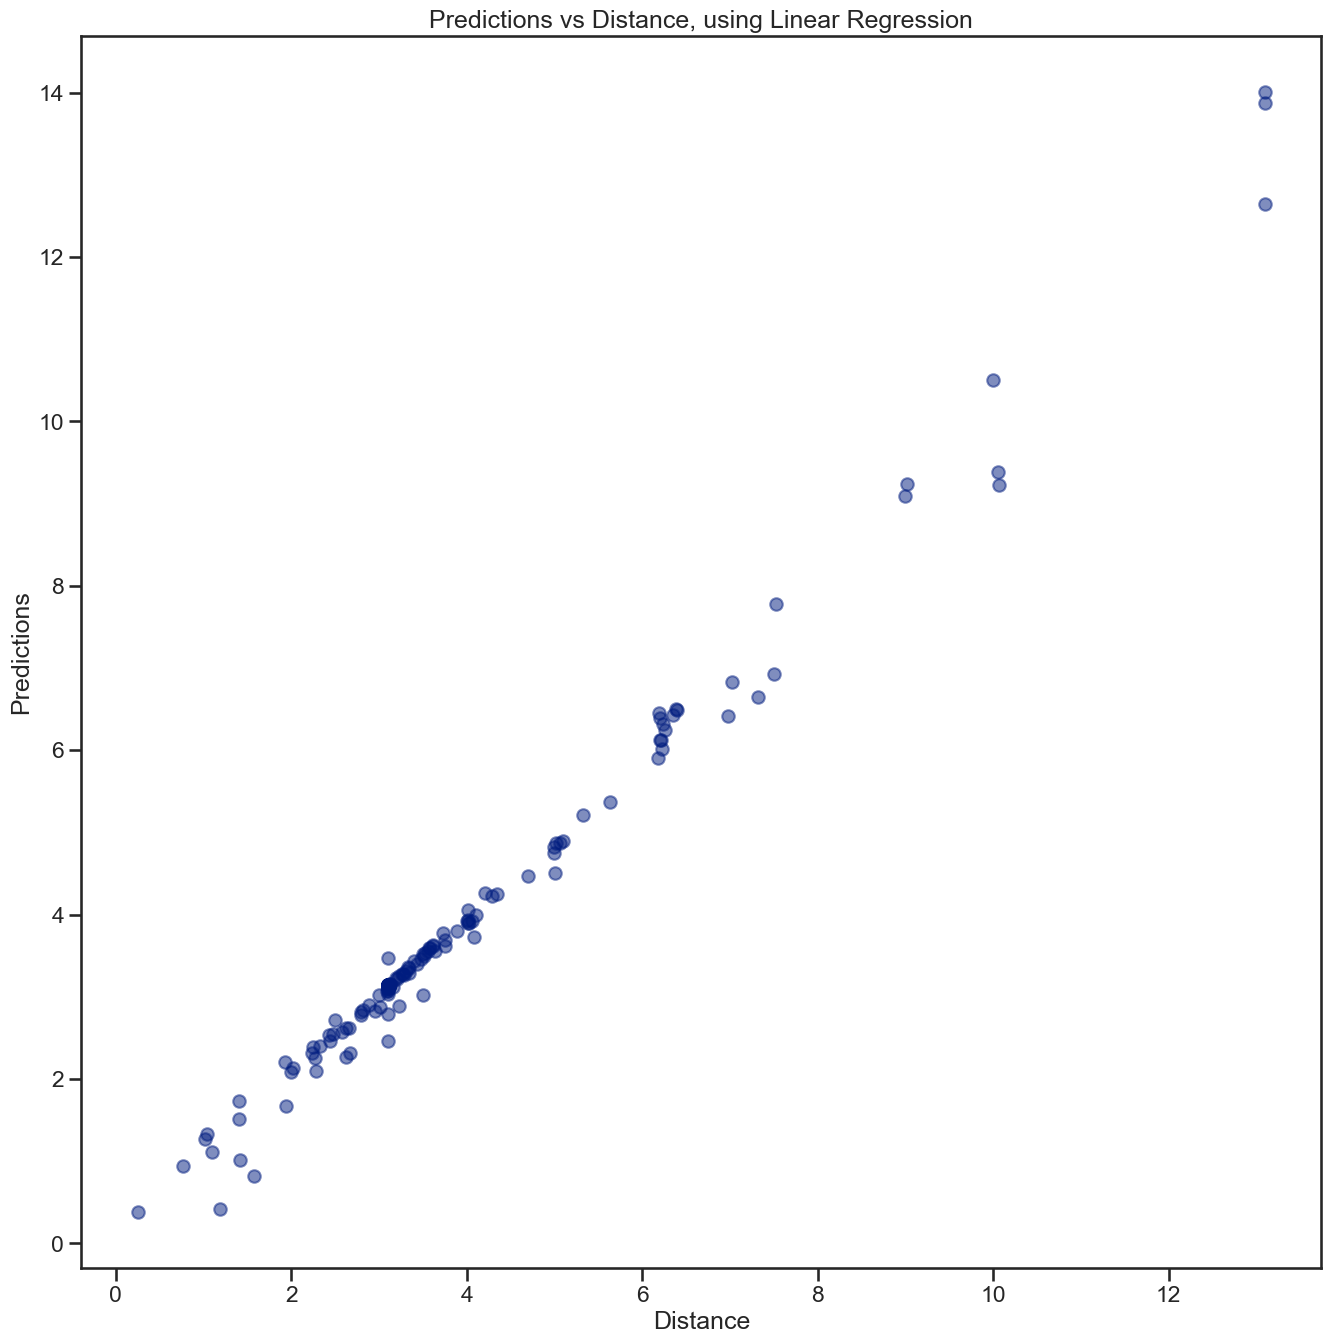

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Distance', 
       ylabel='Predictions',
       title='Predictions vs Distance, using Linear Regression');

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

In [130]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [131]:
# verify the shape of the array (rows by a single column)
X = df4.drop('Distance', axis=1)
y = df4.Distance

In [132]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [133]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  7  8 10 11 13 14] 364
Test index: [ 0  2  6  9 12 15 16 17 19 23] 182

Train index: [ 0  2  6  8  9 10 11 12 13 15] 364
Test index: [ 1  3  4  5  7 14 22 24 27 30] 182

Train index: [ 0  1  2  3  4  5  6  7  9 12] 364
Test index: [ 8 10 11 13 18 20 21 28 31 33] 182



In [134]:
s = StandardScaler()
lr = LinearRegression()

In [135]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [136]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [137]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [138]:
r2_score(y, predictions)

0.9877409209626627

In [139]:
np.mean(scores) # almost identical!

NameError: name 'scores' is not defined

In [140]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [141]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [142]:
list(zip(alphas,scores))

[(1e-09, 0.9877336714263311),
 (1e-08, 0.9877336706299908),
 (1e-07, 0.9877336802557168),
 (1e-06, 0.9877339437877238),
 (1e-05, 0.9877370008003111),
 (0.0001, 0.9877323859008204),
 (0.001, 0.9877151875805091),
 (0.01, 0.9877144941457939),
 (0.1, 0.9772679328462762),
 (1.0, 0.7048796386016412)]

In [143]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([ 9.44579210e-04,  1.30553362e-03, -3.58559483e-01, -1.19392448e-01,
       -6.84319597e-04,  1.06697708e-04, -1.10682834e-02])

In [144]:
Lasso(alpha=1.0).fit(X, y).coef_

array([ 0.00283818,  0.00030563, -0.        ,  0.        ,  0.        ,
        0.00024877,  0.        ])

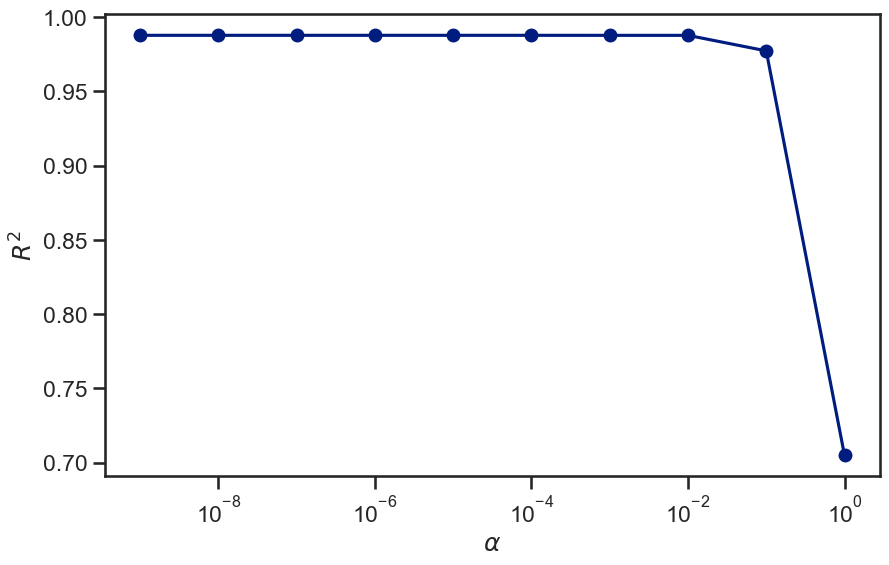

In [145]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [146]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

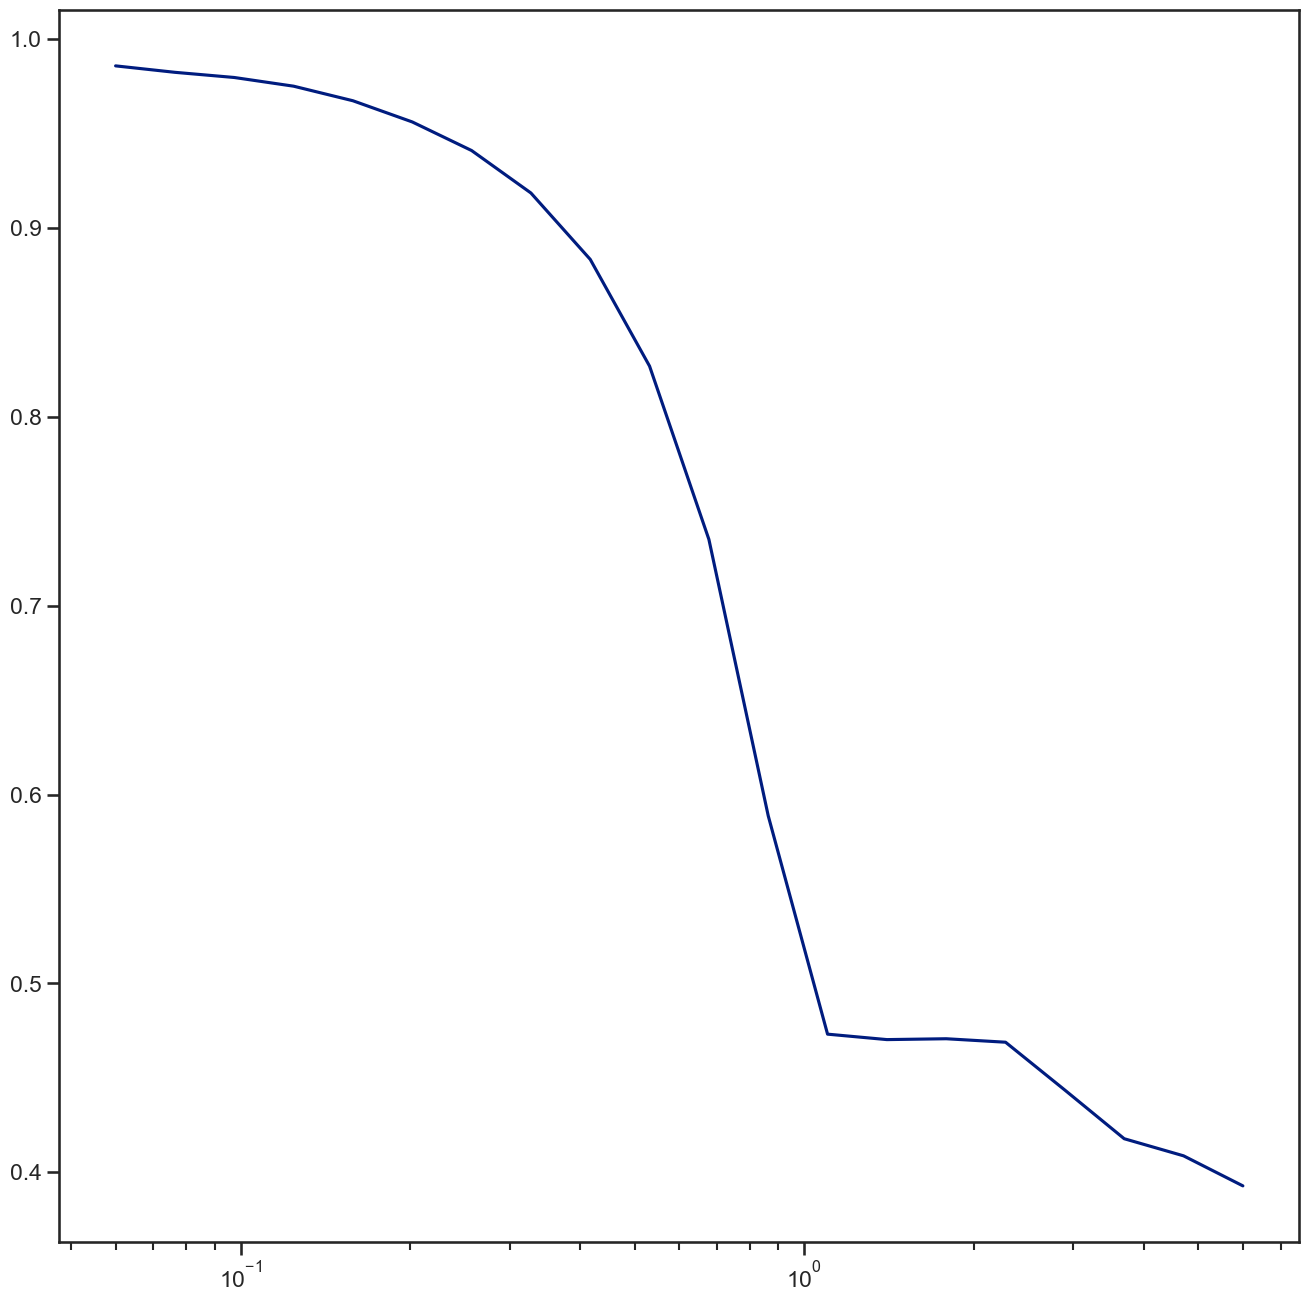

In [147]:
plt.semilogx(alphas, scores);

In [148]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9976816619700838

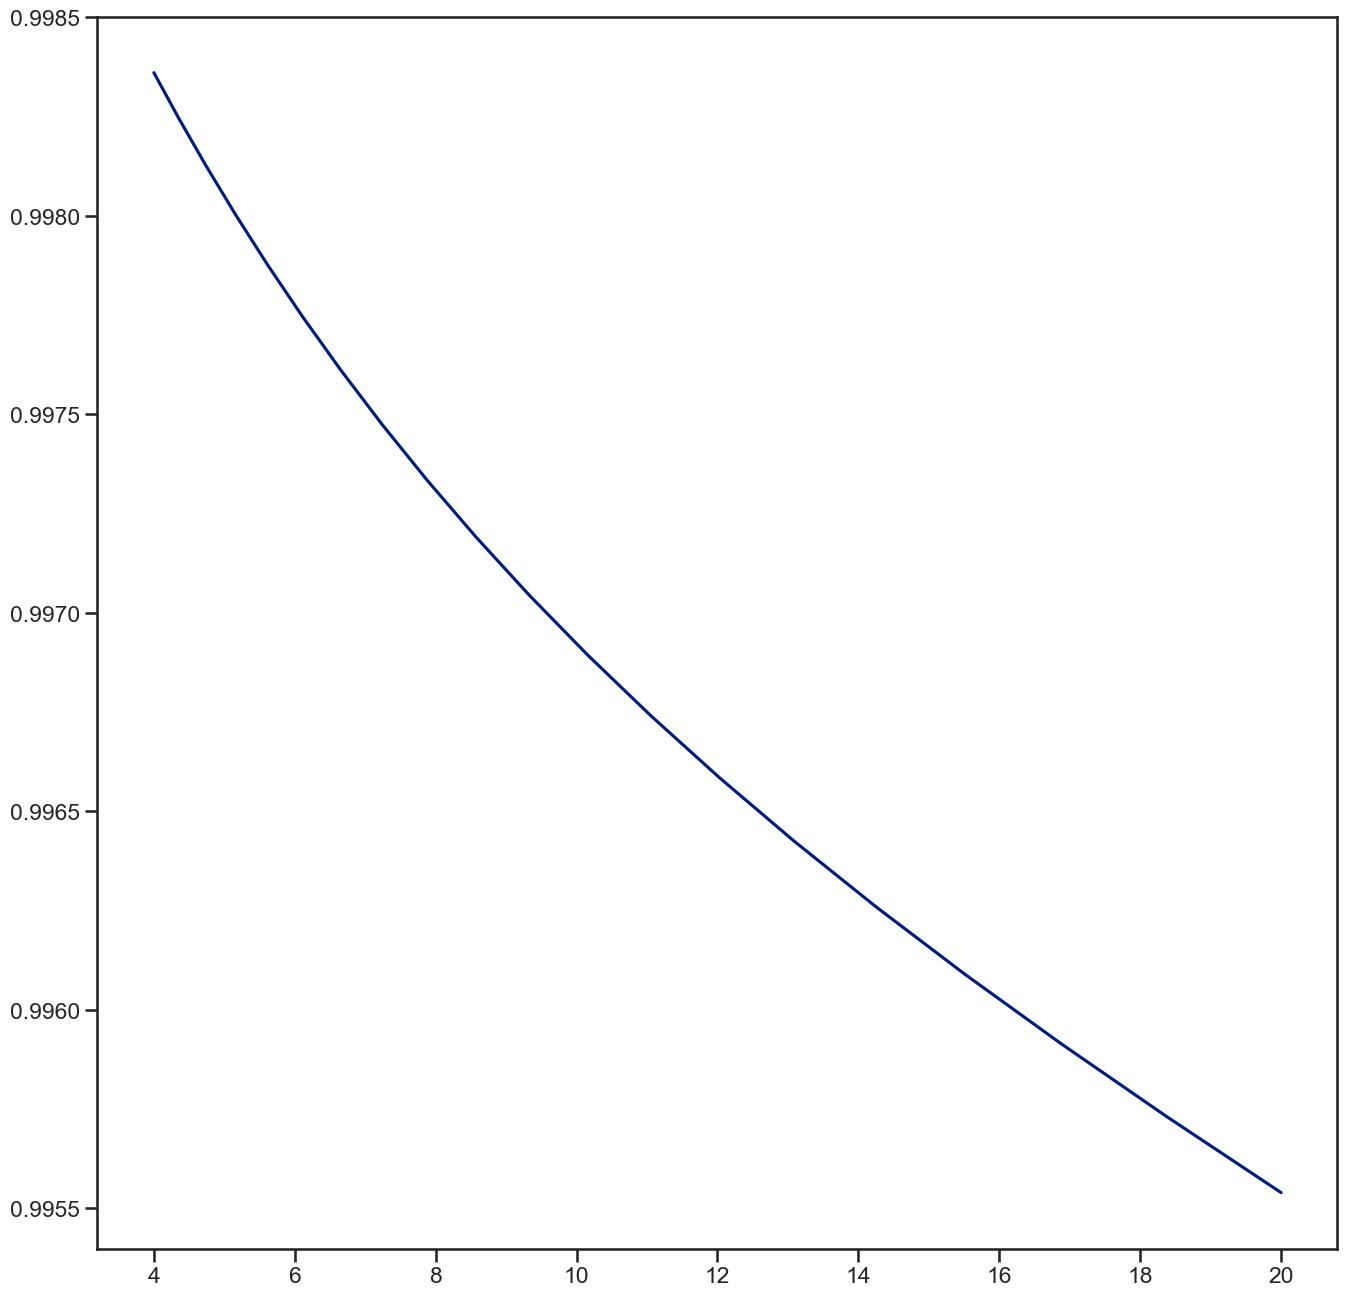

In [149]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [150]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9976816619700838

In [151]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [152]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [153]:
col_names_dict

{0: 'Calories_Burned',
 1: 'Workout_Time',
 2: 'Avg_Pace',
 3: 'Avg_Speed',
 4: 'Avg_Heart_Rate',
 5: 'Steps',
 6: 'Minutes'}

In [154]:
df_importances.sort_values(by=1)

0         1
3      x2 -0.136989
16  x1 x2 -0.109145
10  x0 x2 -0.024555
25  x2 x6 -0.000117
0       1  0.000000
21   x2^2 -0.000000
22  x2 x3  0.000000
23  x2 x4 -0.000000
24  x2 x5 -0.000000
26   x3^2 -0.000000
27  x3 x4  0.000000
28  x3 x5  0.000000
29  x3 x6  0.000000
30   x4^2 -0.000000
31  x4 x5 -0.000000
32  x4 x6 -0.000000
33   x5^2  0.000000
20  x1 x6  0.000000
19  x1 x5  0.000000
17  x1 x3  0.000000
34  x5 x6  0.000000
15   x1^2  0.000000
14  x0 x6  0.000000
13  x0 x5  0.000000
12  x0 x4 -0.000000
11  x0 x3  0.000000
9   x0 x1  0.000000
8    x0^2  0.000000
5      x4  0.000000
18  x1 x4 -0.000000
35   x6^2  0.000000
7      x6  0.078275
4      x3  0.154322
6      x5  0.192647
1      x0  0.197366
2      x1  1.630118

In [155]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [156]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [157]:
grid.best_score_, grid.best_params_

(0.9982614570782896,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 4.0})

In [158]:
y_predict = grid.predict(X)

In [159]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.9993853976932662

In [160]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  2.39328490e-01,  8.20558838e-01, -1.70108837e-01,
        1.85748216e-01, -1.70188183e-03,  2.89504892e-01,  8.20544121e-01,
        3.88872651e-02, -2.01611811e-02, -8.17139820e-03,  2.69212239e-02,
        1.71739708e-02, -7.49159966e-02, -2.01496895e-02,  1.53745804e-02,
       -4.67577165e-03,  2.23238504e-02,  1.78934338e-02, -1.26026295e-02,
        1.53671968e-02,  4.12542594e-03, -3.53156773e-03,  3.25185569e-02,
       -3.32368304e-02, -4.69908215e-03, -2.18120737e-03,  4.81133558e-02,
        8.17378636e-02,  2.23462295e-02, -2.57225837e-04, -5.23672973e-02,
        1.78536926e-02,  5.93899778e-02, -1.26307408e-02,  1.53598194e-02])

In [161]:
grid.cv_results_

{'mean_fit_time': array([0.00383774, 0.00183622, 0.00184902, 0.00172599, 0.00169269,
        0.00177439, 0.00350157, 0.00182645, 0.0018518 , 0.00187858,
        0.00169937, 0.00179156, 0.00318837, 0.00180809, 0.0025901 ,
        0.00184425, 0.00276971, 0.00191434, 0.00174435, 0.00218574,
        0.00253598, 0.00327031, 0.00177415, 0.0032053 , 0.00188891,
        0.00175881, 0.00175103, 0.00183733, 0.0023013 , 0.00252867,
        0.02130254, 0.02308202, 0.02436105, 0.01283534, 0.01443473,
        0.01325838, 0.01322126, 0.01383138, 0.01543204, 0.01593216,
        0.01610883, 0.01411478, 0.01953729, 0.01299969, 0.0132002 ,
        0.01311159, 0.03036888, 0.05231762, 0.01285799, 0.01297935,
        0.01428636, 0.01457063, 0.05398671, 0.01275269, 0.01468293,
        0.01493049, 0.01507608, 0.01291998, 0.01273203, 0.01296369,
        0.17482599, 0.15858722, 0.16326594, 0.14951809, 0.1236213 ,
        0.22711643, 0.12568005, 0.12648884, 0.15966145, 0.12938603,
        0.12866481, 0.14729365,

NameError: name 'X_real' is not defined

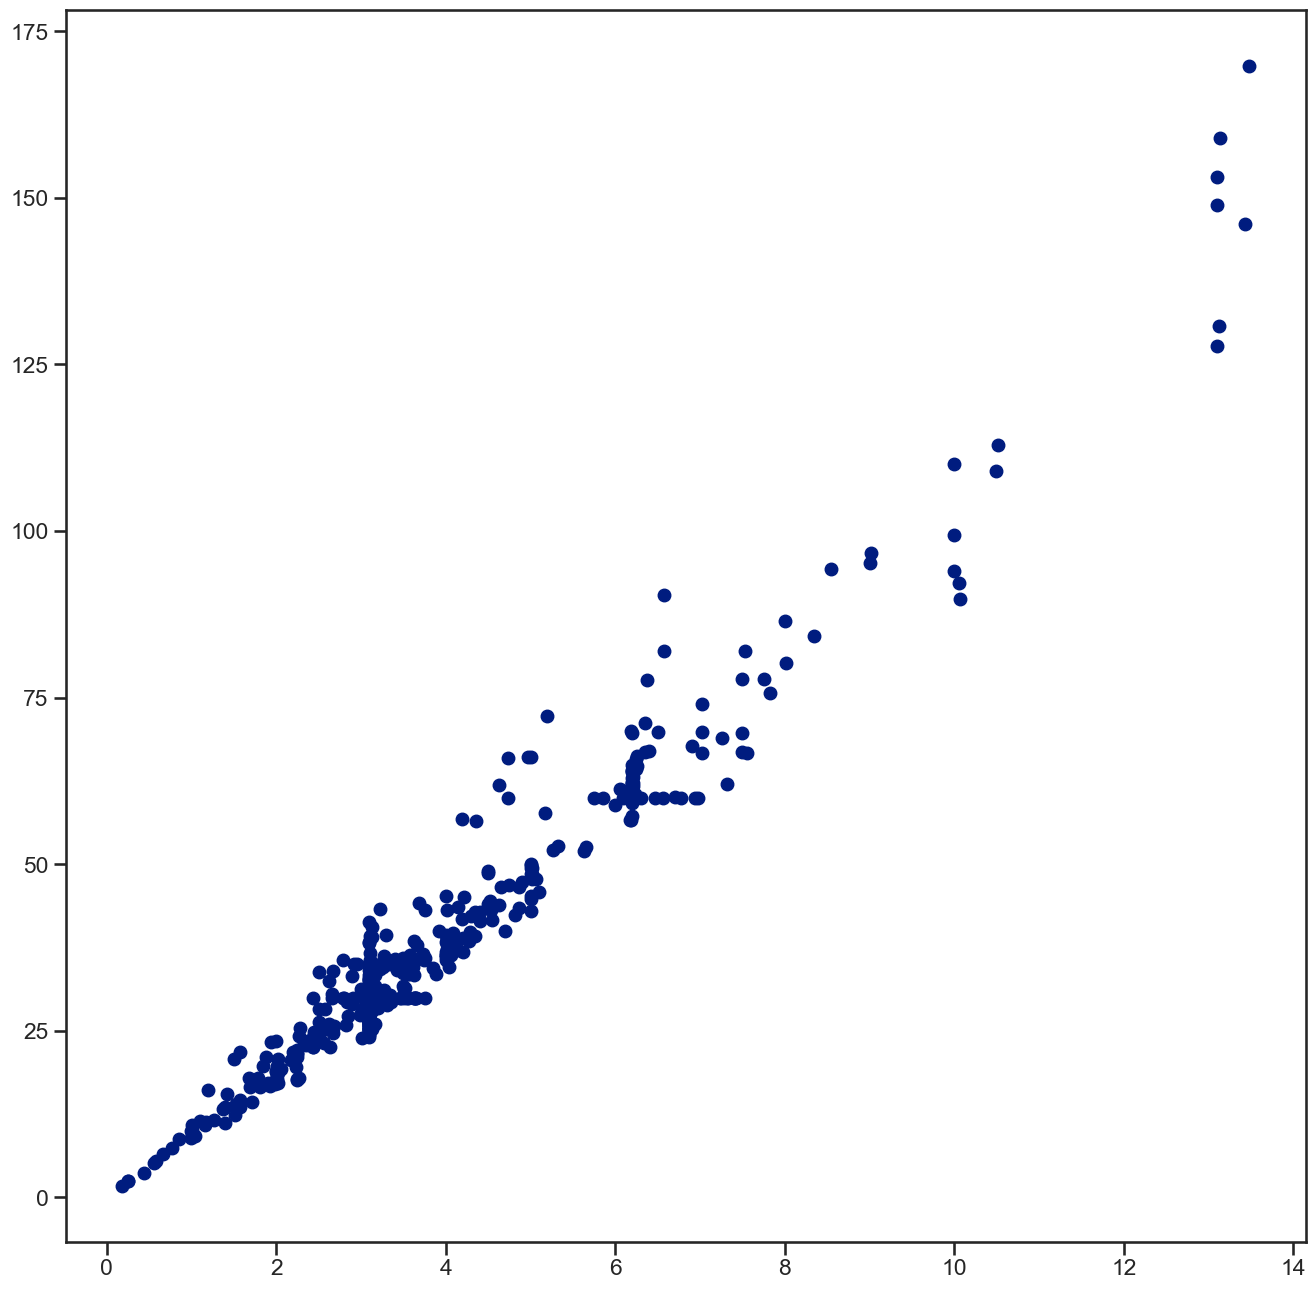

In [163]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = df4[['Distance']]
Y_data = df4['Minutes']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


NameError: name 'X_real' is not defined

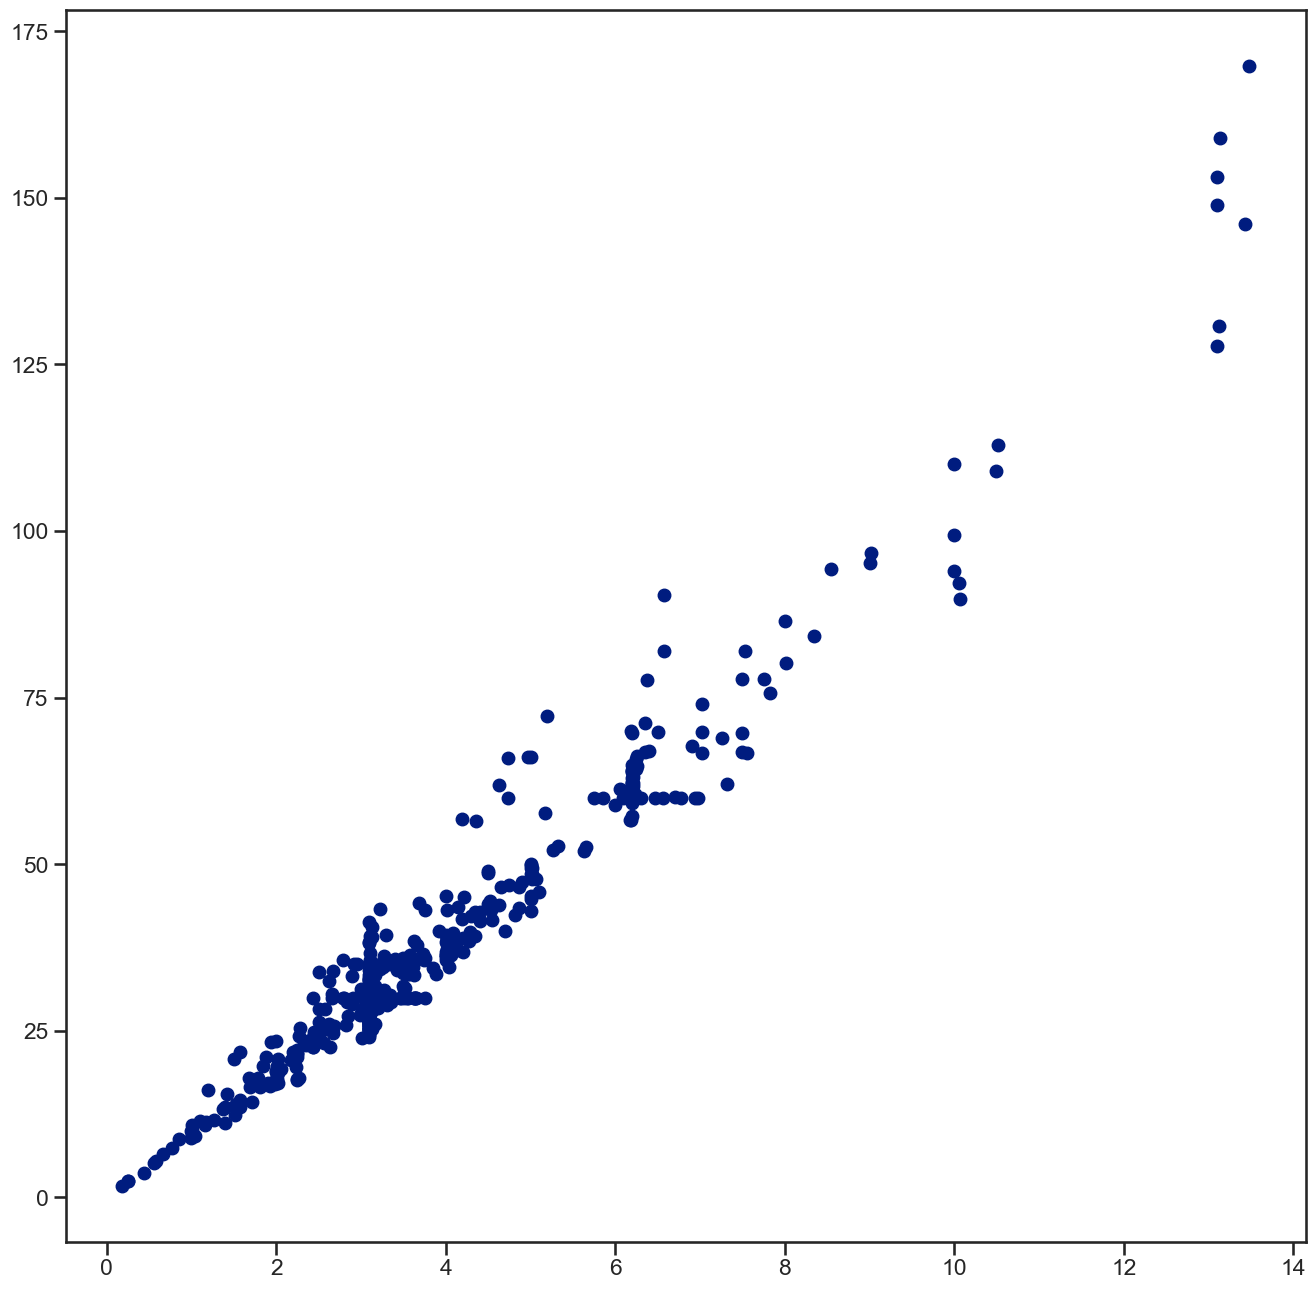

In [165]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [ ]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

NameError: name 'rr' is not defined

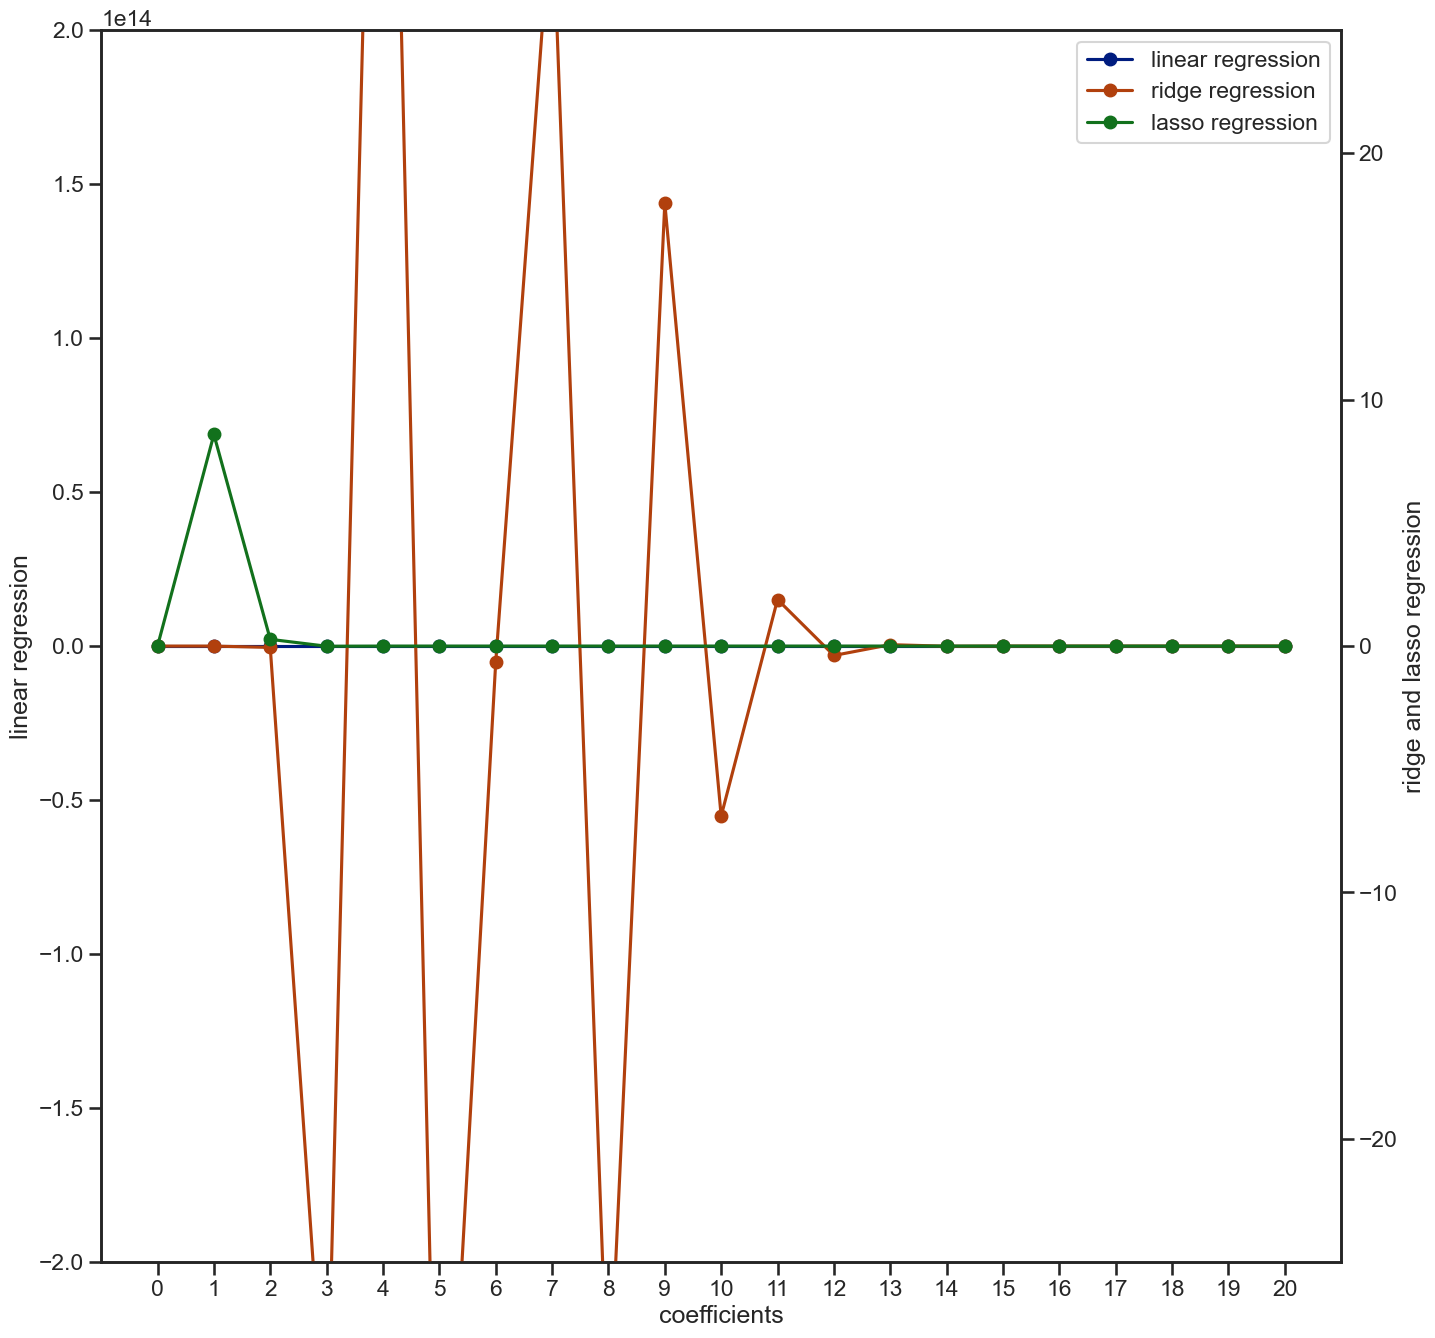

In [166]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [167]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [168]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.23007293629684755


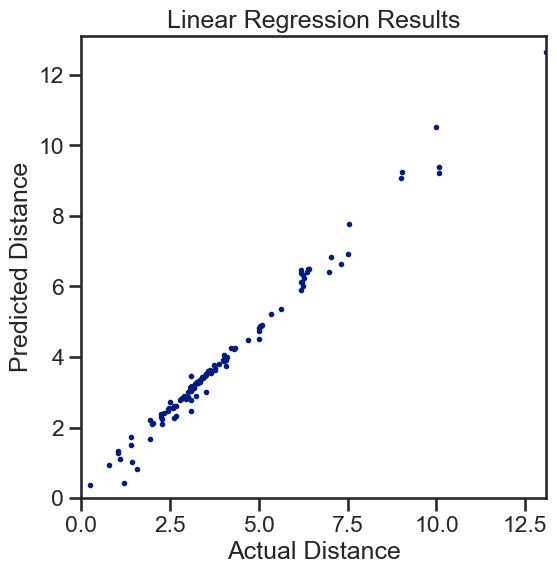

In [169]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [170]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.23007293629684755


In [171]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.005 0.23001778161824551


In [172]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

TypeError: max_iter must be an instance of int, not float.

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 0.20093891394830338


In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

RMSE
Linear      0.199674
Ridge       0.199939
Lasso       0.200041
ElasticNet  0.200939

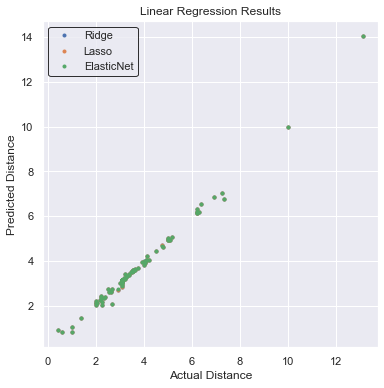

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       title='Linear Regression Results');

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD
Linear      0.199674  8.735228e+16
Ridge       0.199939  2.163497e+16
Lasso       0.200041  5.655760e+16
ElasticNet  0.200939  2.797139e+16

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD  RMSE-SGD-learningrate
Linear      0.199674  8.735228e+16               0.624582
Ridge       0.199939  2.163497e+16               8.961790
Lasso       0.200041  5.655760e+16               0.510684
ElasticNet  0.200939  2.797139e+16               0.342216

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD  RMSE-SGD-learningrate  RMSE-SGD-scaled
Linear      0.199674  8.735228e+16               0.624582         0.266383
Ridge       0.199939  2.163497e+16               8.961790         1.315662
Lasso       0.200041  5.655760e+16               0.510684         0.264782
ElasticNet  0.200939  2.797139e+16               0.342216         0.269576

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD  RMSE-SGD-learningrate  RMSE-SGD-scaled
Linear      0.199674  8.735228e+16               0.624582         0.263918
Ridge       0.199939  2.163497e+16               8.961790         1.309901
Lasso       0.200041  5.655760e+16               0.510684         0.265314
ElasticNet  0.200939  2.797139e+16               0.342216         0.267694

### Train Test Split

In [ ]:
df4.head()

Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
0            419.0      3.10        1851.0      9.95       6.03   
1            814.0      6.20        3430.0      9.22       6.51   
2            656.0      5.00        2989.0      9.96       6.03   
3            391.0      3.11        1802.0      9.66       6.21   
4            313.0      2.35        1376.0      9.74       6.16   

   Avg_Heart_Rate   Steps  Minutes  
0           149.0  4903.0    30.85  
1           149.0  9155.0    57.17  
2           146.0  7917.0    49.82  
3           140.0  4782.0    30.03  
4           156.0  3622.0    22.93

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df4[['Distance']], df4['Avg_Pace'], random_state=0)

In [ ]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

-0.05360013051061463


### Regression

<AxesSubplot:xlabel='Distance', ylabel='Avg_Pace'>

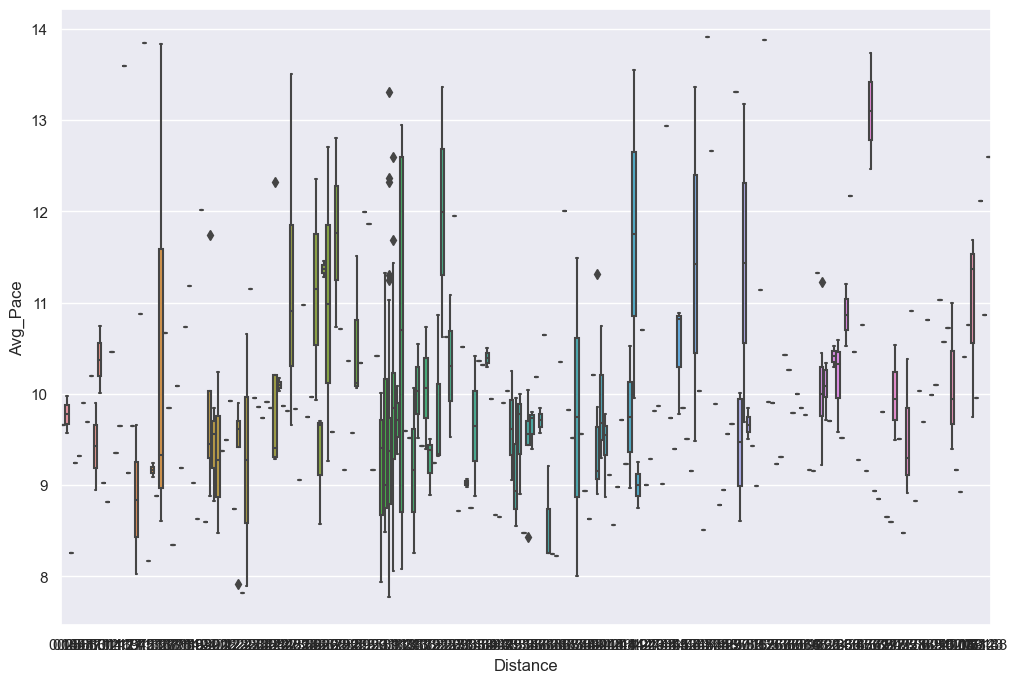

In [173]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Distance', y='Avg_Pace', data=df4)

In [174]:
dummy_variables = pd.get_dummies(df4[['Distance','Avg_Pace','Calories_Burned']], drop_first=True)
dummy_variables.shape
(2394, 57)
dummy_variables.head()

Distance  Avg_Pace  Calories_Burned
0      3.10     11.25            440.0
1      6.21     10.34            762.0
2      6.26     10.33            769.0
3      3.10      9.70            415.0
4      3.10      8.91            403.0

In [175]:
from sklearn.preprocessing import MinMaxScaler 

In [176]:
num_features = df4[['Distance', 'Avg_Pace', 'Workout_Time', 'Calories_Burned']]
sc = MinMaxScaler()
num_features = sc.fit_transform(num_features)

In [177]:
cat_features = dummy_variables.values
data = np.concatenate((cat_features, num_features), axis=1)
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1]
print(X.shape)
print(y.shape)
(2394, 60)
(2394,)

(546, 6)
(546,)


(2394,)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [179]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

R-squared score (training):1.000
R-squared score (test): 1.000


In [180]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,
'learning_rate': 0.02, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.995


## Data standardization

**Standardizing** data refers to transforming each variable so that it more closely follows a **standard** normal distribution, with mean 0 and standard deviation 1.

The [`StandardScaler`](http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) object in SciKit Learn can do this.

**Generate X and y**:

In [181]:
y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

**Import, fit, and transform using `StandardScaler`**

In [182]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

### Coefficients with and without scaling

In [183]:
lr = LinearRegression()

y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

In [184]:
lr.fit(X, y)
print(lr.coef_) # min = -18

[ 9.46748800e-04  2.61321255e-02 -3.57204664e-01 -1.17474450e-01
 -6.91888373e-04  1.06899835e-04 -1.50072195e+00]


In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
s = StandardScaler()
X_ss = s.fit_transform(X)

In [187]:
lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients now "on the same scale"

[ 2.46744850e-01  3.36459504e+01 -3.90187610e-01 -7.40034203e-02
 -6.80648890e-03  3.55224713e-01 -3.22038382e+01]


In [188]:
### BEGIN SOLUTION

# Part 1

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 0.001:", r2_score(y_pred, y_test))


# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())
### END SOLUTION

r2 score for alpha = 0.001: 0.9999398682336252
r2 score for Linear Regression: 1.0
Magnitude of Lasso coefficients: 0.13046820428636274
Number of coeffients not equal to 0 for Lasso: 1
Magnitude of Linear Regression coefficients: 0.1314682042863628
Number of coeffients not equal to 0 for Linear Regression: 6


## L1 vs. L2 Regularization

As mentioned in the deck: `Lasso` and `Ridge` regression have the same syntax in SciKit Learn.
[`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
Now we're going to compare the results from Ridge vs. Lasso regression:

[`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [189]:
from sklearn.linear_model import Ridge

In [190]:
### BEGIN SOLUTION
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_
### END SOLUTION

array([ 1.43854602e-06, -1.99362374e-07,  1.31462343e-01,  1.43855954e-06,
       -1.99350036e-07,  2.97284744e-06])

In [191]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

0.1314685919234253
0.13046820428636274
6
1


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, 
                                                    random_state=72018)

In [193]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

0.9836393610357307

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [195]:
s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_pred_s, y_test)

0.9836393610357302

## Pairplot

In [198]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
#from imblearn.datasets import make_imbalance
#from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier, XGBRegressor

In [199]:
run_num = df4.select_dtypes(include = ['float64', 'int64'])
run_num_corr = run_num.corr()['Distance'][:-1]
top_features = run_num_corr[abs(run_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 4 strongly correlated values with SalePrice:
Distance           1.000000
Steps              0.978226
Workout_Time       0.977085
Calories_Burned    0.974623
Name: Distance, dtype: float64


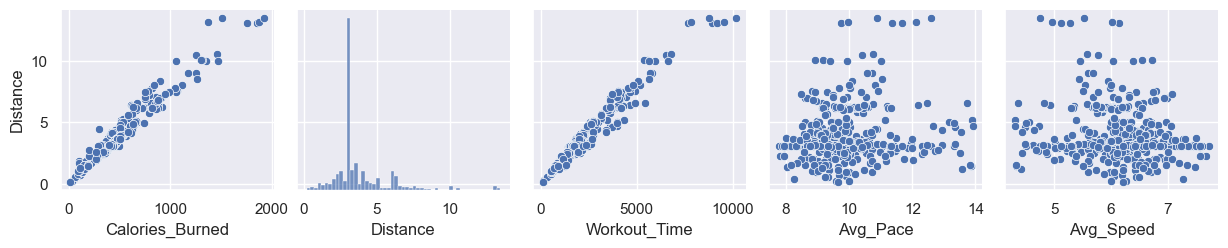

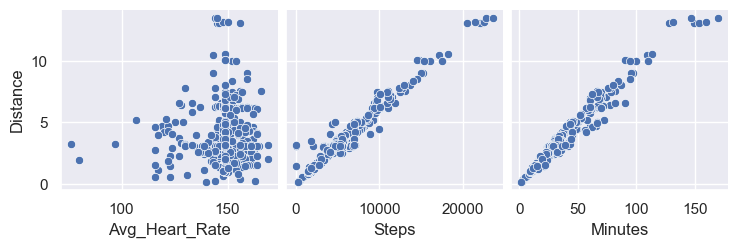

In [200]:
for i in range(0, len(run_num.columns), 5):
    sns.pairplot(data=run_num,
                x_vars=run_num.columns[i:i+5],
                y_vars=['Distance'])

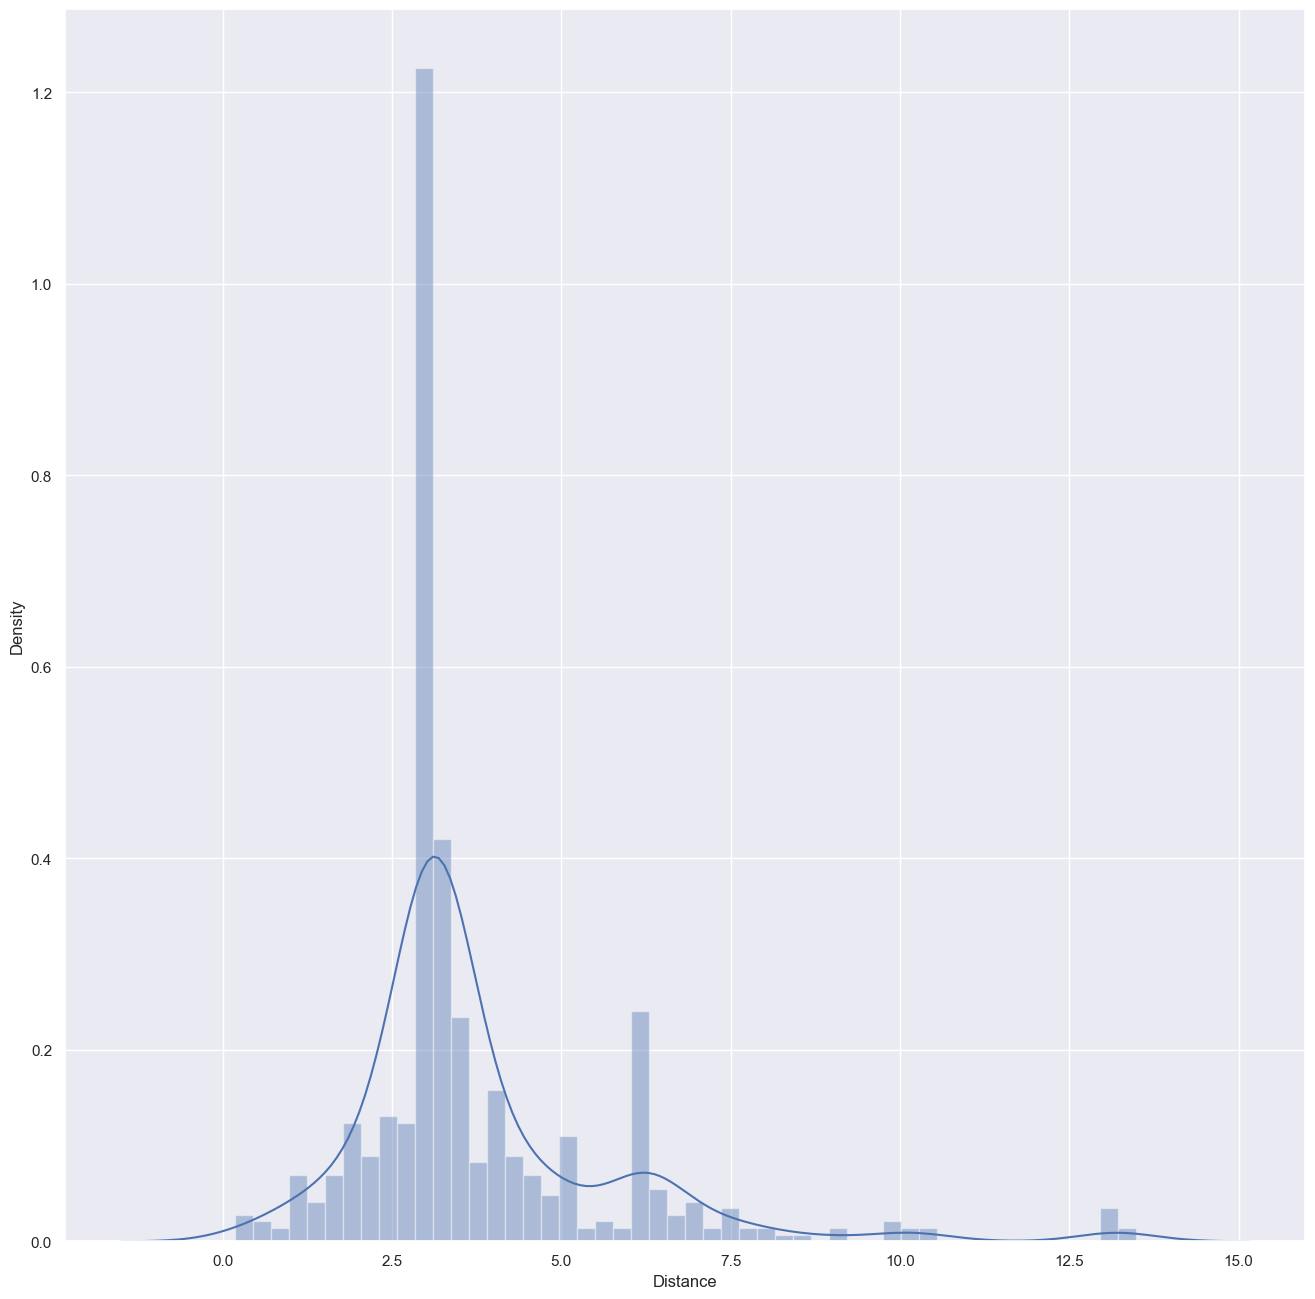

In [201]:
sp_untransformed = sns.distplot(df4['Distance'])

In [202]:
print("Skewness: %f" % df4['Distance'].skew())

Skewness: 2.119947


In [203]:
log_transformed = np.log(df4['Distance'])

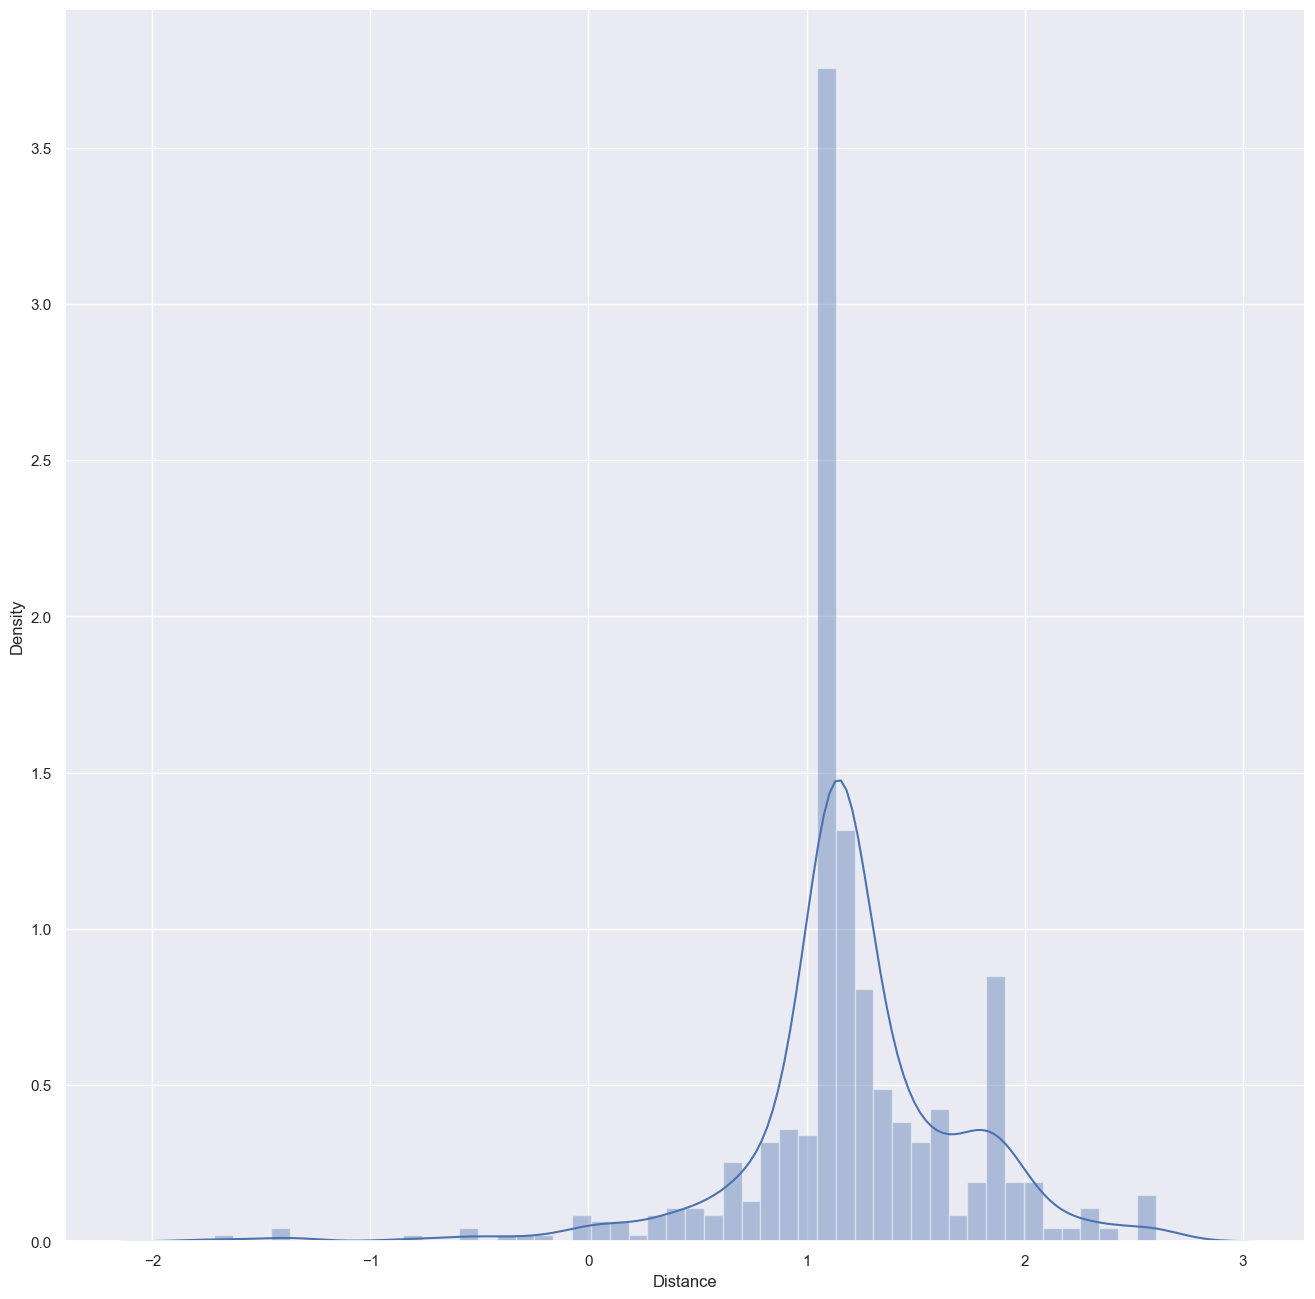

In [204]:
sp_transformed = sns.distplot(log_transformed)

In [205]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.980609


In [206]:
duplicate = df4[df4.duplicated(['Workout_Time'])]
duplicate

Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
38             414.0      3.10        1801.0      9.68       6.20   
39             414.0      3.10        1801.0      9.68       6.20   
41             859.0      6.56        3600.0      9.15       6.56   
42             632.0      4.74        3600.0     12.66       4.74   
51             820.0      6.09        3600.0      9.85       6.09   
..               ...       ...           ...       ...        ...   
591            414.0      3.10        1796.0      9.66       6.21   
601            412.0      3.00        1873.0     10.41       5.77   
602            440.0      3.09        2100.0     11.33       5.30   
619            398.0      3.01        1700.0      9.41       6.38   
694            283.0      2.24        1065.0      7.92       7.57   

     Avg_Heart_Rate   Steps  Minutes  
38            142.0  4616.0    30.02  
39            144.0  4599.0    30.02  
41            147.0  9295.0    60.00  
42            122.0  8146.0    60.00  
51            149.0  9545.0    60.00  
..              ...     ...      ...  
591           146.0  4806.0    29.93  
601           149.0  4940.0    31.22  
602           149.0  5497.0    35.00  
619           149.0  3209.0    28.33  
694           149.0  2891.0    17.75  

[106 rows x 8 columns]

In [207]:
df4.head()

Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
0            440.0      3.10        2093.0     11.25       5.33   
1            762.0      6.21        3854.0     10.34       5.80   
2            769.0      6.26        3884.0     10.33       5.81   
3            415.0      3.10        1804.0      9.70       6.19   
4            403.0      3.10        1658.0      8.91       6.73   

   Avg_Heart_Rate    Steps  Minutes  
0           134.0   3227.0    34.88  
1           153.0  10072.0    64.23  
2           147.0  10292.0    64.73  
3           150.0   4660.0    30.07  
4           145.0   4439.0    27.63

In [208]:
AHR0 = df4[['Avg_Heart_Rate']] < 0.1
AHR = df4[['Avg_Heart_Rate']].mean().round(2)
AHR

Avg_Heart_Rate    148.73
dtype: float64

In [209]:
X = df4.drop('Distance',axis=1)
y = df4.Distance
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [210]:
y_train.value_counts()

3.10    114
3.11     17
6.20     16
4.00      8
5.00      6
       ... 
1.88      1
7.50      1
3.43      1
4.52      1
0.25      1
Name: Distance, Length: 190, dtype: int64

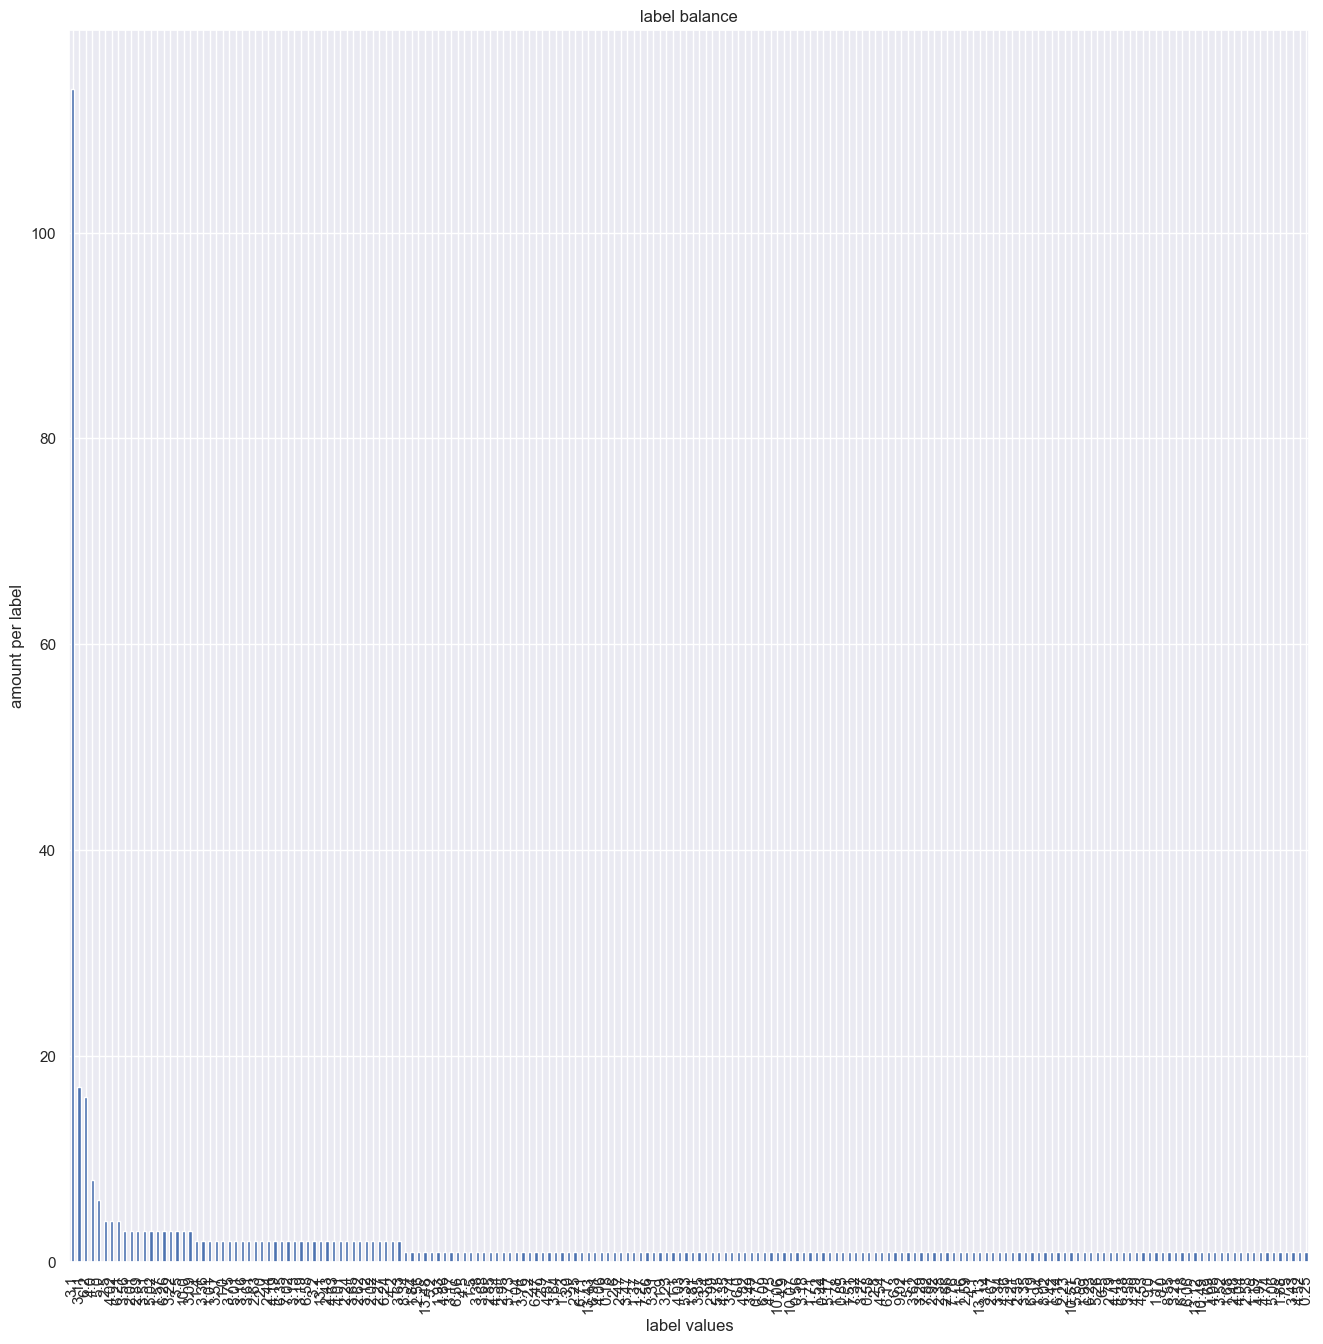

In [211]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

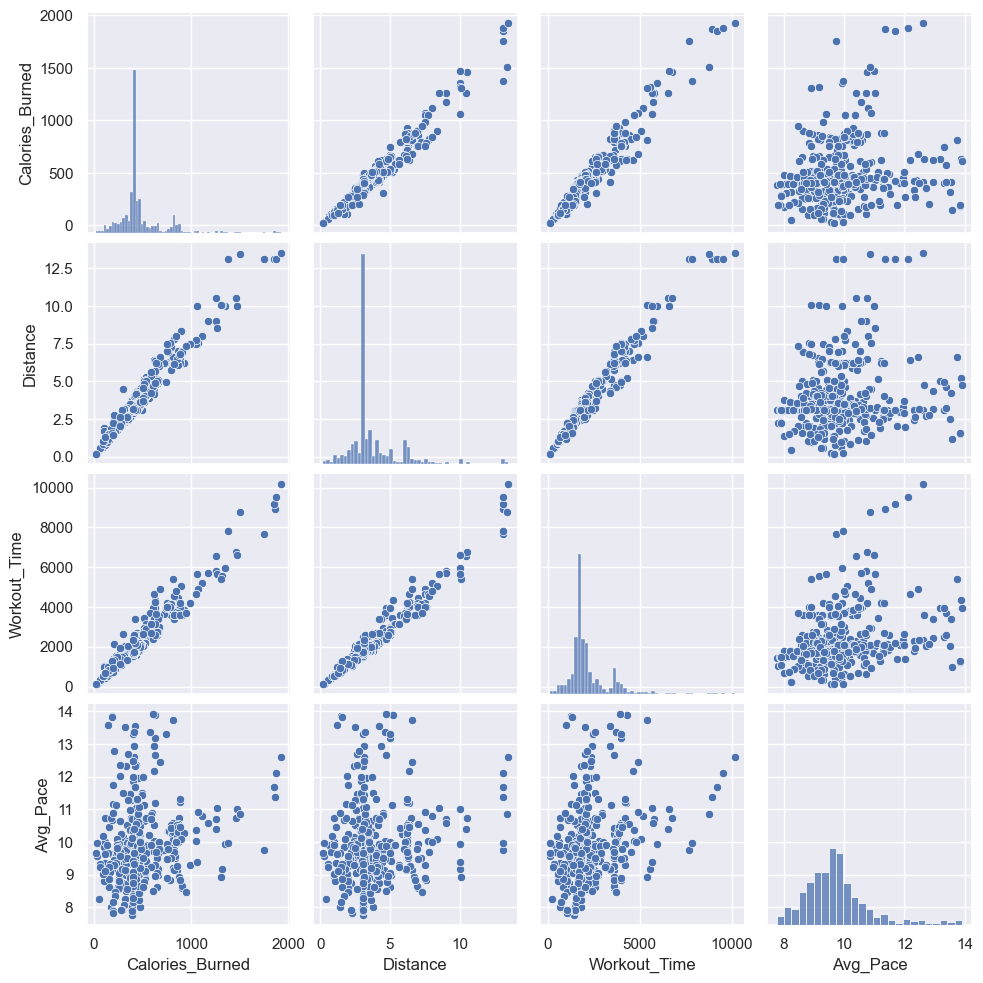

In [212]:
sns.pairplot(df4, vars = df4.columns[0:4])

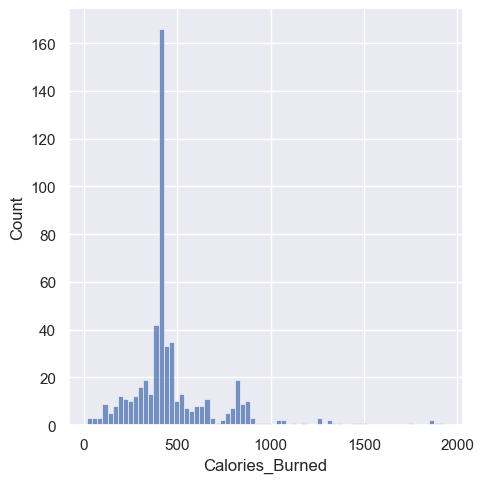

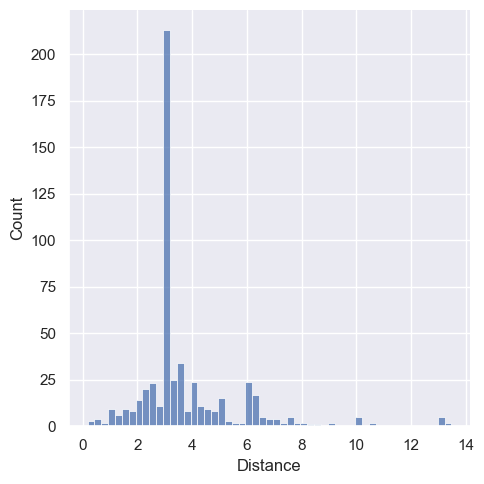

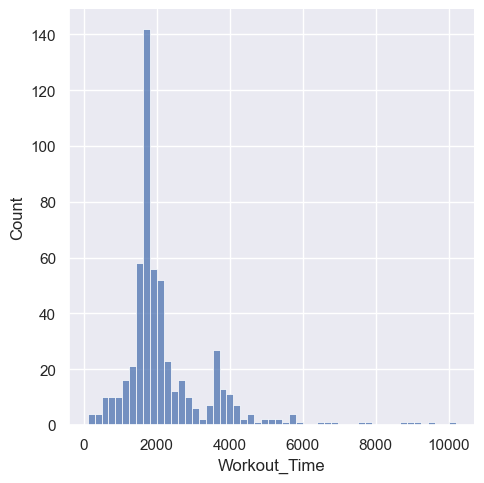

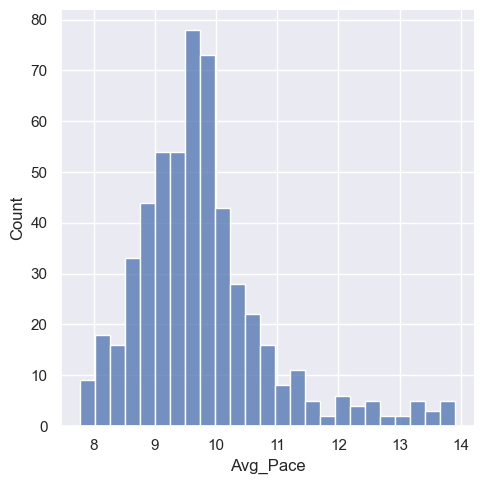

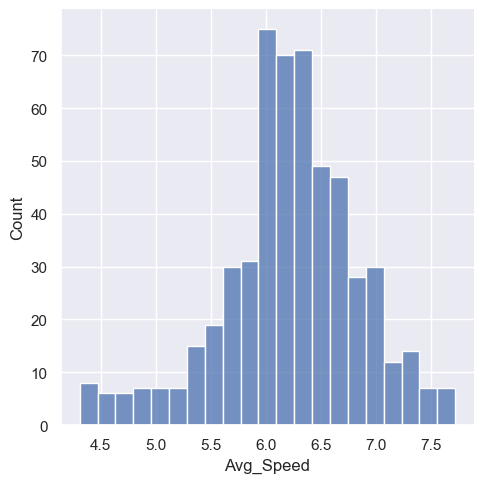

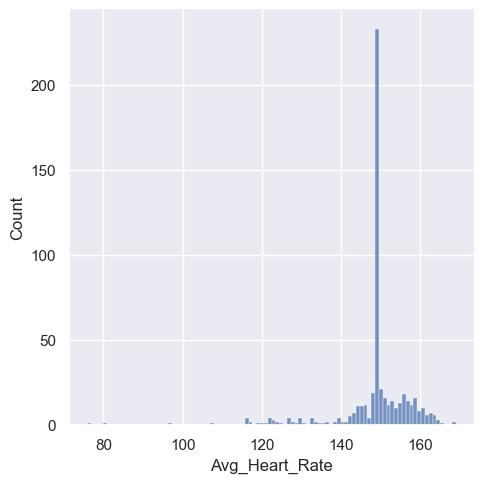

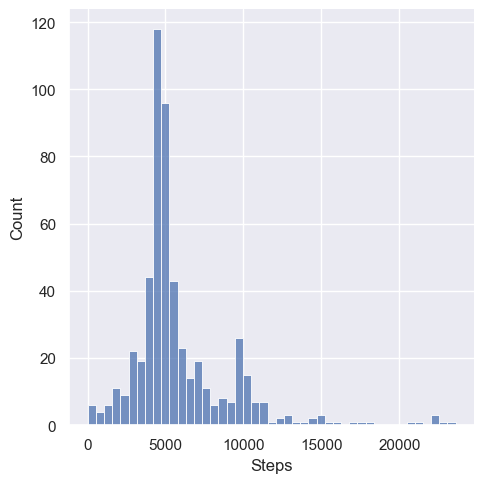

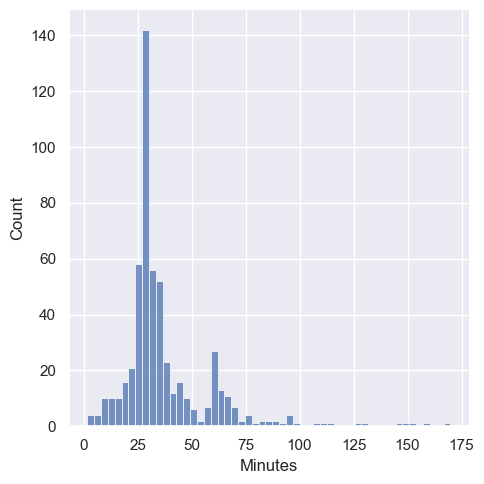

In [215]:
for column in df4:
    sns.displot(x=column, data=df4)

In [216]:
df4.columns

Index(['Calories_Burned', 'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed',
       'Avg_Heart_Rate', 'Steps', 'Minutes'],
      dtype='object')

In [217]:
# Convert x column to numpy array
X = df4.loc[:, ['Calories_Burned']].values

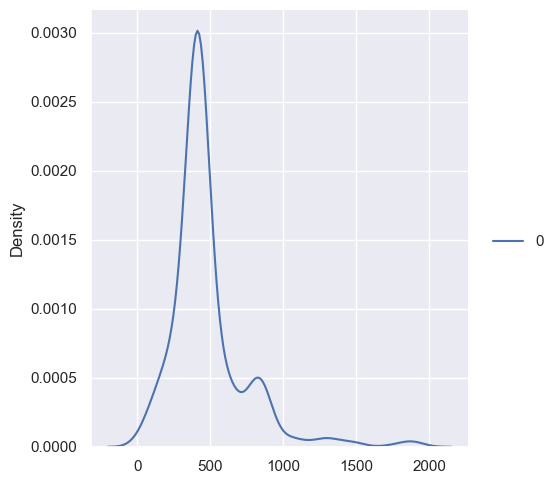

In [218]:
sns.displot(X, kind='kde')

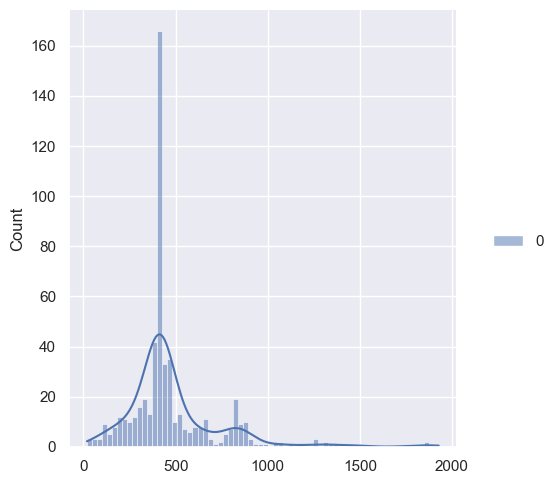

In [219]:
sns.displot(X, kde=True)

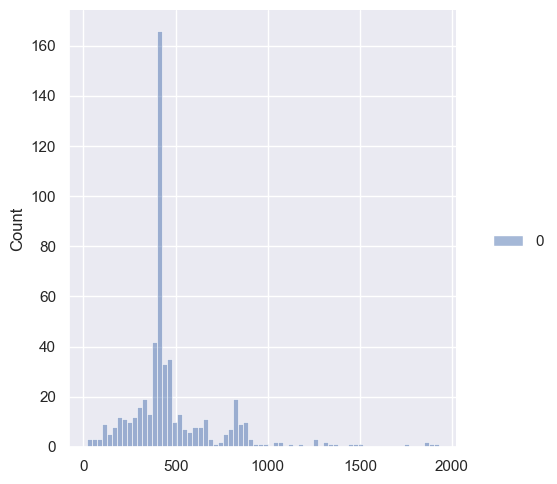

In [220]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=1000)

#create normal distribution histogram
sns.displot(X)

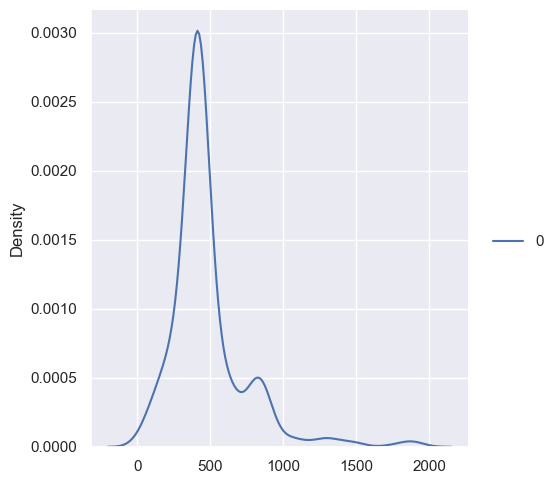

In [221]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#X = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(X, kind='kde')

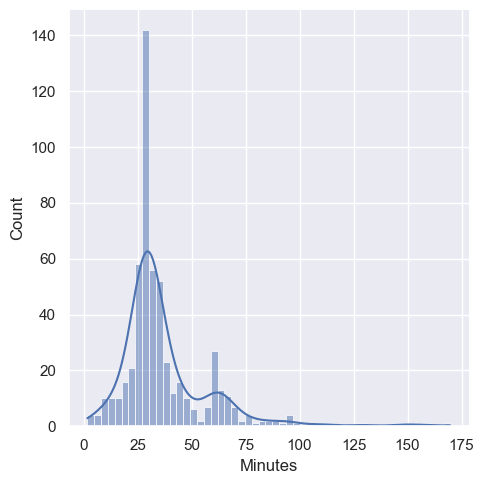

In [222]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(df4, x='Minutes', kde=True)

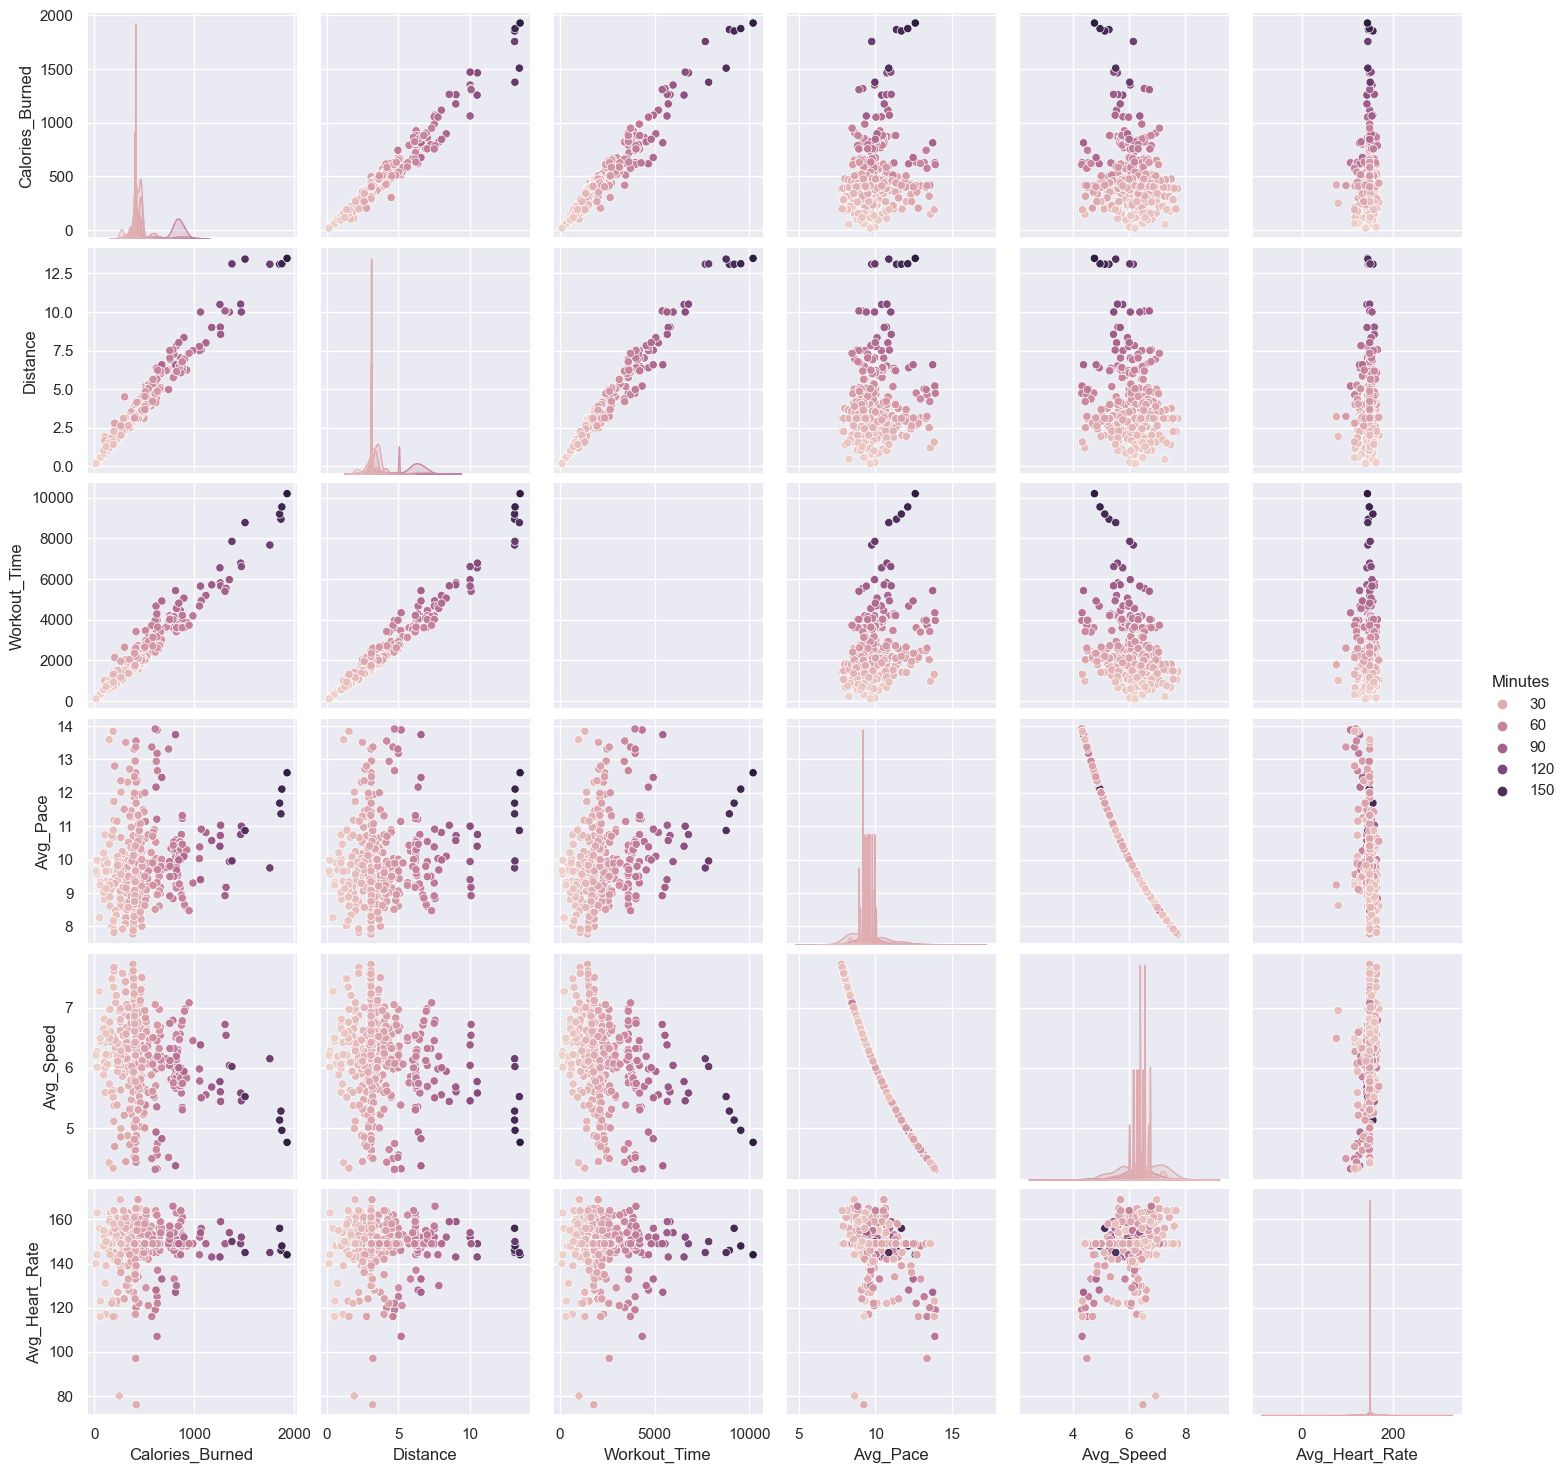

In [223]:
sns.pairplot(data = df4, vars = df.columns[3:9], hue = 'Minutes')

In [224]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 753
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calories_Burned  546 non-null    float64
 1   Distance         546 non-null    float64
 2   Workout_Time     546 non-null    float64
 3   Avg_Pace         546 non-null    float64
 4   Avg_Speed        546 non-null    float64
 5   Avg_Heart_Rate   546 non-null    float64
 6   Steps            546 non-null    float64
 7   Minutes          546 non-null    float64
dtypes: float64(8)
memory usage: 54.6 KB
